matrix transformation only for perfect file (with path 0)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os, sys
import shutil
from itertools import islice
from itertools import repeat
from addict import Dict
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from chart_studio import plotly
from adjustText import adjust_text
# from chart_studio import pyplot as ply
# import plotly.plotly as py
import plotly.offline as pyoff
import re
import mplcursors
import mpldatacursor

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# pymatgen libraries
from pymatgen.core.structure import Structure
from pymatgen.transformations.standard_transformations import SupercellTransformation
from pymatgen.analysis.structure_matcher import StructureMatcher
from pymatgen.io.cif import CifWriter
from pymatgen.io.vasp.inputs import Poscar

from get_weirdos_ver3_new_cleaned import FileOperations
# splitall, copy_rename_single_file, copy_rename_files, check_folder_existance
from get_weirdos_ver3_new_cleaned import get_structure_with_library, get_structure_with_linalg, get_structure_with_linalg_combinded_with_library, get_structure_with_linalg_orientated, diagonalizing_latticeconstantsmatrix, get_coor_dict_structure, get_positive_lessthan1_poscarcontcar, mic_eucledian_distance_cartesian, get_flag_map_weirdos_el, rewrite_cif_w_correct_Li_idx, rewrite_cif_w_correct_Li_idx_weirdos_appended, format_spacing_cif, create_cif_pymatgen, ascending_Li, get_latticeconstant_structure_dict_iterated, get_fractional_to_cartesian_matrix, get_fractional_to_cartesian_coor
from get_weirdos_ver3_new_cleaned import get_idx_coor_limapped_weirdos_dict, get_idx_coor_limapped_weirdos_dict_litype, plot_energy_vs_latticeconstant, get_coor_structure24_dict_iterated
from get_weirdos_ver3_new_cleaned import get_dx_dz_init, get_flag_map_weirdos_48htype1_48htype2_el, get_flag_map_weirdos_48htypesmerged_level1_el
from get_weirdos_ver3_new_cleaned import plot_varying_radius_vs_sumweirdosLi, get_orientation
from get_weirdos_ver3_new_cleaned import get_flag_map_weirdos_48htype2_el, get_flag_map_48htypesmerged_el, get_idx_weirdos_el, idx_correcting_mapped_el, create_combine_structure, get_distance_weirdos_label_el, plot_weirdos_directcoor, get_coor_weirdos_array, create_POSCAR_weirdos, kmeans_cluster_weirdos, create_POSCAR_weirdos_centroids_appended, plot_distweirdos, get_label_mapping, plot_movement, get_idx_cage_coor_24g
from get_weirdos_ver3_new_cleaned import create_file_loc, get_CONTCAR_normal_elements, get_complete_closest_tuple, weighing_movement, get_tuple_cage_metainfo

direc = os.getcwd() # get current working directory

In [2]:
# modif_dx_dz_cif_allvariables_litype

# change_dx_dz_litype

In [3]:
poscar_line_nr_start = 8        # index from 0
poscar_line_nr_end = 60
latticeconstantsmatrix_line_nr_start = 2
cif_line_nr_start = 26          # index from 0

amount_Li = 24
reference_Li_nr = 23    # moved Li is placed in nr 23
folder_name_init_system = "/Init_System"

file_new_system = "CONTCAR"
file_init_system = "POSCAR"

col_excel_geo = "geometry"
col_excel_path = "path"
col_excel_toten = "toten [eV]"

proceed_XDATCAR = "True"
proceed_NEB = "True"

amount_P = 4
amount_S = 20
amount_Cl = 4

lattice_constant = 10.2794980000

# litype = 0
# file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_24g"

# litype = 2
# # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type1_area2" # "Li6PS5Cl_optitype1" # "Li6PS5Cl_type2" # same as: "Li6PS5Cl_type2_2iia_115_new"
# file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_optitype2" # "Li6PS5Cl_type2"
# file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_optitype1n2_strictr_a"

# litype = 3
# # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type3" # use this
# # # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type3_opti1"
# # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type3_init"
# file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_optitype1n2_strictr_a_type3_B_noweirdnr" # "Li6PS5Cl_optitype1n2_strictr_a_type3" # "Li6PS5Cl_optitype1n2_strictr_a_type3_A"

litype = 4
# # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type4_trial2"
# # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type4_DBSCAN_0_5_a_optitype2"
# # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type4_31" # "Li6PS5Cl_optitype1n2_strictr_a_type4_weirdo1_var2"
file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_optitype1n2_strictr_a_type4_weirdo1_var2_opti_zoomedin"

# litype = 5
# # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type5"           # better
# # # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type5_trial2_a"
# # # file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type5_trial2_b"
# file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type5_trial"

# litype = 6
# file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type5_C_type6_b_type2"

file_perfect_poscar_48n24 = f"{file_perfect_poscar_48n24_wo_cif}.cif"

activate_radius = 1 # [1: r1 for 24g 48htype1 48htype2, 2: r2 for 48htype1 48htype2, 3: r3 for 48htype2]
max_mapping_radius = 0.051 # 0.043 ### 0.018 # 0.015 # 0.043
max_mapping_radius_48htype2 = 0.066 # 0.076 ### 0.075 # 0.051 # 0.076
max_mapping_radius_48htype1_48htype2 = (max_mapping_radius + max_mapping_radius_48htype2) / 2
file_perfect_poscar_24 = "Li6PS5Cl_24_mod_2p27291.cif"

file_name_toten = "toten_final.ods"

if activate_radius == 3:
    folder_name_destination_restructure = f"/restructure_{max_mapping_radius}_{max_mapping_radius_48htype2}_{max_mapping_radius_48htype1_48htype2}_{file_perfect_poscar_48n24_wo_cif}/"
elif activate_radius == 2:
    folder_name_destination_restructure = f"/restructure_{max_mapping_radius}_{max_mapping_radius_48htype2}_{file_perfect_poscar_48n24_wo_cif}/"
elif activate_radius == 1:
    folder_name_destination_restructure = f"/restructure_{max_mapping_radius}_{file_perfect_poscar_48n24_wo_cif}/"
else:
    print("activate_radius is not correct")

# # # # # folder_name_destination_lattice_coeff_input = "/lattice_coeff_input/"
folder_name_perfect_poscar = "/_reference_cif/"
file_restructure = "CONTCAR"
file_restructure_positive = "CONTCAR_positive"
element_restructure = "P"

cif_columns = ['species', 'idx_species', 'unkownvar_1', 'coord_x', 'coord_y', 'coord_z', 'unkownvar_2']
poscar_columns_type2 = ['coord_x', 'coord_y', 'coord_z', 'species']
contcar_columns_type2 = ['coord_x', 'coord_y', 'coord_z']

var1 and var2 show that arc matters

var2 and var3 show that distance by 0.02ish angstrom in 24g-48h doesn't matter

var3 and var4 show that bigger radius by 0.007 reduce the weirdos each type by around 2

var5 same as var3

var5 and var6 show that bigger radius by 0.009 reduce the weirdos each type by around 4




04_important_outputs_var6 with radius 0.045 and 0.055 show no difference

In [4]:
direc_init_system = direc+str(folder_name_init_system)
# # direc_perfect_system = direc+os.sep+str(file_perfect_poscar_24)
direc_restructure_destination = direc+str(folder_name_destination_restructure)
# # # # # direc_lattice_coeff_input = direc+str(folder_name_destination_lattice_coeff_input)
direc_perfect_poscar = direc+str(folder_name_perfect_poscar)

path_perfect_poscar_24 = os.path.join(direc_perfect_poscar, file_perfect_poscar_24)
path_perfect_poscar_48n24 = os.path.join(direc_perfect_poscar, file_perfect_poscar_48n24)
# path_perfect_poscar_P = os.path.join(direc_perfect_poscar, file_perfect_poscar_P)

In [5]:
dtype = {col_excel_geo: float, col_excel_path: float}

data_toten = pd.read_excel(file_name_toten, dtype=dtype, engine="odf")
data_toten_ori = data_toten
data_toten = data_toten.sort_values(by=["geometry","path"],ignore_index=True,ascending=False)

In [6]:
file_loc = create_file_loc(direc_init_system, data_toten, file_new_system)

/home/azka/Documents/01_Masterthesis/XDATCAR-Thesis-Positionism/get_weirdos_ver3_new_cleaned.py:5861: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/azka/Documents/01_Masterthesis/XDATCAR-Thesis-Positionism/get_weirdos_ver3_new_cleaned.py:5863: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/azka/Documents/01_Masterthesis/XDATCAR-Thesis-Positionism/get_weirdos_ver3_new_cleaned.py:5865: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

### Delete all elements in CONTCAR except Phospor

#### Copy into new directory and rename files

In [7]:
# just refreshing folder
FileOperations.check_folder_existance(direc_restructure_destination, empty_folder=True)

In [8]:
# just copy reference file
FileOperations.copy_rename_single_file(direc_restructure_destination, direc_perfect_poscar, file_perfect_poscar_24, prefix=None)
FileOperations.copy_rename_single_file(direc_restructure_destination, direc_perfect_poscar, file_perfect_poscar_48n24, prefix=None)

### Use get_translational_matrix
alternative to get_transformation() from pymatgen: find_primitive() from spglib

In [9]:
# # file_loc_mask_1, file_loc_important_cols = get_orientation(file_loc, orientation=False)

# Now Processing with other folders that are with mask = 0 (not perfect system)

#### copy the data of scaling and translation to the file_loc as initial data

In [10]:
# file_loc_important_cols = file_loc.copy()
FileOperations.copy_rename_files(file_loc, direc_restructure_destination, file_restructure, prefix=None, savedir = False)

In [11]:
### ADJUSTMENT HERE !!!
if proceed_NEB == "True":
    get_CONTCAR_normal_elements(file_loc, direc_restructure_destination, file_restructure, prefix = None)
else:
    pass

get_positive_lessthan1_poscarcontcar(file_loc, direc_restructure_destination, poscar_line_nr_start, poscar_line_nr_end, contcar_columns_type2, file_type = "CONTCAR", var_name_in = None, var_name_out = "positive", n_decimal=16)

/home/azka/Documents/01_Masterthesis/XDATCAR-Thesis-Positionism/get_weirdos_ver3_new_cleaned.py:847: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/azka/Documents/01_Masterthesis/XDATCAR-Thesis-Positionism/get_weirdos_ver3_new_cleaned.py:847: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/azka/Documents/01_Masterthesis/XDATCAR-Thesis-Positionism/get_weirdos_ver3_new_cleaned.py:847: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [12]:
file_loc_mask_1, file_loc_important_cols = get_orientation(file_loc, direc_restructure_destination, file_restructure_positive, path_perfect_poscar_24, col_excel_toten, orientation="False")

In [13]:
# # # just copy file
# # FileOperations.copy_rename_single_file(direc_restructure_destination, direc_perfect_poscar, file_perfect_poscar_24, prefix=None)

In [14]:
file_loc_important_cols['subdir_new_system'][0]

'/home/azka/Documents/01_Masterthesis/XDATCAR-Thesis-Positionism/0/8/CONTCAR'

In [15]:
file_loc_important_cols.head() #####

,geometry,path,subdir_new_system,g+p,g+p+1,g+p-1,perfect_system,p_s_mask,toten [eV],subdir_positive_CONTCAR
0,0.0,8.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,8.0,0.0,7.0,NaN,0,-272.337269,/home/azka/Documents/01_Masterthesis/XDATCAR-T...
1,0.0,7.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,7.0,8.0,6.0,NaN,0,-272.309259,/home/azka/Documents/01_Masterthesis/XDATCAR-T...
2,0.0,6.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,6.0,7.0,5.0,NaN,0,-272.227022,/home/azka/Documents/01_Masterthesis/XDATCAR-T...
3,0.0,5.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,5.0,6.0,4.0,NaN,0,-271.870564,/home/azka/Documents/01_Masterthesis/XDATCAR-T...
4,0.0,4.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,4.0,5.0,3.0,NaN,0,-272.208118,/home/azka/Documents/01_Masterthesis/XDATCAR-T...


#### Convert new cif file of orientated structure into only positive value

TO DO: add subdir for lattice constant into file_loc

In [16]:
# # # # # def copy_rename_files_subpaths_latticecoeff(file_loc, source_directory, direc_lattice_coeff_input, var_filename, index):
# # # # #     file_loc['subdir_lattice_coeff_input'] = None

# # # # #     filename_to_copy = f"{int(file_loc['geometry'][index])}_{int(file_loc['path'][index])}_POSCAR_{var_filename}"
# # # # #     source_path = os.path.join(source_directory, filename_to_copy)
    
# # # # #     subdir_lattice_coeff_input = direc_lattice_coeff_input + str(int(file_loc['geometry'][index])) +  "/" + str(int(file_loc['path'][index])) + "/"
# # # # #     new_filename = "POSCAR"
# # # # #     destination_path = os.path.join(subdir_lattice_coeff_input, new_filename)

# # # # #     # check existance and emptying it
# # # # #     FileOperations.check_folder_existance(subdir_lattice_coeff_input)
# # # # #     # Copy the file to the destination directory with the new name
# # # # #     shutil.copy2(source_path, destination_path)
# # # # #     print(f"File copied and renamed: {filename_to_copy} -> {destination_path}")

In [17]:
# # # # # var_filename = "trf_w_linalg_orientated_positive_lessthan1_diagonalizedconstants"

# # # # # for index in range(file_loc_important_cols["geometry"].size):
# # # # #     copy_rename_files_subpaths_latticecoeff(file_loc_important_cols, direc_restructure_destination, direc_lattice_coeff_input, var_filename, index)

#### Mapping to the closest neighbor

In [18]:
# from pymatgen.analysis.local_env import CrystalNN

# max_mapping_radius = 0.05282658993283027
# max_mapping_radius = 0.045
# max_mapping_radius = 0.055
# max_mapping_radius = 0.04197083906

ref_structure_48n24 = Structure.from_file(path_perfect_poscar_48n24)
cif_structure = Structure(ref_structure_48n24.lattice, ref_structure_48n24.species, ref_structure_48n24.frac_coords)
cif = CifWriter(cif_structure)
cif.write_file(f"{direc_restructure_destination}{file_perfect_poscar_48n24_wo_cif}_expanded.cif")


#### Filter only moving the Li-ions from 24g to 24g+48h

In [19]:
coor_structure_init_dict = get_coor_dict_structure(ref_structure_48n24)
coor_structure_init_dict_expanded = get_coor_dict_structure(Structure.from_file(f"{direc_restructure_destination}{file_perfect_poscar_48n24_wo_cif}_expanded.cif"))


get_coor_structure24_dict_iterated(file_loc_important_cols, mapping = "False")

if activate_radius == 3:
    get_flag_map_weirdos_el(file_loc_important_cols, coor_structure_init_dict, "Li", max_mapping_radius)
    get_flag_map_weirdos_48htype1_48htype2_el(file_loc_important_cols, coor_structure_init_dict, "Li", max_mapping_radius_48htype1_48htype2)
    get_flag_map_weirdos_48htypesmerged_level1_el(file_loc_important_cols, "Li")
    get_flag_map_weirdos_48htype2_el(file_loc_important_cols, coor_structure_init_dict, "Li", max_mapping_radius_48htype2, activate_radius)
    get_flag_map_48htypesmerged_el(file_loc_important_cols, "Li", activate_radius)
elif activate_radius == 2:
    get_flag_map_weirdos_el(file_loc_important_cols, coor_structure_init_dict, "Li", max_mapping_radius)
    get_flag_map_weirdos_48htype2_el(file_loc_important_cols, coor_structure_init_dict, "Li", max_mapping_radius_48htype2, activate_radius)
    get_flag_map_48htypesmerged_el(file_loc_important_cols, "Li", activate_radius)
elif activate_radius == 1:
    get_flag_map_weirdos_el(file_loc_important_cols, coor_structure_init_dict, "Li", max_mapping_radius)

# get_flag_map_weirdos_el(file_loc_important_cols, coor_structure_init_dict, "P", max_mapping_radius)
# get_flag_map_weirdos_el(file_loc_important_cols, coor_structure_init_dict, "S", max_mapping_radius)
# get_flag_map_weirdos_el(file_loc_important_cols, coor_structure_init_dict, "Cl", max_mapping_radius)

idx: 0
idx: 1
idx: 2
idx: 3
idx: 4
idx: 5
idx: 6
idx: 7
idx: 8


In [20]:
coor_structure_init_dict['Li']

[array([0.97111, 0.25   , 0.25   ]),
 array([0.97111, 0.75   , 0.75   ]),
 array([0.02889, 0.25   , 0.75   ]),
 array([0.02889, 0.75   , 0.25   ]),
 array([0.25   , 0.25   , 0.97111]),
 array([0.25   , 0.75   , 0.02889]),
 array([0.75   , 0.25   , 0.02889]),
 array([0.75   , 0.75   , 0.97111]),
 array([0.25   , 0.97111, 0.25   ]),
 array([0.25   , 0.02889, 0.75   ]),
 array([0.75   , 0.97111, 0.75   ]),
 array([0.75   , 0.02889, 0.25   ]),
 array([0.25   , 0.75   , 0.47111]),
 array([0.25   , 0.25   , 0.52889]),
 array([0.75   , 0.75   , 0.52889]),
 array([0.75   , 0.25   , 0.47111]),
 array([0.25   , 0.47111, 0.75   ]),
 array([0.25   , 0.52889, 0.25   ]),
 array([0.75   , 0.47111, 0.25   ]),
 array([0.75   , 0.52889, 0.75   ]),
 array([0.47111, 0.25   , 0.75   ]),
 array([0.47111, 0.75   , 0.25   ]),
 array([0.52889, 0.25   , 0.25   ]),
 array([0.52889, 0.75   , 0.75   ]),
 array([0.06943, 0.29503, 0.5694 ]),
 array([0.06943, 0.70497, 0.4306 ]),
 array([0.93057, 0.29503, 0.4306 ]),
 

In [21]:
# structure1 = Structure.from_file('Li6PS5Cl_24_mod_2p27291.cif')
# structure2 = Structure.from_file('6_5_CONTCAR_positive')
# new_structure1 = StructureMatcher(ltol = 1.0, stol = 0.6, angle_tol = 5, primitive_cell = False, scale = False).get_s2_like_s1(structure2, structure1)

In [22]:
# new_structure1

In [23]:
# cif = CifWriter(new_structure1)
# cif.write_file('6_5_new.cif')

In [24]:
# from pymatgen.core.structure import Structure
# from pymatgen.analysis.structure_matcher import StructureMatcher

# # Create two structures
# structure1 = Structure.from_file("structure1.cif")
# structure2 = Structure.from_file("structure2.cif")

# # Initialize StructureMatcher with primitive cell=True to ensure a more accurate match
# matcher = StructureMatcher(primitive_cell=True)

# # Use fit_anonymous to map the structures to the closest atoms
# mapping = matcher.fit_anonymous(structure1, structure2)

# # Print the mapping
# print(mapping)



# def create_combine_structure(dataframe, destination_directory, coor_structure_init_dict, var_savefilename):
#     ## TO DO: under maintenance for disambled into el
#     if activate_radius == 2 or activate_radius == 3:
#         col_coor_reduced120_el = f"coor_reduced120_48htypesmerged_Li"
#     elif activate_radius == 1:
#         col_coor_reduced120_el = f"coor_reduced120_Li_closestduplicate"
                    
#     # col_coor_reduced120_closestduplicate_Li_closestduplicate = f"coor_reduced120_closestduplicate_Li_closestduplicate" # !!!!!
#     # col_coor_reduced120_closestduplicate_Li = f"coor_reduced120_closestduplicate_Li" # !!!!!
#     col_coor_structure_init_dict = "coor_structure_init_dict"

#     for idx in range(dataframe["geometry"].size):
#         coor_combined = []

#         # new_structure = Structure.from_file(dataframe['subdir_orientated_positive'][idx])
#         # new_structure = Structure.from_file(dataframe['subdir_orientated_positive_poscar'][idx])
#         new_structure = Structure.from_file(dataframe['subdir_positive_CONTCAR'][idx])
#         coor_origin24_init = dataframe.at[idx, col_coor_structure_init_dict]
#         # coor_reduced120_Li = dataframe.at[idx, col_coor_reduced120_closestduplicate_Li]
#         # coor_reduced120_Li = dataframe.at[idx, col_coor_reduced120_closestduplicate_Li_closestduplicate]
#         coor_reduced120_Li = dataframe.at[idx, col_coor_reduced120_el]

#         coor_structure_init_P = coor_origin24_init["P"]
#         coor_structure_init_S = coor_origin24_init["S"]
#         coor_structure_init_Cl = coor_origin24_init["Cl"]

#         coor_mapped_Li = np.array(coor_reduced120_Li)
#         coor_origin_P = np.array(coor_structure_init_P)
#         coor_origin_S = np.array(coor_structure_init_S)
#         coor_origin_Cl = np.array(coor_structure_init_Cl)
    
#         ## get the combined coordinate of the mapped Li with all other original elements
#         for m in coor_mapped_Li:
#             coor_combined.append(np.array(m))
#         for n in coor_origin_P:
#             coor_combined.append(np.array(n))
#         for o in coor_origin_S:
#             coor_combined.append(np.array(o))
#         for p in coor_origin_Cl:
#             coor_combined.append(np.array(p))
        
#         coor_combined_array = [arr.tolist() for arr in coor_combined]

#         ## getting the index
#         amount_Li_temp = len(coor_reduced120_Li)
#         amount_P_temp = len(coor_structure_init_P)
#         amount_S_temp = len(coor_structure_init_S)
#         amount_Cl_temp = len(coor_structure_init_Cl)

#         # TO DO: write manually to change the line with Li{i}, where i = #of index based on the orientated positive
#         idx_mapped_Li = np.arange(amount_Li_temp)
#         idx_origin_P = np.arange(amount_P_temp) + amount_Li
#         idx_origin_S = np.arange(amount_S_temp) + amount_Li + amount_P
#         idx_origin_Cl = np.arange(amount_Cl_temp) + amount_Li + amount_P + amount_S

#         idx_species_combined_idx0 = np.concatenate((idx_mapped_Li, idx_origin_P, idx_origin_S, idx_origin_Cl))
#         idx_species_combined_idx0_int = idx_species_combined_idx0.astype(int).tolist()

#         ## creating the structure file of combined elements
#         selected_species_combined = [new_structure.species[i] for i in idx_species_combined_idx0_int]
#         structure_combined = Structure(new_structure.lattice, selected_species_combined, coor_combined_array)
#         cif_combined = CifWriter(structure_combined)
#         source_filename = f"{int(dataframe['geometry'][idx])}_{int(dataframe['path'][idx])}_{var_savefilename}.cif"
#         source_filename_path = os.path.join(destination_directory, source_filename)
#         cif_combined.write_file(source_filename_path)


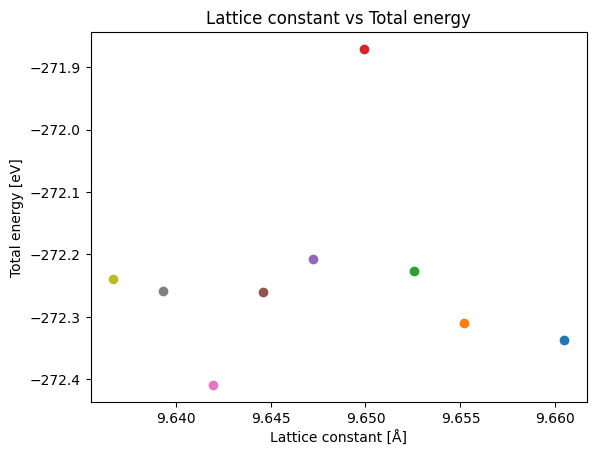

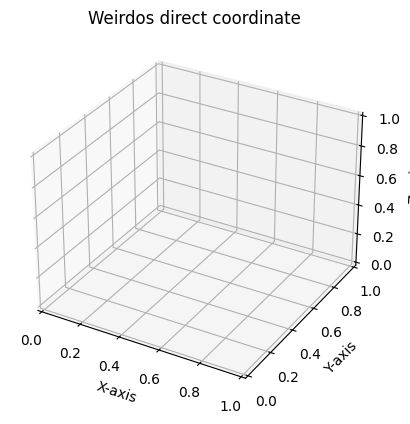

In [25]:
get_idx_weirdos_el(file_loc_important_cols, "Li", activate_radius)

# # idx_correcting_mapped_el(file_loc_important_cols, el="Li")
idx_correcting_mapped_el(file_loc_important_cols, "Li", activate_radius)
# create_combine_structure(file_loc_important_cols, direc_restructure_destination, amount_Li, amount_P, amount_S, var_savefilename = "mapLi")

get_distance_weirdos_label_el(file_loc_important_cols, coor_structure_init_dict, "Li", litype)

create_combine_structure(file_loc_important_cols, direc_restructure_destination, amount_Li, amount_P, amount_S, activate_radius, var_savefilename = "mapLi")
rewrite_cif_w_correct_Li_idx(file_loc_important_cols, direc_restructure_destination, amount_Li, amount_P, amount_S, amount_Cl, var_savefilename_init = "mapLi", var_savefilename_new = "mapLi_reindexed")
format_spacing_cif(file_loc_important_cols, direc_restructure_destination, var_savefilename_init = "mapLi_reindexed", var_savefilename_new = "mapLi_reindexed")
# # # # FileOperations.delete_files(file_loc_important_cols, direc_restructure_destination, file_name_w_format = "mapLi_reindexed.cif")

rewrite_cif_w_correct_Li_idx_weirdos_appended(file_loc_important_cols, direc_restructure_destination, amount_Li, amount_P, amount_S, amount_Cl, activate_radius,var_savefilename_init = "mapLi", var_savefilename_new = "mapLi_reindexed_weirdos_appended")
format_spacing_cif(file_loc_important_cols, direc_restructure_destination, var_savefilename_init = "mapLi_reindexed_weirdos_appended", var_savefilename_new = "mapLi_reindexed_weirdos_appended")
# # # FileOperations.delete_files(file_loc_important_cols, direc_restructure_destination, file_name_w_format = "mapLi_reindexed_weirdos_appended.cif")

create_cif_pymatgen(file_loc_important_cols, direc_restructure_destination, file_restructure = "CONTCAR_positive", var_name = "CONTCAR_positive_pymatgen")

# # # ascending_Li(file_loc_important_cols, direc_restructure_destination, var_filename_init = "mapLi_reindexed_weirdos_appended", var_savefilename_new = "mapLi_reindexed_weirdos_appended_reordered")
# # # format_spacing_cif(file_loc_important_cols, direc_restructure_destination, var_savefilename_init = "mapLi_reindexed_weirdos_appended_reordered", var_savefilename_new = "mapLi_reindexed_weirdos_appended_reordered")

get_idx_coor_limapped_weirdos_dict_litype(file_loc_important_cols, coor_structure_init_dict, activate_radius, litype, el="Li")

get_latticeconstant_structure_dict_iterated(file_loc_important_cols, direc_restructure_destination, proceed_XDATCAR, var_filename = "CONTCAR")
plot_energy_vs_latticeconstant(file_loc_important_cols, var_filename = "CONTCAR")
plot_weirdos_directcoor(file_loc_important_cols, activate_radius)

coor_weirdos_Li = get_coor_weirdos_array(file_loc_important_cols, activate_radius)
create_POSCAR_weirdos(coor_weirdos_Li, direc_restructure_destination, lattice_constant, filename = "POSCAR_weirdos")

get_label_mapping(file_loc_important_cols, coor_structure_init_dict, "Li", activate_radius, litype)

get_dx_dz_init_litype(litype)


create_file_name_allvariables_litype

In [26]:
        # for idx120, coor120 in enumerate(coor_origin120_el_init):        
        #     counter = 0
        #     atom_mapping_w_dist_dict = {}
        #     atom_mapping_el_w_dist_closestduplicate = {}
        #     distance_prev = float("inf")
        #     closest24 = None

        #     for idx24, coor24 in enumerate(coor_origin24_el_init):
        #         distance = mic_eucledian_distance(coor120, coor24)

        #         if distance < max_mapping_radius:
        #             counter = counter + 1
        #             if distance < distance_prev:
        #                 distance_prev = distance
        #                 closest24 = coor24
            
        #         if counter > 1:
        #             dataframe.at[idx, col_flag_el] = "True"

        #             # if tuple(coor120) in atom_mapping_el_w_dist:
        #             #     atom_mapping_el_w_dist[tuple(coor120)].append(atom_mapping_w_dist_dict)
        #             # else:
        #             #     atom_mapping_el_w_dist.setdefault(tuple(coor120),[atom_mapping_w_dist_dict])
                    
            
        #     # if closest24 is not None:
        #     #     if tuple(coor120) in atom_mapping_el:
        #     #         atom_mapping_el[tuple(coor120)].append(closest24)
        #     #     else:
        #     #         atom_mapping_el[tuple(coor120)] = tuple(closest24)

        #     if closest24 is not None:
        #         atom_mapping_w_dist_dict['closest24'] = tuple(closest24)
        #         atom_mapping_w_dist_dict['dist'] = distance_prev
                
        #         if tuple(coor120) in atom_mapping_el_w_dist:
        #             new_entry = atom_mapping_el_w_dist[tuple(coor120)].copy()
        #             new_entry.append(atom_mapping_w_dist_dict)
        #             atom_mapping_el_w_dist[tuple(coor120)] = new_entry
        #         else:
        #             atom_mapping_el_w_dist[tuple(coor120)] = [atom_mapping_w_dist_dict.copy()]
 
        #         coor_weirdos_el = [arr for arr in coor_weirdos_el if not np.array_equal(arr, closest24)]


In [27]:
from get_weirdos_ver3_new_cleaned import mic_eucledian_distance, get_tuple_metainfo, get_occupancy, plot_occupancy, get_amount_type, plot_amount_type

In [28]:
# # el = "Li"

# # coor_structure_init_dict_expanded_el = coor_structure_init_dict_expanded[el]

# # if litype == 1:
# #     n = 3 
# # else:
# #     n = ((litype * 2) - 1)

# # tuple_metainfo = {}

# # coor_li24g_ref      = coor_structure_init_dict_expanded_el[0:24]
# # if litype == 1:
# #     coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]
# # elif litype == 2:
# #     coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]
# #     coor_li48htype2_ref = coor_structure_init_dict_expanded_el[72:120]
# # elif litype == 3:
# #     coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]
# #     coor_li48htype2_ref = coor_structure_init_dict_expanded_el[72:120]
# #     coor_li48htype3_ref = coor_structure_init_dict_expanded_el[120:168]
# # elif litype == 4:
# #     coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]
# #     coor_li48htype2_ref = coor_structure_init_dict_expanded_el[72:120]
# #     coor_li48htype3_ref = coor_structure_init_dict_expanded_el[120:168]
# #     coor_li48htype4_ref = coor_structure_init_dict_expanded_el[168:216]
# # elif litype == 5:
# #     coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]
# #     coor_li48htype2_ref = coor_structure_init_dict_expanded_el[72:120]
# #     coor_li48htype3_ref = coor_structure_init_dict_expanded_el[120:168]
# #     coor_li48htype4_ref = coor_structure_init_dict_expanded_el[168:216]
# #     coor_li48htype5_ref = coor_structure_init_dict_expanded_el[216:264]
# # elif litype == 6:
# #     coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]
# #     coor_li48htype2_ref = coor_structure_init_dict_expanded_el[72:120]
# #     coor_li48htype3_ref = coor_structure_init_dict_expanded_el[120:168]
# #     coor_li48htype4_ref = coor_structure_init_dict_expanded_el[168:216]
# #     coor_li48htype5_ref = coor_structure_init_dict_expanded_el[216:264]
# #     coor_li48htype6_ref = coor_structure_init_dict_expanded_el[264:312]
# # elif litype == 7:
# #     coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]
# #     coor_li48htype2_ref = coor_structure_init_dict_expanded_el[72:120]
# #     coor_li48htype3_ref = coor_structure_init_dict_expanded_el[120:168]
# #     coor_li48htype4_ref = coor_structure_init_dict_expanded_el[168:216]
# #     coor_li48htype5_ref = coor_structure_init_dict_expanded_el[216:264]
# #     coor_li48htype6_ref = coor_structure_init_dict_expanded_el[264:312]
# #     coor_li48htype7_ref = coor_structure_init_dict_expanded_el[312:360]
# # elif litype == 8:
# #     coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]
# #     coor_li48htype2_ref = coor_structure_init_dict_expanded_el[72:120]
# #     coor_li48htype3_ref = coor_structure_init_dict_expanded_el[120:168]
# #     coor_li48htype4_ref = coor_structure_init_dict_expanded_el[168:216]
# #     coor_li48htype5_ref = coor_structure_init_dict_expanded_el[216:264]
# #     coor_li48htype6_ref = coor_structure_init_dict_expanded_el[264:312]
# #     coor_li48htype7_ref = coor_structure_init_dict_expanded_el[312:360]
# #     coor_li48htype8_ref = coor_structure_init_dict_expanded_el[360:408]

# # tuple_metainfo_all = defaultdict(list)

# # for idx_i, i in enumerate(coor_li24g_ref):

# #     tuple_metainfo_24g_dict =  {'coor': i, 'dist': 0.0, 'type': '24g'}

# #     tuple_metainfo_all[idx_i].append(tuple_metainfo_24g_dict)

# #     if litype == 1:
# #         for j in coor_li48htype1_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype1'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)
    
# #     elif litype == 2:
# #         for j in coor_li48htype1_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype1'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype2_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype2'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #     elif litype == 3:
# #         for j in coor_li48htype1_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype1'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)
            
# #         for j in coor_li48htype2_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype2'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype3_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype3'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #     elif litype == 4:
# #         for j in coor_li48htype1_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype1'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)
            
# #         for j in coor_li48htype2_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype2'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype3_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype3'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype4_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype4'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #     elif litype == 5:
# #         for j in coor_li48htype1_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype1'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)
            
# #         for j in coor_li48htype2_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype2'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype3_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype3'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype4_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype4'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype5_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype5'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #     elif litype == 6:
# #         for j in coor_li48htype1_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype1'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)
            
# #         for j in coor_li48htype2_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype2'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype3_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype3'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype4_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype4'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype5_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype5'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype6_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype6'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #     elif litype == 7:
# #         for j in coor_li48htype1_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype1'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)
            
# #         for j in coor_li48htype2_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype2'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype3_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype3'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype4_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype4'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype5_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype5'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype6_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype6'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype7_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype7'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)
            
# #     elif litype == 8:
# #         for j in coor_li48htype1_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype1'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)
            
# #         for j in coor_li48htype2_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype2'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype3_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype3'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype4_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype4'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype5_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype5'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype6_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype6'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype7_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype7'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)

# #         for j in coor_li48htype8_ref:
# #             distance = mic_eucledian_distance(i, j)

# #             tuple_metainfo_all_dict = {'coor': j, 'dist': distance, 'type': '48htype8'}

# #             tuple_metainfo_all[idx_i].append(tuple_metainfo_all_dict)


# # sorted_tuple_metainfo_all = {key: sorted(value, key=lambda x: x['dist']) for key, value in tuple_metainfo_all.items()}
# # top_n_tuple_metainfo = {k: v[0:n] for k, v in sorted_tuple_metainfo_all.items()}

# # for key, values_list in top_n_tuple_metainfo.items():
# #     selected_values = [{'coor': entry['coor'], "type": entry["type"]} for entry in values_list]
# #     tuple_metainfo[key] = selected_values

In [29]:
# # all_coordinates = set()
# # duplicates = []

# # for key, values in tuple_metainfo.items():
# #     for item in values:
# #         coor = tuple(item['coor'])
# #         if coor in all_coordinates:
# #             duplicates.append(coor)
# #         else:
# #             all_coordinates.add(coor)
# # print(duplicates)

In [30]:
# rev_dict = {}
 
# for key, values in tuple_metainfo.items():
#     for value in values:
#         coor = value['coor']
#         rev_dict.setdefault(tuple(coor), set()).add(key)
     
# result = [key for key, values in rev_dict.items()
#                               if len(values) > 1]
 

/home/azka/anaconda3/envs/positionism/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



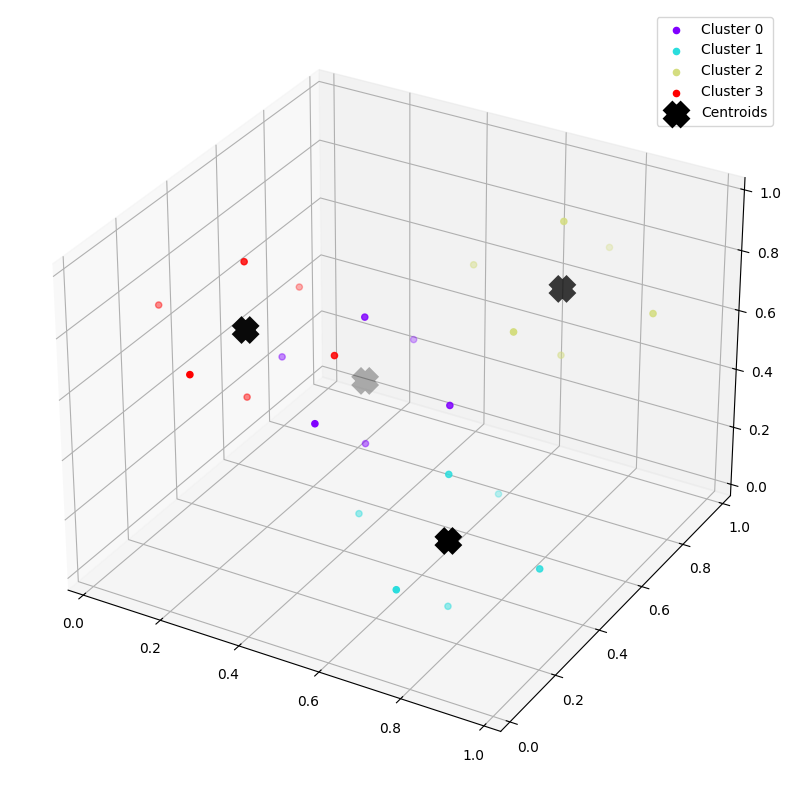

In [31]:
tuple_metainfo = get_tuple_metainfo(coor_structure_init_dict_expanded, litype, el = "Li")
file_loc_important_cols_sorted = file_loc_important_cols.sort_values("toten [eV]", ascending=True).reset_index()

idx_coor_cage_order = {0: np.array([0.97111, 0.25   , 0.25   ]), 3: np.array([0.02889, 0.75   , 0.25   ]),
                       1: np.array([0.02889, 0.25   , 0.75   ]), 2: np.array([0.97111, 0.75   , 0.75   ])}

coor_24g_array = np.array([item['coor'] for sublist in tuple_metainfo.values() for item in sublist if item['type'] == '24g'])
centroids, labels = kmeans_cluster_weirdos(coor_24g_array, amount_clusters = 4)
idx_cage_coor_24g = get_idx_cage_coor_24g(coor_24g_array, labels, idx_coor_cage_order, amount_clusters = 4)
create_POSCAR_weirdos_centroids_appended(coor_24g_array, centroids, direc_restructure_destination, lattice_constant, filename = "POSCAR_24g_centroids4")
tuple_cage_metainfo = get_tuple_cage_metainfo(tuple_metainfo, idx_cage_coor_24g)


get_occupancy(file_loc_important_cols_sorted, coor_structure_init_dict_expanded, tuple_cage_metainfo, direc_restructure_destination, var_filename = "mapLi", el = "Li")

category_labels_occupancy = {
    '2': '2',
    '1': '1',
    '0': '0',
    '48htype1': '48htype2',
    'weirdo': 'weirdo'
    # ... add more as needed
}

df = plot_occupancy(file_loc_important_cols_sorted, category_labels_occupancy)

In [32]:
idx_cage_coor_24g

{0: [array([0.97111, 0.25   , 0.25   ]),
  array([0.75   , 0.25   , 0.02889]),
  array([0.75   , 0.02889, 0.25   ]),
  array([0.75   , 0.25   , 0.47111]),
  array([0.75   , 0.47111, 0.25   ]),
  array([0.52889, 0.25   , 0.25   ])],
 3: [array([0.02889, 0.75   , 0.25   ]),
  array([0.25   , 0.75   , 0.02889]),
  array([0.25   , 0.97111, 0.25   ]),
  array([0.25   , 0.75   , 0.47111]),
  array([0.25   , 0.52889, 0.25   ]),
  array([0.47111, 0.75   , 0.25   ])],
 1: [array([0.02889, 0.25   , 0.75   ]),
  array([0.25   , 0.25   , 0.97111]),
  array([0.25   , 0.02889, 0.75   ]),
  array([0.25   , 0.25   , 0.52889]),
  array([0.25   , 0.47111, 0.75   ]),
  array([0.47111, 0.25   , 0.75   ])],
 2: [array([0.97111, 0.75   , 0.75   ]),
  array([0.75   , 0.75   , 0.97111]),
  array([0.75   , 0.97111, 0.75   ]),
  array([0.75   , 0.75   , 0.52889]),
  array([0.75   , 0.52889, 0.75   ]),
  array([0.52889, 0.75   , 0.75   ])]}

In [33]:
idx_cage_coor_24g[3][0]

array([0.02889, 0.75   , 0.25   ])

In [34]:
# # # # # coor_24g_array = np.array([item['coor'] for sublist in tuple_metainfo.values() for item in sublist if item['type'] == '24g'])

In [35]:
# # amount_clusters = 4
# # coor_weirdos = coor_24g_array

# # # source: https://stackoverflow.com/questions/64987810/3d-plotting-of-a-dataset-that-uses-k-means
# # kmeans = KMeans(n_clusters=amount_clusters)                # Number of clusters
# # kmeans = kmeans.fit(coor_weirdos)                          # Fitting the input data
# # labels = kmeans.predict(coor_weirdos)                      # Getting the cluster labels
# # centroids = kmeans.cluster_centers_             # Centroid values
# # # print("Centroids are:", centroids)              # From sci-kit learn

# # fig = plt.figure(figsize=(10,10))
# # # ax = fig.gca(projection='3d')
# # ax = fig.add_subplot(111, projection='3d')

# # # x = np.array(labels==0)
# # # y = np.array(labels==1)
# # # z = np.array(labels==2)


# # # ax.scatter(coor_weirdos[x][:, 0], coor_weirdos[x][:, 1], coor_weirdos[x][:, 2], color='red')
# # # ax.scatter(coor_weirdos[y][:, 0], coor_weirdos[y][:, 1], coor_weirdos[y][:, 2], color='blue')
# # # ax.scatter(coor_weirdos[z][:, 0], coor_weirdos[z][:, 1], coor_weirdos[z][:, 2], color='green')
# # # ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
# # #             marker='x', s=169, linewidths=10,
# # #             color='black', zorder=50)
# # # # ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c="black",s=150,label="Centers",alpha=1) # for dot marker

# # # Define a colormap for different clusters
# # colors = plt.cm.rainbow(np.linspace(0, 1, amount_clusters))

# # for cluster_label in range(amount_clusters):
# #     cluster_mask = np.array(labels == cluster_label)
# #     # print(cluster_mask)
# #     ax.scatter(
# #         coor_weirdos[cluster_mask][:, 0],
# #         coor_weirdos[cluster_mask][:, 1],
# #         coor_weirdos[cluster_mask][:, 2],
# #         color=colors[cluster_label],
# #         label=f'Cluster {cluster_label}'
# #     )

# # ax.scatter(
# #     centroids[:, 0],
# #     centroids[:, 1],
# #     centroids[:, 2],
# #     marker='x',
# #     s=169,
# #     linewidths=10,
# #     color='black',
# #     zorder=50,
# #     label='Centroids'
# # )

# # ax.legend()

# # # array([1, 3, 0, 2, 0, 2, 1, 3, 2, 0, 3, 1, 2, 0, 3, 1, 0, 2, 1, 3, 0, 2,
# # #        1, 3], dtype=int32)

In [36]:
# coor_weirdos[cluster_mask]

In [37]:
# labels

In [38]:
# n_24g_in_cage = 6 + 3

# coor_24g_distance_all = defaultdict(list)
# coor_24g_list = []

# for key_a, val_a in tuple_metainfo.items():
#     idx_tuple_a = key_a
#     for entry_a in val_a:
#         type_a = entry_a['type']
        
#         if type_a == "24g":
#             coor_a = entry_a['coor']

            # coor_24g_list.append(coor_a)

            # distance_prev = float("inf")
            # closest_idx_tuple = None

            # for key_b, val_b in tuple_metainfo.items():
            #     idx_tuple_b = key_b
            #     for entry_b in val_b:
            #         type_b = entry_b['type']

            #         if type_b == "24g":
            #             coor_b = entry_b['coor']

            #             distance = mic_eucledian_distance(coor_a, coor_b)

            #             coor_24g_distance_all_val = {'idx_tuple_b': idx_tuple_b, 'dist': distance}

            #             coor_24g_distance_all[idx_tuple_a].append(coor_24g_distance_all_val)

# coor_24g_array = np.array(coor_24g_list)

# sorted_coor_24g_distance_all = {key: sorted(value, key=lambda x: x['dist']) for key, value in coor_24g_distance_all.items()}
# top_n_coor_24g_distance = {k: v[0:n_24g_in_cage] for k, v in sorted_coor_24g_distance_all.items()}
        


In [39]:
# # # # # centroids, labels = kmeans_cluster_weirdos(coor_24g_array, amount_clusters = 4)

In [40]:
# # # # # create_POSCAR_weirdos_centroids_appended(coor_24g_array, centroids, direc_restructure_destination, lattice_constant, filename = "POSCAR_24g_centroids4")

In [41]:
# # # # tuple_cage_metainfo = defaultdict(list)


# # # # idx_cage_coor_24g = defaultdict(list)

# # # # counter = 1

# # # # for idx_cluster in range(amount_clusters):
# # # #     idx_cage_coor_24g[idx_cluster] = []

# # # #     cluster_mask = np.array(labels == idx_cluster)

# # # #     # print(f"idx_cluster:{idx_cluster}\n{coor_24g_array[np.array(labels == idx_cluster)]}")

# # # #     coors_cluster = coor_24g_array[cluster_mask]
# # # #     # print(coor_cluster)

# # # #     for coor_cluster in coors_cluster: 

# # # #         # coor_cluster_rounded = tuple(round(coordinate, 5) for coordinate in coor_cluster)
# # # #         # # print(coor_cluster_rounded)
# # # #         # print(coor_cluster)

# # # #         idx_cage_coor_24g[idx_cluster].append(coor_cluster)


In [42]:
# # # # # idx_cage_coor_24g = get_idx_cage_coor_24g(coor_24g_array, labels, amount_clusters = 4)

In [43]:
idx_cage_coor_24g

{0: [array([0.97111, 0.25   , 0.25   ]),
  array([0.75   , 0.25   , 0.02889]),
  array([0.75   , 0.02889, 0.25   ]),
  array([0.75   , 0.25   , 0.47111]),
  array([0.75   , 0.47111, 0.25   ]),
  array([0.52889, 0.25   , 0.25   ])],
 3: [array([0.02889, 0.75   , 0.25   ]),
  array([0.25   , 0.75   , 0.02889]),
  array([0.25   , 0.97111, 0.25   ]),
  array([0.25   , 0.75   , 0.47111]),
  array([0.25   , 0.52889, 0.25   ]),
  array([0.47111, 0.75   , 0.25   ])],
 1: [array([0.02889, 0.25   , 0.75   ]),
  array([0.25   , 0.25   , 0.97111]),
  array([0.25   , 0.02889, 0.75   ]),
  array([0.25   , 0.25   , 0.52889]),
  array([0.25   , 0.47111, 0.75   ]),
  array([0.47111, 0.25   , 0.75   ])],
 2: [array([0.97111, 0.75   , 0.75   ]),
  array([0.75   , 0.75   , 0.97111]),
  array([0.75   , 0.97111, 0.75   ]),
  array([0.75   , 0.75   , 0.52889]),
  array([0.75   , 0.52889, 0.75   ]),
  array([0.52889, 0.75   , 0.75   ])]}

In [44]:
tuple_metainfo

{0: [{'coor': array([0.97111, 0.25   , 0.25   ]),
   'type': '24g',
   'idx_cage': 0},
  {'coor': array([0.99125, 0.28917, 0.28917]),
   'type': '48htype4',
   'idx_cage': 0},
  {'coor': array([0.99125, 0.21083, 0.21083]),
   'type': '48htype4',
   'idx_cage': 0},
  {'coor': array([0.972  , 0.30709, 0.30709]),
   'type': '48htype2',
   'idx_cage': 0},
  {'coor': array([0.972  , 0.19291, 0.19291]),
   'type': '48htype2',
   'idx_cage': 0},
  {'coor': array([0.97147, 0.33118, 0.33118]),
   'type': '48htype3',
   'idx_cage': 0},
  {'coor': array([0.97147, 0.16882, 0.16882]),
   'type': '48htype3',
   'idx_cage': 0}],
 1: [{'coor': array([0.97111, 0.75   , 0.75   ]),
   'type': '24g',
   'idx_cage': 2},
  {'coor': array([0.99125, 0.78917, 0.78917]),
   'type': '48htype4',
   'idx_cage': 2},
  {'coor': array([0.99125, 0.71083, 0.71083]),
   'type': '48htype4',
   'idx_cage': 2},
  {'coor': array([0.972  , 0.69291, 0.69291]),
   'type': '48htype2',
   'idx_cage': 2},
  {'coor': array([0.972 

In [45]:
# WRONG
# for key, val in tuple_metainfo.items():
#     idx_tuple = key

#     tuple_cage_metainfo[idx_tuple] = []

#     for entry in val:
#         coor = entry['coor']
#         # coor_rounded = tuple(round(coordinate, 5) for coordinate in coor)
#         type = entry['type']

#         for idx_cage, coor_24g in idx_cage_coor_24g.items():
#             if (coor_24g == coor).all:
#                 # counter = counter+1

#                 # print(counter)
#                 # print(f"coor: {coor}, type: {type}, idx_cage: {idx_cage}")
#                 tuple_cage_metainfo_val = {'coor': coor, 'type': type, 'idx_cage': idx_cage}
#                 tuple_cage_metainfo[idx_tuple].append(tuple_cage_metainfo_val)

In [46]:
# idx_cage_coor_24g

In [47]:
# tuple_cage_metainfo = tuple_metainfo.copy()

In [48]:
centroids

array([[0.25, 0.75, 0.25],
       [0.75, 0.25, 0.25],
       [0.75, 0.75, 0.75],
       [0.25, 0.25, 0.75]])

In [49]:
# dataframe = file_loc_important_cols
# coor_structure_init_dict_expanded = coor_structure_init_dict_expanded
# tuple_metainfo = tuple_metainfo
# destination_directory = direc_restructure_destination
# var_filename = "mapLi"
# el = "Li"


# col_occupancy = "occupancy"

# dataframe[col_occupancy] = [{} for _ in range(len(dataframe.index))]

# coor_structure_init_dict_expanded_el = coor_structure_init_dict_expanded[el]
# coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]


# # for idx in range(dataframe["geometry"].size):
# for idx in [4]:
#     idx_coor24li_type_tuple_belongin = defaultdict(list)
#     idx_coor_limapped_weirdos_dict = dataframe['idx_coor_limapped_weirdos_dict'][idx]

#     for idx_li, val_coor_type in idx_coor_limapped_weirdos_dict.items():
#         idx_coor24li_type_tuple_belongin[idx_li] = []
#         coor_fromdict_array = np.array(val_coor_type['coor'])
#         label_fromdict = val_coor_type['label']

#         for idx_triad, values_list in tuple_metainfo.items():
#             for entry in values_list:
#                 coor_tuple = np.array(entry['coor'])

#             #         if (coor_fromdict_array == coor_tuple).all():
#             #             print('True')
#             #             coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label': label_fromdict, 'idx_tuple': idx_triad}
#             #             break
#             #     else:
#             #         continue
#             #     break
#             # else:
#             #     print('False')
#             #     coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label': label_fromdict}
        
#                 if (coor_fromdict_array == coor_tuple).all():
#                     print('True')
#                     coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label': label_fromdict, 'idx_tuple': idx_triad}
#                     # break
#                     # else:
#                     #     continue
#                     # break
#                 # else:
#                 #     print('False')
#                 #     coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label': label_fromdict}
                

#         idx_coor24li_type_tuple_belongin[idx_li].append(coor24li_type_tuple_belongin_dict)


#         # # # for idx_triad, values_list in tuple_metainfo.items():
#         # # #     # idx_coor24li_type_tuple_belongin[idx_triad] = []
        
#         # # #     # for entry in values_list:
#         # # #     coor_tuple = np.array((entry['coor'] for entry in values_list))

#         # # #     # for val_coor_type_entry in val_coor_type:

#         # # #     # # # print(f"type: {type(val_coor_type['coor'])}, {val_coor_type['coor']}")
#         # # #     print(f"type: {type(coor_fromdict_array)}, {coor_fromdict_array}")
#         # # #     print(f"type: {type(coor_tuple)}, {coor_tuple}")
    
#         # # #     # if (coor_fromdict_array == entry['coor']).all():
#         # # #     if (coor_fromdict_array == coor_tuple).all():
#         # # #         # print('True')
#         # # #         # if (tuple(i) == tuple(coor_tuple)).all():
#         # # #         coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label':label_fromdict, 'idx_tuple':idx_triad}

#         # # #     else:
#         # # #         # print('False')
#         # # #         coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label':label_fromdict}
#         # # #         # idx_coor24li_type_tuple_belongin[idx_li].append(coor24li_type_tuple_belongin_nontype_dict)
        
#         # # # idx_coor24li_type_tuple_belongin[idx_li].append(coor24li_type_tuple_belongin_dict)


#     # # # for idx_triad, values_list in tuple_metainfo.items():
#     # # #     # idx_coor24li_type_tuple_belongin[idx_triad] = []
        
#     # # #     for entry in values_list:
#     # # #         for idx_li, val_coor_type in idx_coor_limapped_weirdos_dict.items():
#     # # #             idx_coor24li_type_tuple_belongin[idx_li] = []

#     # # #             # for val_coor_type_entry in val_coor_type:
#     # # #             coor_fromdict_array = np.array(val_coor_type['coor'])

#     # # #             # # print(f"type: {type(val_coor_type['coor'])}, {val_coor_type['coor']}")
#     # # #             print(f"type: {type(coor_fromdict_array)}, {coor_fromdict_array}")
#     # # #             print(f"type: {type(entry['coor'])}, {entry['coor']}")
        
#     # # #             # if (coor_fromdict_array == entry['coor']).all():
#     # # #             if (coor_fromdict_array == entry['coor']).all():
#     # # #                 print('True')
#     # # #                 # if (tuple(i) == tuple(entry['coor'])).all():
#     # # #                 coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label':val_coor_type['label'], 'idx_tuple':idx_triad}
#     # # #                 idx_coor24li_type_tuple_belongin[idx_li].append(coor24li_type_tuple_belongin_dict)

#     # # #             else:
#     # # #                 print('False')
#     # # #                 coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label':val_coor_type['label']}
#     # # #                 idx_coor24li_type_tuple_belongin[idx_li].append(coor24li_type_tuple_belongin_dict)


#     # file_24Li = f"{int(dataframe['geometry'][idx])}_{int(dataframe['path'][idx])}_{var_filename}.cif"
#     # file_path_24Li = os.path.join(destination_directory, file_24Li)

#     # coor_structure_24Li_dict_el = get_coor_dict_structure(Structure.from_file(file_path_24Li))[el]
    
#     # Convert lists of arrays to sets for efficient comparison
#     # set_coor_structure = set(map(tuple, coor_structure_24Li_dict_el))
#     # set_coor_li48htype1_ref = set(map(tuple, coor_li48htype1_ref))

#     # # Find the difference between the two sets
#     # result_set = set_coor_structure.difference(set_coor_li48htype1_ref)

#     # # Convert the result back to a list of arrays
#     # result_list = list(map(np.array, result_set))
#     # result_list = list(map(np.array, set_coor_structure))
#     # for idx_triad, val in tuple_metainfo.items():

#     # # # for idx_triad, values_list in tuple_metainfo.items():
#     # # #     coor24li_tuple_belongin[idx_triad] = []
        
#     # # #     for entry in values_list:
#     # # #         for i in result_list:
        
#     # # #             if (i == entry['coor']).all():
#     # # #                 # if (tuple(i) == tuple(entry['coor'])).all():
#     # # #                 coor24li_tuple_belongin_dict = {'coor': i, 'type':entry['type']}
#     # # #                 coor24li_tuple_belongin[idx_triad].append(coor24li_tuple_belongin_dict)


#     # # idx_coor_weirdos_Li_dict = dataframe['idx_coor_weirdos_Li'][idx]

#     # # for idx_weirdo, values_list in idx_coor_weirdos_Li_dict.items():
#     # #         coorweirdo_tuple_belongin_dict = {'coor': values_list, 'type':'weirdo'}
#     # #         coor24li_tuple_belongin['weirdo'].append(coorweirdo_tuple_belongin_dict)
    
#     # # for key, val in coor24li_tuple_belongin.items():
#     # #     for i

#     # len_occupancy = []
#     # for key, val in coor24li_tuple_belongin.items():
#     #     len_occupancy.append(len(val))


#     # amount_48htype1 = (len(coor_structure_24Li_dict_el)-len(result_list))
#     # amount_weirdo = dataframe['#weirdos_Li'][idx]
#     # occupancy_2 = len_occupancy.count(2)
#     # occupancy_1 = len_occupancy.count(1)
#     # occupancy_0 = len_occupancy.count(0) - amount_48htype1 - amount_weirdo

#     # sanity_check_occupancy = occupancy_2 * 2 + occupancy_1

#     # # if sanity_check_occupancy != 24:
#     # #     sys.exit()

#     # # print(f"idx: {idx}")

#     # # if sanity_check_occupancy != 24:
#     # #     sys.exit()

#     # occupancy = {'2': occupancy_2, '1': occupancy_1, '0': occupancy_0, '48htype1': amount_48htype1,'weirdo': amount_weirdo}

#     # dataframe.at[idx, col_occupancy] = occupancy

In [50]:
# for idx_li, val_coor_type in idx_coor_limapped_weirdos_dict.items():
#     idx_coor24li_type_tuple_belongin[idx_li] = []
#     coor_fromdict_array = np.array(val_coor_type['coor'])
#     label_fromdict = val_coor_type['label']

#     for idx_triad, values_list in tuple_metainfo.items():
#         # idx_coor24li_type_tuple_belongin[idx_triad] = []
    
#         # for entry in values_list:
#         coor_tuple = np.array((entry['coor'] for entry in values_list))

#         # for val_coor_type_entry in val_coor_type:

#         # # # print(f"type: {type(val_coor_type['coor'])}, {val_coor_type['coor']}")
#         # print(f"type: {type(coor_fromdict_array)}, {coor_fromdict_array}")
#         # print(f"type: {type(coor_tuple)}, {coor_tuple}")

#         # if (coor_fromdict_array == entry['coor']).all():
#         if (coor_fromdict_array == coor_tuple).all():
#             print('True')
#             # if (tuple(i) == tuple(coor_tuple)).all():
#             coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label':label_fromdict, 'idx_tuple':idx_triad}

#         else:
#             print('False')
#             coor24li_type_tuple_belongin_dict = {'coor': coor_fromdict_array, 'label':label_fromdict}
#             # idx_coor24li_type_tuple_belongin[idx_li].append(coor24li_type_tuple_belongin_nontype_dict)
    
#     idx_coor24li_type_tuple_belongin[idx_li].append(coor24li_type_tuple_belongin_dict)

In [51]:
# # # dataframe = file_loc_important_cols
# # # coor_structure_init_dict_expanded = coor_structure_init_dict_expanded
# # # tuple_metainfo = tuple_metainfo
# # # destination_directory = direc_restructure_destination
# # # var_filename = "mapLi"
# # # el = "Li"

# # # col_occupancy = "occupancy"

# # # dataframe[col_occupancy] = [{} for _ in range(len(dataframe.index))]

# # # coor_structure_init_dict_expanded_el = coor_structure_init_dict_expanded[el]
# # # coor_li48htype1_ref = coor_structure_init_dict_expanded_el[24:72]

# # # # for idx in range(dataframe["geometry"].size):
# # # for idx in [0]:
# # #     coor24li_tuple_belongin = defaultdict(list)
# # #     # idx_coor24li_tuple_belongin = defaultdict(list)

# # #     # # idx_coor_limapped_weirdos_dict = dataframe['idx_coor_limapped_weirdos_dict'][idx]

# # #     # # coor_structure_24Li_dict_el = []

# # #     # # for key, val in idx_coor_limapped_weirdos_dict.items():
# # #     # #     coor = val['coor']
# # #     # #     label = val['label']
# # #     # #     if label != 'weirdos':
# # #     # #         coor_structure_24Li_dict_el.append(np.array(coor))
    
# # #     file_24Li = f"{int(dataframe['geometry'][idx])}_{int(dataframe['path'][idx])}_{var_filename}.cif"
# # #     file_path_24Li = os.path.join(destination_directory, file_24Li)

# # #     coor_structure_24Li_dict_el = get_coor_dict_structure(Structure.from_file(file_path_24Li))[el]
    
# # #     # Convert lists of arrays to sets for efficient comparison
# # #     set_coor_structure = set(map(tuple, coor_structure_24Li_dict_el))
# # #     set_coor_li48htype1_ref = set(map(tuple, coor_li48htype1_ref))

# # #     # Find the difference between the two sets
# # #     result_set = set_coor_structure.difference(set_coor_li48htype1_ref)

# # #     # Convert the result back to a list of arrays
# # #     result_list = list(map(np.array, result_set))
# # #     # for idx_triad, val in tuple_metainfo.items():

# # #     # for idx_li, values_coor_label in idx_coor_limapped_weirdos_dict.items():
# # #     #     idx_coor24li_tuple_belongin[idx_li] = []
# # #     for idx_triad, values_list in tuple_metainfo.items():
# # #         coor24li_tuple_belongin[idx_triad] = []
        
# # #         for entry in values_list:
# # #             for i in result_list:
        
# # #                 if (i == entry['coor']).all():
# # #                     # if (tuple(i) == tuple(entry['coor'])).all():
# # #                     coor24li_tuple_belongin_dict = {'coor': i, 'type':entry['type']}
# # #                     coor24li_tuple_belongin[idx_triad].append(coor24li_tuple_belongin_dict)

# # #                 # if (i == entry['coor']).all():
# # #                 #     idx_coor24li_tuple_belongin_dict = {'coor': i, 'type':entry['type'], 'idx_tuple':idx_triad}
# # #                 #     idx_coor24li_tuple_belongin[idx_li].append(idx_coor24li_tuple_belongin_dict)

# # #     # for idx_li, values_coor_label in idx_coor_limapped_weirdos_dict.items():
# # #     #     idx_coor24li_tuple_belongin[idx_li] = []

# # #     #     for idx_triad, values_


In [52]:
# # # count = 1
# # # for idx in [0]:
# # #     idx_coor24li_tuple_belongin = defaultdict(list)

# # #     idx_coor_limapped_weirdos_dict = dataframe['idx_coor_limapped_weirdos_dict'][idx]

# # #     for key_a, val_a in idx_coor_limapped_weirdos_dict.items():
# # #         idx_li = key_a
# # #         coor_li_mapped_a = val_a['coor']
# # #         coor_li_mapped_a_rounded = tuple(round(coordinate, 5) for coordinate in coor_li_mapped_a)
# # #         label_li_a = val_a['label']

# # #         idx_coor24li_tuple_belongin[idx_li] = []
# # #         for key_b, val_b in coor24li_tuple_belongin.items():
# # #             idx_tuple = key_b
# # #             for entry_b in val_b:
# # #                 coor_li_mapped_b = entry_b['coor']
# # #                 coor_li_mapped_b_rounded = tuple(round(coordinate, 5) for coordinate in coor_li_mapped_b)
# # #                 label_li_b = entry_b['type']

# # #                 if coor_li_mapped_a_rounded == coor_li_mapped_b_rounded and label_li_a == label_li_b:
# # #                     idx_coor24li_tuple_belongin_val = {'coor': coor_li_mapped_a, 'type':label_li_a, 'idx_tuple':idx_tuple}
# # #                     idx_coor24li_tuple_belongin[idx_li].append(idx_coor24li_tuple_belongin_val)
# # #     #                 count=count+1
# # #     # print(count)
                    
# # #     distance_coors_all = defaultdict(list)
# # #     n = 1
# # #     idx_coor24li_tuple_belongin_complete = idx_coor24li_tuple_belongin.copy()

# # #     for key_c, val_c in idx_coor24li_tuple_belongin.items():
# # #         idx_li = key_c

# # #         if val_c == []:
# # #             coor_li_mapped_c = idx_coor_limapped_weirdos_dict[idx_li]['coor']
# # #             label_li_c = idx_coor_limapped_weirdos_dict[idx_li]['label']
            
# # #             for key_d, val_d in tuple_metainfo.items():
# # #                 for entry_d in val_d: 
# # #                     idx_tuple = key_d
# # #                     coor_tuple_d = entry_d['coor']
# # #                     label_li_d = entry_d['type']

# # #                     distance = mic_eucledian_distance(coor_li_mapped_c, coor_tuple_d)

# # #                     # distance_coors_all_val = {'coor_li_mapped': coor_li_mapped_c, 'coor_tuple': coor_tuple_d, 'dist': distance, 'label':label_li_d}

# # #                     distance_coors_all_val = {'coor_tuple': coor_tuple_d, 'dist': distance, 'label':label_li_d, 'idx_tuple':idx_tuple}

# # #                     distance_coors_all[idx_li].append(distance_coors_all_val)

# # #                     idx_coor24li_tuple_belongin_complete[idx_li] = {'coor': coor_li_mapped_c, 'type': label_li_c, 'idx_tuple': idx_tuple}

# # #     sorted_distance_coors_all = {key: sorted(value, key=lambda x: x['dist']) for key, value in distance_coors_all.items()}
# # #     top_n_distance_coors = {k: v[0:n] for k, v in sorted_distance_coors_all.items()}

        

In [53]:
# top_n_distance_coors

In [54]:
# idx_coor_limapped_weirdos_dict[0]['label']

In [55]:
# idx_coor_limapped_weirdos_dict

In [56]:
        # idx_tuple = key_d
        # coor_tuple_d = val_d['coor']
        # label_li_d = val_d['type']

In [57]:
# idx_coor24li_tuple_belongin

In [58]:
# # # dataframe = file_loc_important_cols

# # # col_coor24li_tuple_belongin = "coor24li_tuple_belongin"
# # # col_idx_coor_limapped_weirdos_dict = "idx_coor_limapped_weirdos_dict"

# # # col_idx_coor24li_tuple_belongin_complete_closest = "idx_coor24li_tuple_belongin_complete_closest"

# # # dataframe[col_idx_coor24li_tuple_belongin_complete_closest] = [{} for _ in range(len(dataframe.index))]

# # # for idx in range(dataframe["geometry"].size):
# # #     idx_coor24li_tuple_belongin = defaultdict(list)

# # #     idx_coor_limapped_weirdos_dict = dataframe[col_idx_coor_limapped_weirdos_dict][idx]
# # #     coor24li_tuple_belongin = dataframe[col_coor24li_tuple_belongin][idx]

# # #     for key_a, val_a in idx_coor_limapped_weirdos_dict.items():
# # #         idx_li = key_a
# # #         coor_li_mapped_a = val_a['coor']
# # #         coor_li_mapped_a_rounded = tuple(round(coordinate, 5) for coordinate in coor_li_mapped_a)
# # #         label_li_a = val_a['label']

# # #         idx_coor24li_tuple_belongin[idx_li] = []
# # #         for key_b, val_b in coor24li_tuple_belongin.items():
# # #             idx_tuple = key_b
# # #             for entry_b in val_b:
# # #                 coor_li_mapped_b = entry_b['coor']
# # #                 coor_li_mapped_b_rounded = tuple(round(coordinate, 5) for coordinate in coor_li_mapped_b)
# # #                 label_li_b = entry_b['type']

# # #                 if coor_li_mapped_a_rounded == coor_li_mapped_b_rounded and label_li_a == label_li_b:
# # #                     idx_coor24li_tuple_belongin_val = {'coor': coor_li_mapped_a, 'type':label_li_a, 'idx_tuple':idx_tuple}
# # #                     idx_coor24li_tuple_belongin[idx_li].append(idx_coor24li_tuple_belongin_val)
# # #     #                 count=count+1
# # #     # print(count)
                    
# # #     distance_coors_all = defaultdict(list)
# # #     n = 1
# # #     idx_coor24li_tuple_belongin_complete_closest = idx_coor24li_tuple_belongin.copy()

# # #     for key_c, val_c in idx_coor24li_tuple_belongin.items():
# # #         idx_li = key_c

# # #         if val_c == []:
# # #             coor_li_mapped_c = idx_coor_limapped_weirdos_dict[idx_li]['coor']
# # #             label_li_c = idx_coor_limapped_weirdos_dict[idx_li]['label']
            
# # #             for key_d, val_d in tuple_metainfo.items():
# # #                 for entry_d in val_d: 
# # #                     idx_tuple = key_d
# # #                     coor_tuple_d = entry_d['coor']
# # #                     label_li_d = entry_d['type']

# # #                     distance = mic_eucledian_distance(coor_li_mapped_c, coor_tuple_d)

# # #                     # distance_coors_all_val = {'coor_li_mapped': coor_li_mapped_c, 'coor_tuple': coor_tuple_d, 'dist': distance, 'label':label_li_d}

# # #                     distance_coors_all_val = {'coor_tuple': coor_tuple_d, 'dist': distance, 'label':label_li_d, 'idx_tuple':idx_tuple}

# # #                     distance_coors_all[idx_li].append(distance_coors_all_val)

# # #                     idx_coor24li_tuple_belongin_complete_closest[idx_li] = {'coor': coor_li_mapped_c, 'type': label_li_c, 'idx_tuple': idx_tuple}

# # #     sorted_distance_coors_all = {key: sorted(value, key=lambda x: x['dist']) for key, value in distance_coors_all.items()}
# # #     top_n_distance_coors = {k: v[0:n] for k, v in sorted_distance_coors_all.items()}

# # #     dataframe.at[idx, col_idx_coor24li_tuple_belongin_complete_closest] = idx_coor24li_tuple_belongin_complete_closest



In [59]:
get_occupancy(file_loc_important_cols, coor_structure_init_dict_expanded, tuple_cage_metainfo, direc_restructure_destination, var_filename = "mapLi", el = "Li")
df = plot_occupancy(file_loc_important_cols, category_labels_occupancy)

In [60]:
# # Good. use further!

# tuple_cage_metainfo = tuple_metainfo.copy()

# # for idx_tuple, value_list in tuple_cage_metainfo.items():
# #     # Iterate over values in idx_cage_coor_24g
# #     for idx_cage, coor_list in idx_cage_coor_24g.items():
# #         # Iterate over coordinate lists
# #         for coor in coor_list:
# #             # Check if coor matches any 'coor' in value_list with 'type': '24g'
# #             for item in value_list:
# #                 if item['type'] == '24g' and (item['coor'] == coor).all():
# #                     # Assign idx_cage to the matching value
# #                     item['idx_cage'] = idx_cage
# #                 elif item['type'] != '24g':
# #                     item['idx_cage'] = idx_cage

# # Iterate over tuple_metainfo
# for key, value_list in tuple_cage_metainfo.items():
#     # Initialize idx_cage for the current group
#     current_idx_cage = None
    
#     # Iterate over values in idx_cage_coor_24g
#     for idx_cage, coor_list in idx_cage_coor_24g.items():
#         # Iterate over coordinate lists
#         for coor in coor_list:
#             # Check if coor matches any 'coor' in value_list with 'type': '24g'
#             for item in value_list:
#                 if item['type'] == '24g' and (item['coor'] == coor).all():
#                     # Assign idx_cage to the matching value
#                     item['idx_cage'] = idx_cage
#                     current_idx_cage = idx_cage
    
#     # Assign the same idx_cage to other types in the current group
#     if current_idx_cage is not None:
#         for item in value_list:
#             if item['type'] != '24g':
#                 item['idx_cage'] = current_idx_cage

In [61]:
# # # # # tuple_cage_metainfo = get_tuple_cage_metainfo(tuple_metainfo, idx_cage_coor_24g)

In [62]:
tuple_cage_metainfo

{0: [{'coor': array([0.97111, 0.25   , 0.25   ]),
   'type': '24g',
   'idx_cage': 0},
  {'coor': array([0.99125, 0.28917, 0.28917]),
   'type': '48htype4',
   'idx_cage': 0},
  {'coor': array([0.99125, 0.21083, 0.21083]),
   'type': '48htype4',
   'idx_cage': 0},
  {'coor': array([0.972  , 0.30709, 0.30709]),
   'type': '48htype2',
   'idx_cage': 0},
  {'coor': array([0.972  , 0.19291, 0.19291]),
   'type': '48htype2',
   'idx_cage': 0},
  {'coor': array([0.97147, 0.33118, 0.33118]),
   'type': '48htype3',
   'idx_cage': 0},
  {'coor': array([0.97147, 0.16882, 0.16882]),
   'type': '48htype3',
   'idx_cage': 0}],
 1: [{'coor': array([0.97111, 0.75   , 0.75   ]),
   'type': '24g',
   'idx_cage': 2},
  {'coor': array([0.99125, 0.78917, 0.78917]),
   'type': '48htype4',
   'idx_cage': 2},
  {'coor': array([0.99125, 0.71083, 0.71083]),
   'type': '48htype4',
   'idx_cage': 2},
  {'coor': array([0.972  , 0.69291, 0.69291]),
   'type': '48htype2',
   'idx_cage': 2},
  {'coor': array([0.972 

In [63]:
def plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line, Li_idxs):

    diameter_24g48h = max_mapping_radius * 2

    x = range(len(df_distance))

    # # fig = plt.figure()
    # fig = plt.figure(figsize=(800/96, 600/96))  # 800x600 pixels, assuming 96 DPI
    # ax = plt.subplot(111)

    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size in inches

    lines = []

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Example color list

    for i in range(len(df_distance.columns)):

        line_color = colors[i % len(colors)]  # Cycle through colors list

        if Li_idxs == "all" or i in Li_idxs:
            # # i = i
            # # line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}")
            line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}", color=line_color, linewidth=2)  # Set line width to 2 pixels
            lines.append(line)
            # label = f"{i}" if Li_idxs == "all" else None
            # line, = ax.plot(x, df_distance[f"{i}"], label=label)
            # lines.append(line)

        # if type(Li_idxs) == list:
        #     for j in Li_idxs:
        #         if i == j:
        #             line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}")
        #             lines.append(line)

    # # ax.axhline(y=diameter_24g48h, color='b', linestyle=':', label=f'd_mapping = {diameter_24g48h:.3f}')
    if activate_diameter_line == True:
        ax.axhline(y=diameter_24g48h, color='b', linestyle=':', label=f'd_mapping = {diameter_24g48h:.3f}', linewidth=1)  # Set line width to 1 pixel

    # plt.title(f"Geometry {geo} with d={diameter_24g48h}")

    # Shrink current axis's height by 10% on the bottom
        # source: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                    box.width, box.height * 0.9])

    handles, labels = ax.get_legend_handles_labels()

    ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
            fancybox=True, shadow=True, ncol=5)

    # Enable cursor information
    mplcursors.cursor(hover=True)

    # Enable zooming with cursor
    mpldatacursor.datacursor(display='multiple', draggable=True)

    plt.show()

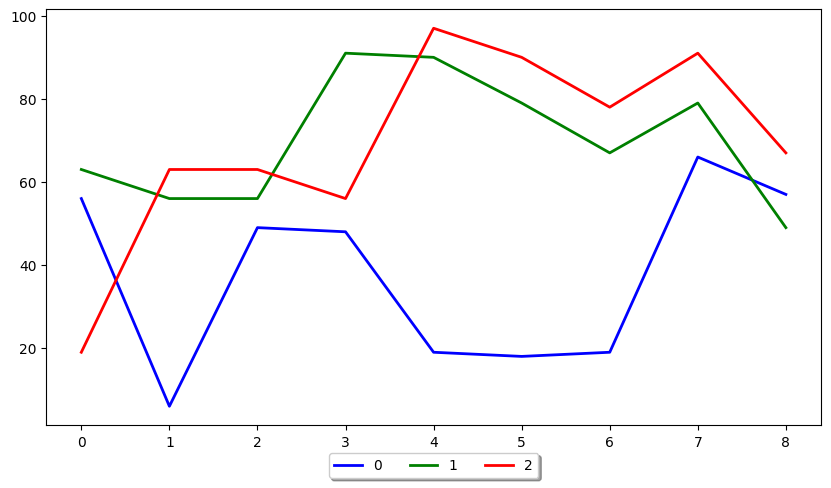

In [64]:
get_complete_closest_tuple(file_loc_important_cols, tuple_cage_metainfo)
weighing_movement(file_loc_important_cols, litype)
df_weighted = plot_movement(file_loc_important_cols, to_plot = 'weight')
# plot_distance_wrtpath0(df_weighted, max_mapping_radius, Li_idxs="all")
plot_distance_wrtpath0(df_weighted, max_mapping_radius, activate_diameter_line=False, Li_idxs=range(3))

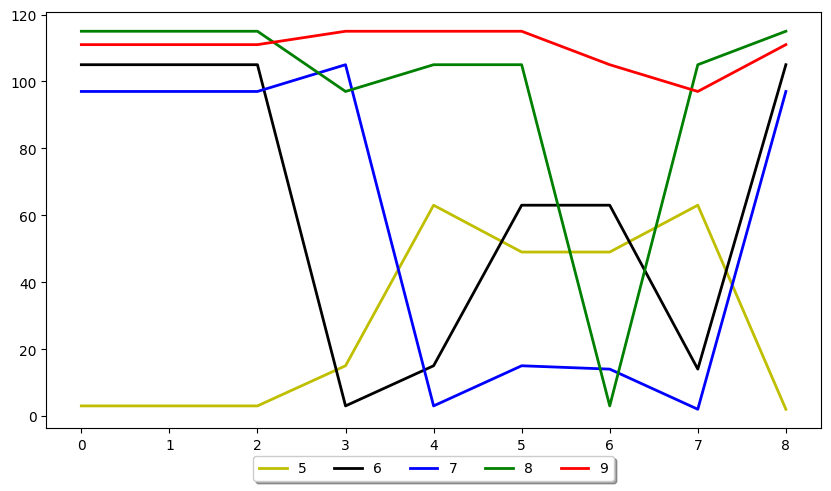

In [65]:
plot_distance_wrtpath0(df_weighted, max_mapping_radius, activate_diameter_line=False, Li_idxs=range(5,10))

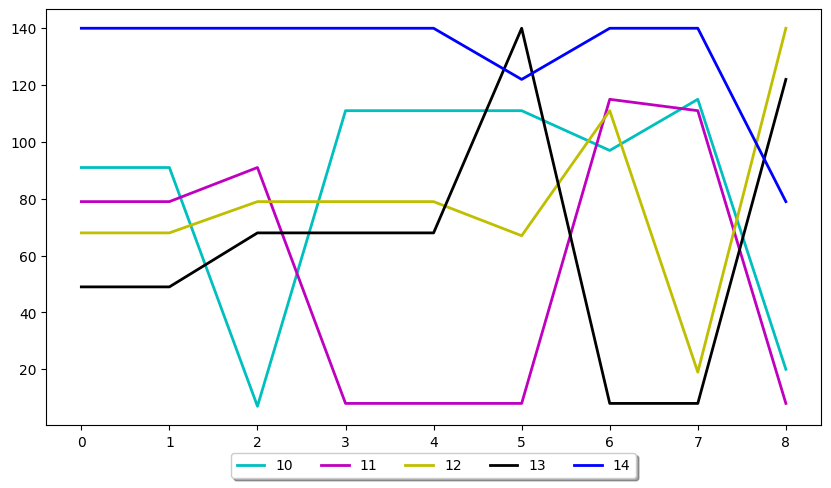

In [66]:
plot_distance_wrtpath0(df_weighted, max_mapping_radius, activate_diameter_line=False, Li_idxs=range(10,15))

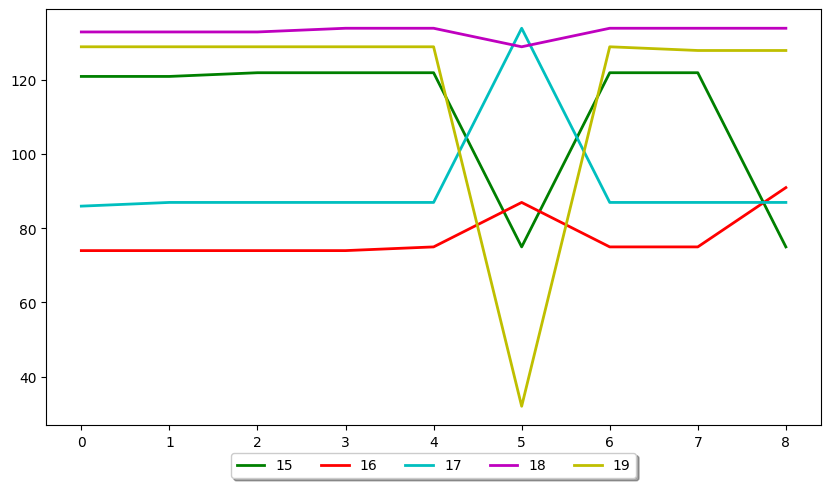

In [67]:
plot_distance_wrtpath0(df_weighted, max_mapping_radius, activate_diameter_line=False, Li_idxs=range(15,20))

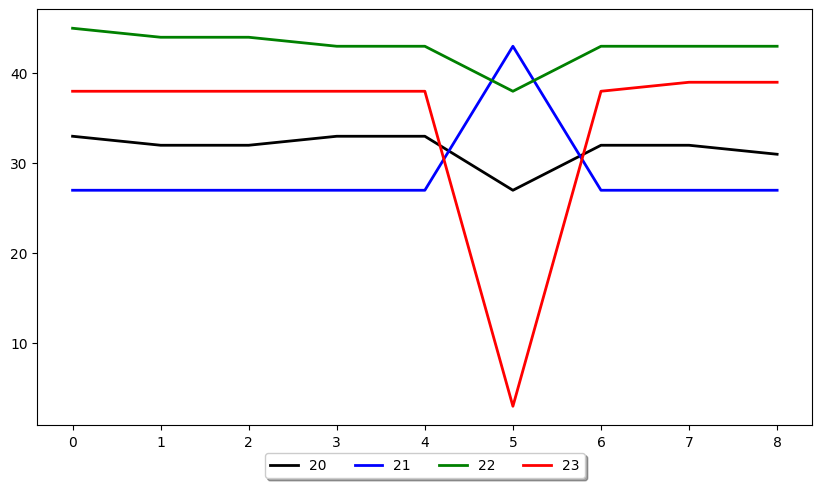

In [68]:
plot_distance_wrtpath0(df_weighted, max_mapping_radius, activate_diameter_line=False, Li_idxs=range(20,24))

In [69]:
df_weighted.iloc[:,0:12]

,0,1,2,3,4,5,6,7,8,9,10,11
0,56.0,63.0,19.0,15.0,7.0,3.0,105.0,97.0,115.0,111.0,91.0,79.0
1,6.0,56.0,63.0,19.0,15.0,3.0,105.0,97.0,115.0,111.0,91.0,79.0
2,49.0,56.0,63.0,19.0,15.0,3.0,105.0,97.0,115.0,111.0,7.0,91.0
3,48.0,91.0,56.0,63.0,20.0,15.0,3.0,105.0,97.0,115.0,111.0,8.0
4,19.0,90.0,97.0,56.0,49.0,63.0,15.0,3.0,105.0,115.0,111.0,8.0
5,18.0,79.0,90.0,97.0,56.0,49.0,63.0,15.0,105.0,115.0,111.0,8.0
6,19.0,67.0,78.0,91.0,57.0,49.0,63.0,14.0,3.0,105.0,97.0,115.0
7,66.0,79.0,91.0,57.0,49.0,63.0,14.0,2.0,105.0,97.0,115.0,111.0
8,57.0,49.0,67.0,63.0,14.0,2.0,105.0,97.0,115.0,111.0,20.0,8.0


In [70]:
df_weighted.iloc[:,12:24]

,12,13,14,15,16,17,18,19,20,21,22,23
0,68.0,49.0,140.0,121.0,74.0,86.0,133.0,129.0,33.0,27.0,45.0,38.0
1,68.0,49.0,140.0,121.0,74.0,87.0,133.0,129.0,32.0,27.0,44.0,38.0
2,79.0,68.0,140.0,122.0,74.0,87.0,133.0,129.0,32.0,27.0,44.0,38.0
3,79.0,68.0,140.0,122.0,74.0,87.0,134.0,129.0,33.0,27.0,43.0,38.0
4,79.0,68.0,140.0,122.0,75.0,87.0,134.0,129.0,33.0,27.0,43.0,38.0
5,67.0,140.0,122.0,75.0,87.0,134.0,129.0,32.0,27.0,43.0,38.0,3.0
6,111.0,8.0,140.0,122.0,75.0,87.0,134.0,129.0,32.0,27.0,43.0,38.0
7,19.0,8.0,140.0,122.0,75.0,87.0,134.0,128.0,32.0,27.0,43.0,39.0
8,140.0,122.0,79.0,75.0,91.0,87.0,134.0,128.0,31.0,27.0,43.0,39.0


In [71]:
# def plot_distance_wrtpath0_sign(dataframe, df_distance, max_mapping_radius, activate_diameter_line, Li_idxs):

#     diameter_24g48h = max_mapping_radius * 2

#     x = range(len(df_distance))

#     # # fig = plt.figure()
#     # fig = plt.figure(figsize=(800/96, 600/96))  # 800x600 pixels, assuming 96 DPI
#     # ax = plt.subplot(111)

#     fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size in inches

#     lines = []

#     col_idx_coor24li_tuple_cage_belongin_complete_closest_weight = "idx_coor24li_tuple_cage_belongin_complete_closest_weight"
    
#     for idx in range(dataframe["geometry"].size):

#         idx_coor24li_tuple_cage_belongin_complete_closest_weight = dataframe[col_idx_coor24li_tuple_cage_belongin_complete_closest_weight][idx]

#         for i in range(len(df_distance.columns)):
#             if Li_idxs == "all" or i in Li_idxs:
#                 # # i = i
#                 # # line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}")
#                 line, = ax.plot(x, df_distance[f"{i}"], '-o', label=f"{i}", linewidth=2, markersize=4)  # Set line width to 2 pixels
#                 lines.append(line)
#                 # label = f"{i}" if Li_idxs == "all" else None
#                 # line, = ax.plot(x, df_distance[f"{i}"], label=label)
#                 # lines.append(line)

#             # if type(Li_idxs) == list:
#             #     for j in Li_idxs:
#             #         if i == j:
#             #             line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}")
#             #             lines.append(line)

#         # # ax.axhline(y=diameter_24g48h, color='b', linestyle=':', label=f'd_mapping = {diameter_24g48h:.3f}')
#         if activate_diameter_line == True:
#             ax.axhline(y=diameter_24g48h, color='b', linestyle=':', label=f'd_mapping = {diameter_24g48h:.3f}', linewidth=1)  # Set line width to 1 pixel

#         # plt.title(f"Geometry {geo} with d={diameter_24g48h}")

#         # Shrink current axis's height by 10% on the bottom
#             # source: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
#         box = ax.get_position()
#         ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                         box.width, box.height * 0.9])

#         handles, labels = ax.get_legend_handles_labels()

#         ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
#                 fancybox=True, shadow=True, ncol=5)

#         # Enable cursor information
#         mplcursors.cursor(hover=True)

#         # Enable zooming with cursor
#         mpldatacursor.datacursor(display='multiple', draggable=True)

#         plt.show()

In [72]:
df_weighted.shape[1]

56

In [73]:
# # def plot_movement(dataframe, to_plot):
# dataframe = file_loc_important_cols
# to_plot = 'idx_cage'
# sign = 'type'


# col_idx_coor24li_tuple_cage_belongin_complete_closest_weight = "idx_coor24li_tuple_cage_belongin_complete_closest_weight"

# df_to_plot = pd.DataFrame()

# # for idx in range(dataframe["geometry"].size):

# #     idx_coor24li_tuple_cage_belongin_complete_closest_weight = dataframe.at[idx, col_idx_coor24li_tuple_cage_belongin_complete_closest_weight]

# #     for j in range(len(col_idx_coor24li_tuple_cage_belongin_complete_closest_weight)):
# #         df_to_plot.at[idx, f"{j}"] = defaultdict(list)

# #         # coor_Li_ref_mean = np.mean(coor_Li_ref, axis=0)
# #         # distance = mic_eucledian_distance(coor_Li_ref_mean, coor_Li[j])

# #         # dict_weighted[f"{j}"] = {f'dist: {distance}, coor_ref: {coor_Li_ref_mean}, coor_Li: {coor_Li[j]}'}
        
# #         for key_b, val_b in idx_coor24li_tuple_cage_belongin_complete_closest_weight.items():
# #             # for entry_b in val_b: 
# #             df_to_plot.at[idx, f"{key_b}"] = {'idx_cage': val_b[f'{to_plot}'], 'type':val_b[f'{sign}']}

# #         # diameter_24g48h = max_mapping_radius * 2
# #         # # if distance < diameter_24g48h and index != idx_ref:
# #         # if distance > diameter_24g48h and idx != idx_ref:
# #         #     print(f"path: {idx}, Li: {j}, distance: {distance}")

# #     # return df_to_plot


# # Loop over each row in the original DataFrame
# for idx in range(dataframe["geometry"].size):
#     # Get the data for the current row
#     idx_coor24li_tuple_cage_belongin_complete_closest_weight = dataframe.at[idx, col_idx_coor24li_tuple_cage_belongin_complete_closest_weight]

#     # Loop over each item in the current row's data
#     for j, val_b in enumerate(idx_coor24li_tuple_cage_belongin_complete_closest_weight.values()):
#         # Initialize a dictionary to hold the data for this item
#         data_dict = {}

#         # Assign the 'idx_cage' and 'type' values to the dictionary
#         data_dict['idx_cage'] = val_b[to_plot]
#         data_dict['type'] = val_b[sign]

#         # Assign the dictionary to the DataFrame cell
#         df_to_plot.loc[idx, str(j)] = data_dict

In [74]:
import plotly.express as px
import pandas as pd
import numpy as np

# set period (must be divisible by 6)
days=60

# x- axis data
timespan = pd.date_range('01/01/2022', periods=days, freq='D')

# set values for curve
value = [0,0,0,40,40,40] * (days//6)

# set True/False randomly
value2 = [[True, False][np.random.randint(0,2)] for _ in range(days)]

# convert True/False into numerical values
value2 = [val if val2 else 0 for val2, val in zip(value2, value)]

# create figure
fig = px.line(x=timespan, y=value)
fig.add_scatter(x=timespan, y=value2, mode='markers',marker={'size':7}, showlegend=False)
fig.show()

In [75]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
...                    [6.4, 3.2, 1], [5.9, 3.0, 2]],
...                   columns=['length', 'width', 'species'])

In [76]:
df

,length,width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,7.0,3.2,1
3,6.4,3.2,1
4,5.9,3.0,2


In [77]:
# df_idx_tuple.iloc[:,:3]

In [78]:
# df_idx_cage.iloc[:,:3]

In [79]:
# df_type.iloc[:,:3]

In [80]:
# df_type["1"][0]

In [81]:
# for i in range(9):
#     print(df_type["1"][i])

In [82]:
# for i, txt in enumerate(df_idx_cage.iloc[:, :24]):
#     print(f"{i}, {txt}")

In [83]:
# import matplotlib.pyplot as plt
# x = [0.15, 0.3, 0.45, 0.6, 0.75]
# y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
# n = [58, 651, 393, 203, 123]

# fig, ax = plt.subplots()
# ax.scatter(x, y)

# for i, txt in enumerate(n):
#     print(i)
#     ax.annotate(txt, (x[i], y[i]))

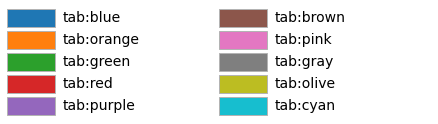

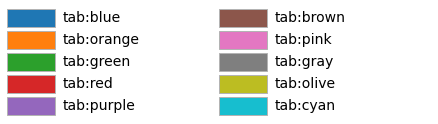

In [84]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)

In [85]:
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [86]:
category_labels = {
    '48htype1': '48htype2',
    '48htype2': '48htype1',
    '48htype3': '48htype3',
    '48htype4': '48htype4',
    '24g': '24g',
    'weirdo': 'weirdo'
    # ... add more as needed
}

In [87]:
def plot_distance_wrtpath0_sign(df_distance, df_type, df_idx_tuple, max_mapping_radius, amount_Li, category_labels, activate_diameter_line, Li_idxs):

    df_distance = df_distance.iloc[:,:amount_Li]
    df_type = df_type.iloc[:,:amount_Li]
    df_idx_tuple = df_idx_tuple.iloc[:,:amount_Li]

    diameter_24g48h = max_mapping_radius * 2

    x = range(len(df_distance))

    # # fig = plt.figure()
    # fig = plt.figure(figsize=(800/96, 600/96))  # 800x600 pixels, assuming 96 DPI
    # ax = plt.subplot(111)

    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size in inches

    lines = []
    texts = []

    # type_marker_mapping = {
    #     '48htype1': 'o',
    #     '48htype2': 's',
    #     '48htype3': '^',
    #     '48htype4': 'D',
    #     'weirdos': 'X',
    #     '24g': 'v'    
    # }

    type_marker_mapping = {
        '48htype1': ('o', 'r'),  # Example: Circle marker with red color
        '48htype2': ('s', 'g'),  # Square marker with green color
        '48htype3': ('^', 'b'),  # Triangle marker with blue color
        '48htype4': ('D', 'c'),  # Diamond marker with cyan color
        'weirdos': ('X', 'm'),   # X marker with magenta color
        '24g': ('v', 'y')        # Triangle_down marker with yellow color
    }

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Example color list
    # colors = list(mcolors.CSS4_COLORS.values())
    # colors = [color + (0.7,) for color in mcolors.CSS4_COLORS.values()]
    # colors = mcolors
    # names = list(colors)

    # Define offsets for text position
    x_offset = 0.02  # Adjust these values as needed
    y_offset = -0.05  # Adjust these values as needed

    # Track which labels have been added
    added_labels = set()

    # for i in range(24):
    for i in range(len(df_distance.columns)):
        if Li_idxs == "all" or i in Li_idxs:
            column_data = df_distance[f"{i}"]
            column_val = df_type[f"{i}"]
            column_idx_tuple = df_idx_tuple[f"{i}"]
            # type_val = df_type[0, i]
            # print(type_val)

            line_color = colors[i % len(colors)]  # Cycle through colors list
            # # # # # # # line_color = colors[i % len(colors)] if i < len(colors) else 'black'  # Use a default color if the index exceeds available colors

            # # # for j in x:
            for j, (y_val, type_val, idx_tuple_val) in enumerate(zip(column_data, column_val, column_idx_tuple)):
                # type = column_val[j]
                # idx_tuple = column_idx_tuple[j]

                # marker_style = type_marker_mapping.get(column_val, 'o')  # Get the marker style for the type
                # # marker_style = type_marker_mapping.get(type, 'o')  # Get the marker style for the type
                marker_style, marker_color = type_marker_mapping.get(type_val, ('o','k'))  # Get the marker style for the type
                # # # # # # ax.scatter(j, df_distance[f"{i}"][j], label=f"Type: {column_val}", marker=marker_style, s=100)
                # # # # # label = f"{type_val}" if type_val not in added_labels else None
                # # # # # # # ax.scatter(j, df_distance.iloc[j, i], label=label, marker=marker_style, s=100)
                # # # # # # # # # ax.scatter(j, df_distance.iloc[j, i], label=label, marker=marker_style, s=100, color = marker_color, alpha = 0.5)
                # # # # # ax.scatter(j, y_val, label=label, marker=marker_style, s=100, color = marker_color, alpha = 0.5)
                # # # # # added_labels.add(type_val)
                mapped_label = category_labels.get(type_val, type_val)  # Use the original type_val if it's not found in category_labels
                # Use mapped_label for the label. Only add it if it's not already added.
                label = mapped_label if mapped_label not in added_labels else None
                ax.scatter(j, y_val, label=label, marker=marker_style, s=100, color=marker_color, alpha=0.5)
                if label:  # If a label was added, record it as added
                    added_labels.add(mapped_label)

                # # # # ax.text(j, df_distance.iloc[j, i], str(int(idx_tuple_val)), color=line_color, fontsize=20)
                # # # # # ax.text(j, y_val, str(int(idx_tuple_val)), color=line_color, fontsize=20)
                # Apply offsets to text position
                text_x = j + x_offset * ax.get_xlim()[1]  # Adjust text x-position
                text_y = y_val + y_offset * ax.get_ylim()[1]  # Adjust text y-position
                
                # # # # # # text = ax.text(j+x_offset, y_val+y_offset, str(int(idx_tuple_val)), color=line_color, fontsize=15)
                text = ax.text(text_x, text_y, str(int(idx_tuple_val)), color=line_color, fontsize=18)
                texts.append(text)

            # # i = i
            # # line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}")
            # line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}", linewidth=2, marker=marker_style, markersize=10)  # Set line width to 2 pixels

            line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}", color=line_color, linewidth=2)  # Set line width to 2 pixels
            # ax.text(i, value, str(int(idx_value)), color=line_color, fontsize=8)

            lines.append(line)
            # label = f"{i}" if Li_idxs == "all" else None
            # line, = ax.plot(x, df_distance[f"{i}"], label=label)
            # lines.append(line)

        # if type(Li_idxs) == list:
        #     for j in Li_idxs:
        #         if i == j:
        #             line, = ax.plot(x, df_distance[f"{i}"], label=f"{i}")
        #             lines.append(line)

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
    # # ax.axhline(y=diameter_24g48h, color='b', linestyle=':', label=f'd_mapping = {diameter_24g48h:.3f}')
    if activate_diameter_line == True:
        ax.axhline(y=diameter_24g48h, color='b', linestyle=':', label=f'd_mapping = {diameter_24g48h:.3f}', linewidth=1)  # Set line width to 1 pixel

    # Set the y-axis to only show ticks at 0, 1, 2, 3
    plt.yticks([0, 1, 2, 3])

    # plt.title(f"Geometry {geo} with d={diameter_24g48h}")

    # Shrink current axis's height by 10% on the bottom
        # source: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                    box.width, box.height * 0.9])

    handles, labels = ax.get_legend_handles_labels()

    ax.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
            fancybox=True, shadow=True, ncol=5)

    # Enable cursor information
    mplcursors.cursor(hover=True)

    # Enable zooming with cursor
    mpldatacursor.datacursor(display='multiple', draggable=True)

    plt.show()

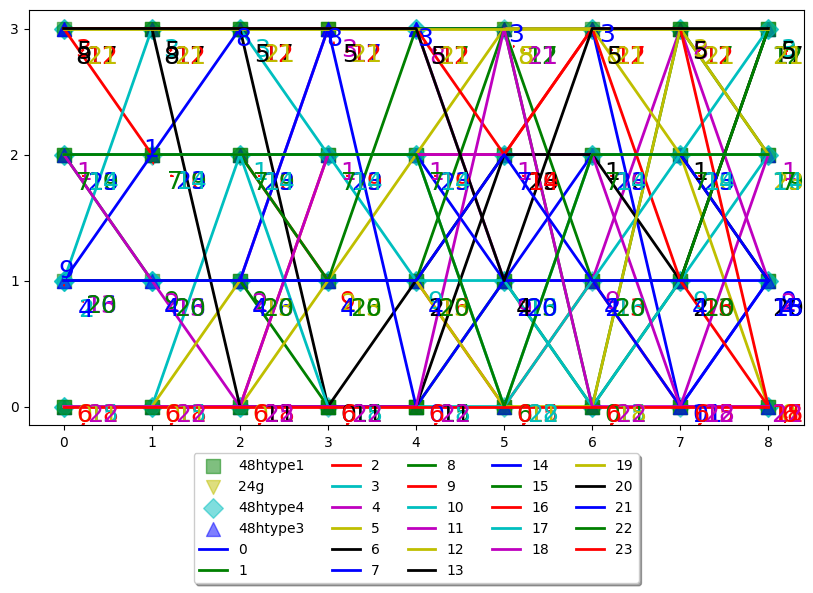

In [88]:
df_type = plot_movement(file_loc_important_cols, to_plot = 'type')
df_idx_tuple = plot_movement(file_loc_important_cols, to_plot = 'idx_tuple')
df_idx_cage = plot_movement(file_loc_important_cols, to_plot = 'idx_cage')
# # plot_distance_wrtpath0(df_idx_cage, max_mapping_radius, Li_idxs="all")
plot_distance_wrtpath0_sign(df_idx_cage, df_type, df_idx_tuple, max_mapping_radius, amount_Li, category_labels, activate_diameter_line=False, Li_idxs="all")

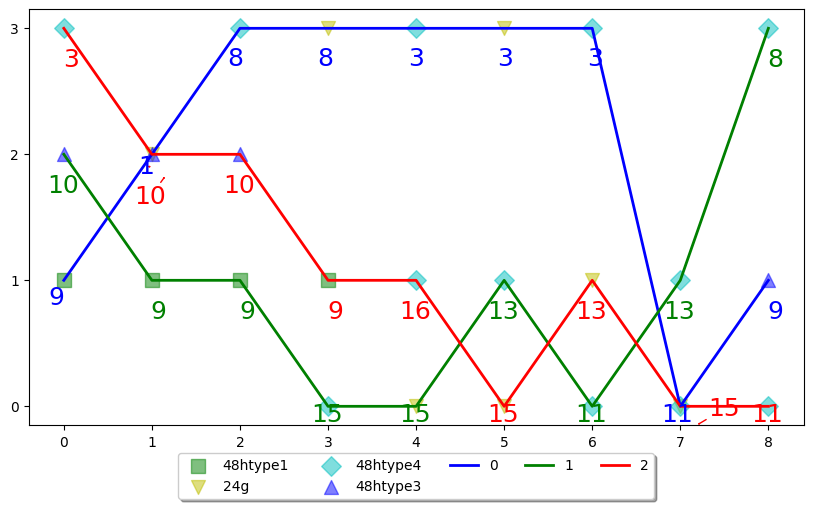

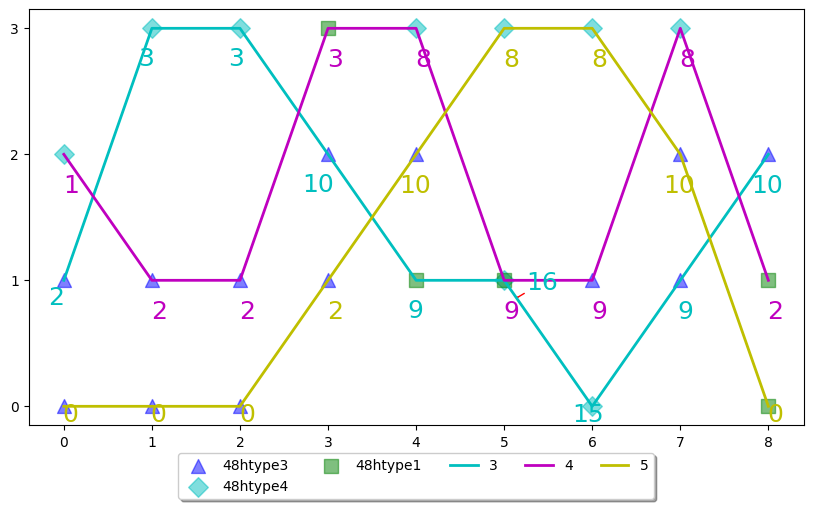

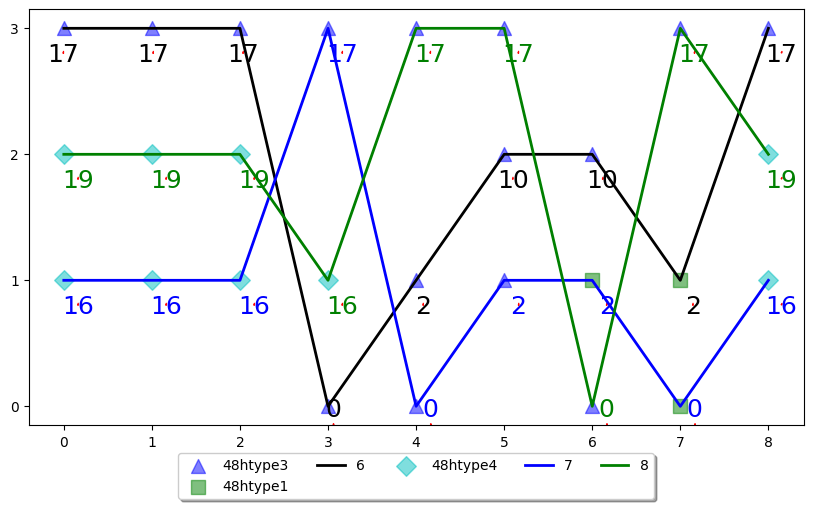

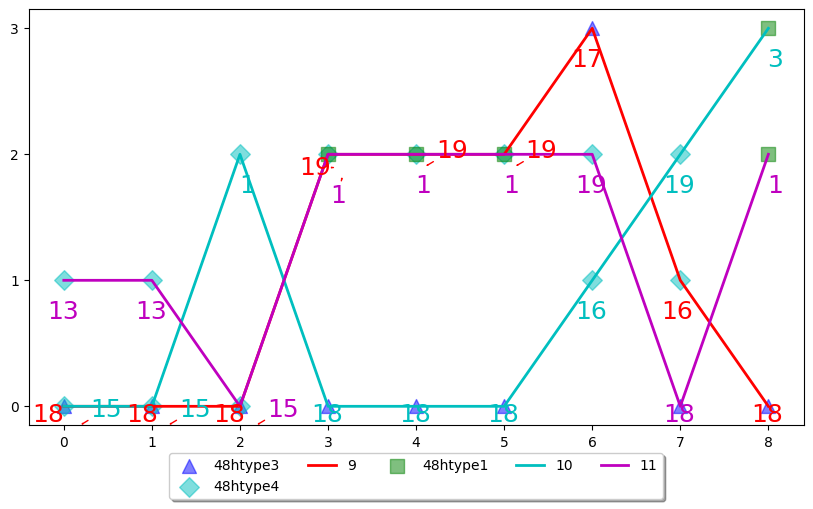

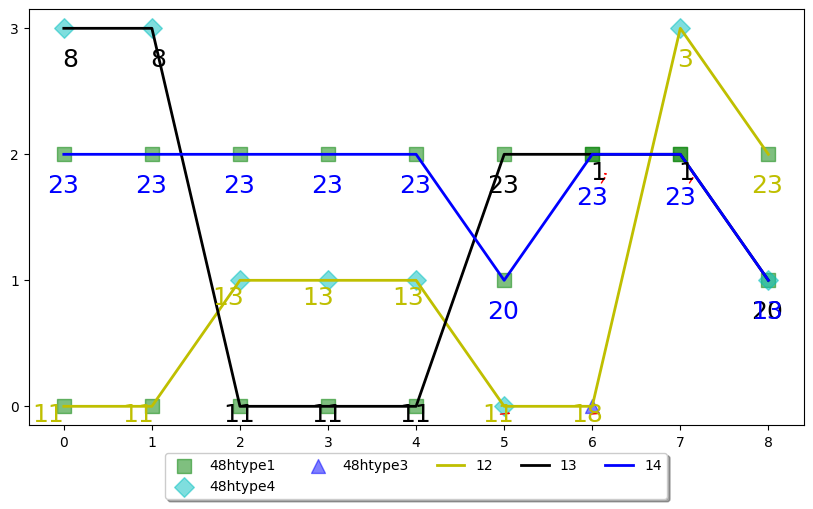

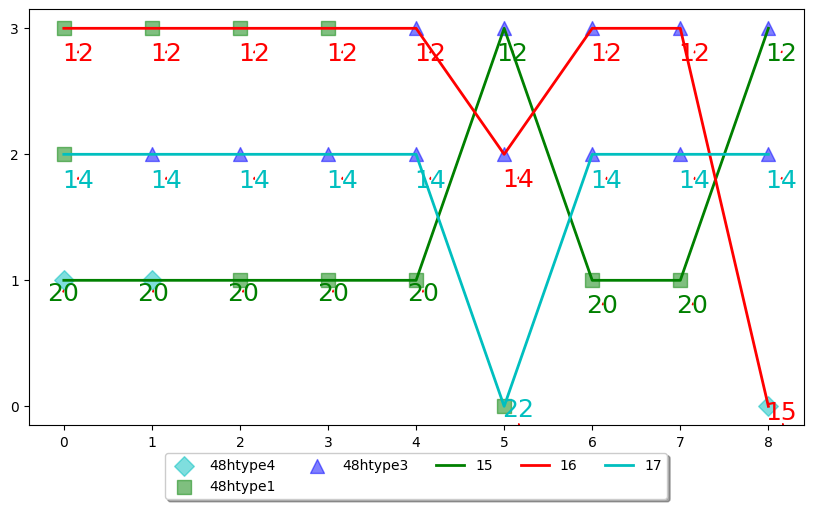

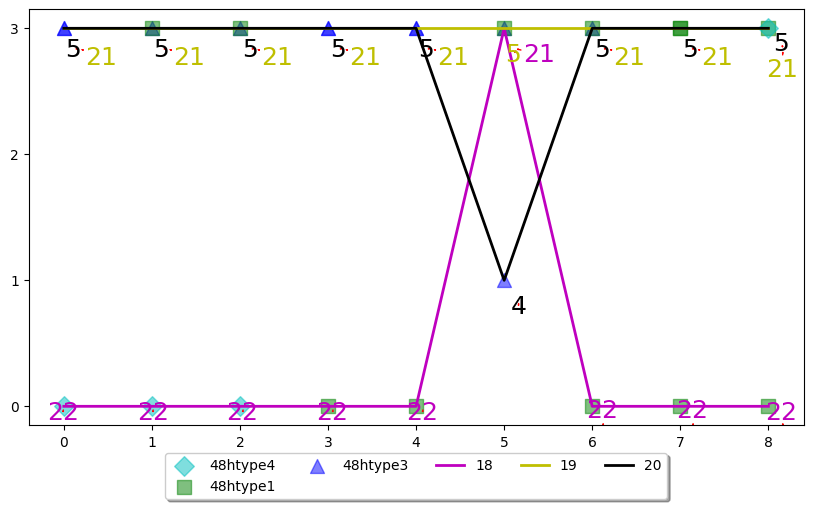

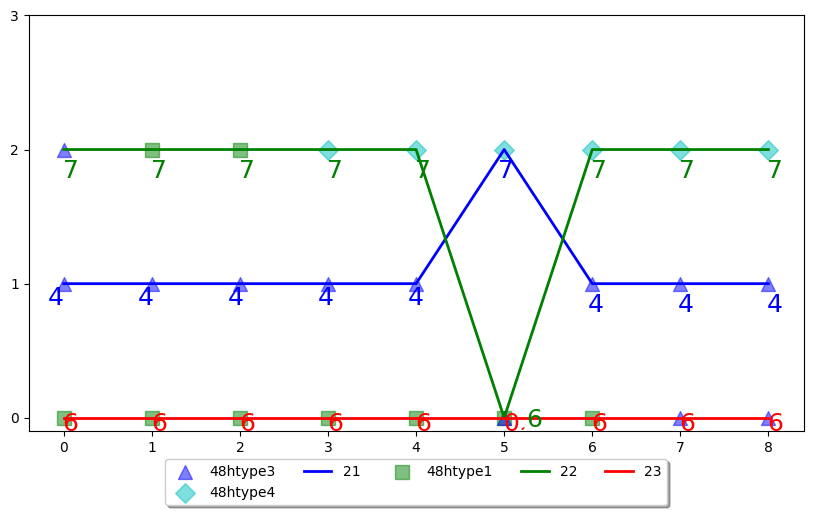

In [89]:
chunk_size = 3
total_items = amount_Li  # Adjust this if your total number of items changes

# Loop through the range in steps of chunk_size
for start_idx in range(0, total_items, chunk_size):
    end_idx = start_idx + chunk_size
    Li_idxs_range = range(start_idx, end_idx)
    
    # Call your function with the current range of Li_idxs
    plot_distance_wrtpath0_sign(df_idx_cage, df_type, df_idx_tuple, max_mapping_radius, amount_Li, category_labels, activate_diameter_line=False, Li_idxs=Li_idxs_range)

In [90]:
dict = file_loc_important_cols["idx_coor24li_tuple_cage_belongin_complete_closest"][4]

In [91]:
dict

defaultdict(list,
            {0: {'coor': (0.00875, 0.71083, 0.2891699999999999),
              'type': '48htype4',
              'idx_tuple': 3,
              'idx_cage': 3},
             1: {'coor': (0.75, 0.25, 0.47111000000000003),
              'type': '24g',
              'idx_tuple': 15,
              'idx_cage': 0},
             2: {'coor': (0.2891699999999999, 0.49125, 0.78917),
              'type': '48htype4',
              'idx_tuple': 16,
              'idx_cage': 1},
             3: {'coor': (0.30709, 0.028, 0.69291),
              'type': '48htype2',
              'idx_tuple': 9,
              'idx_cage': 1},
             4: {'coor': (0.2891699999999999, 0.99125, 0.28917000000000004),
              'type': '48htype4',
              'idx_tuple': 8,
              'idx_cage': 3},
             5: {'coor': (0.66882, 0.9714700000000001, 0.66882),
              'type': '48htype3',
              'idx_tuple': 10,
              'idx_cage': 2},
             6: {'coor': (0.02853, 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


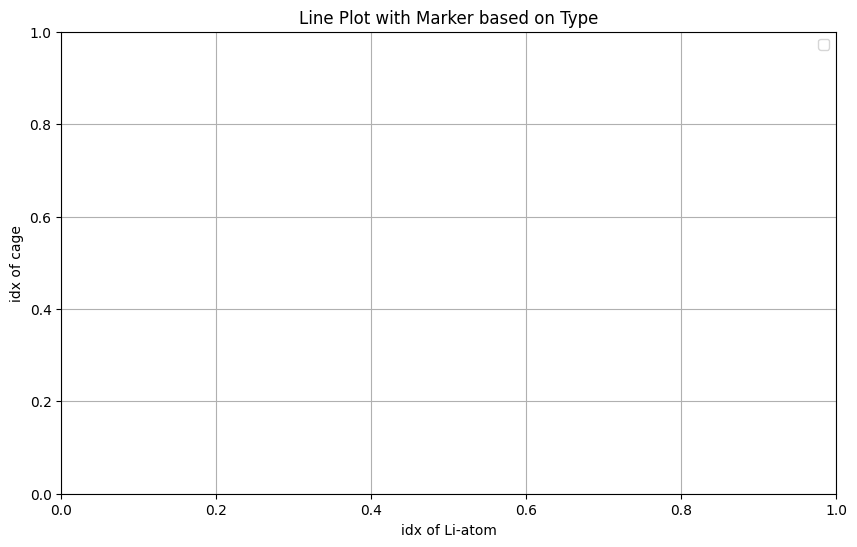

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


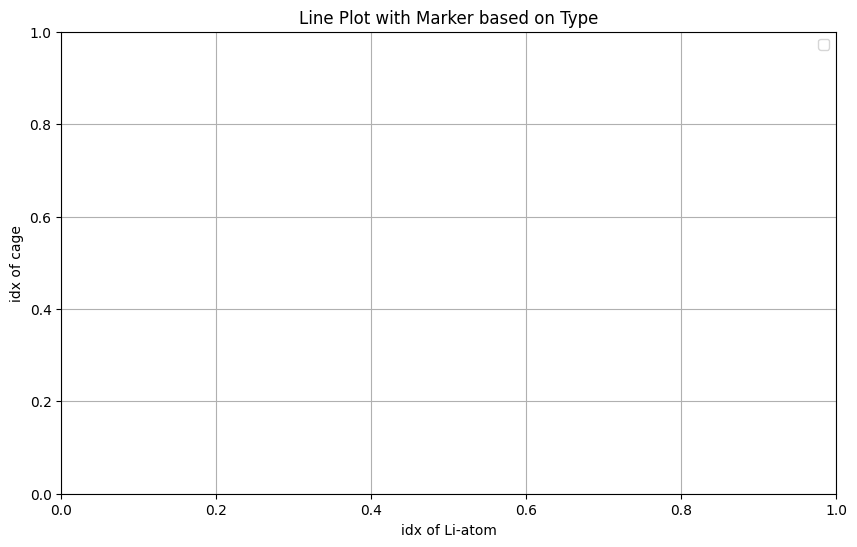

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


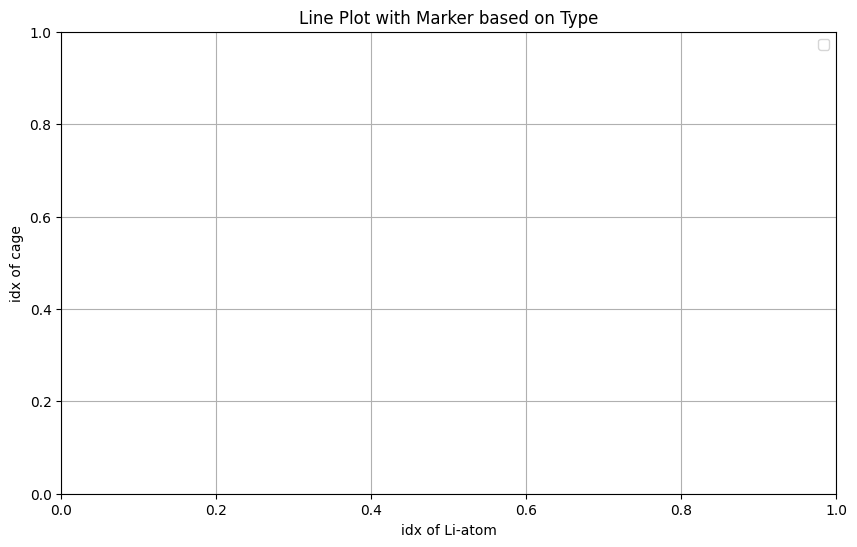

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


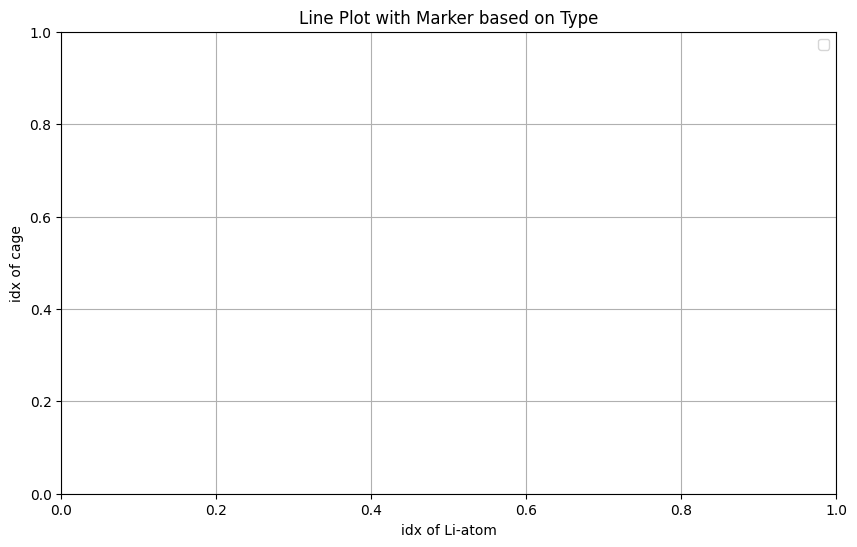

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


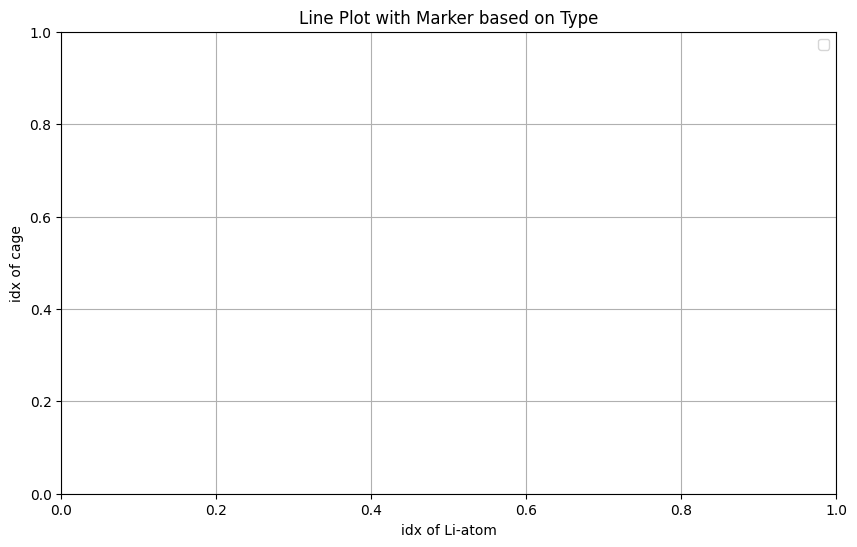

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


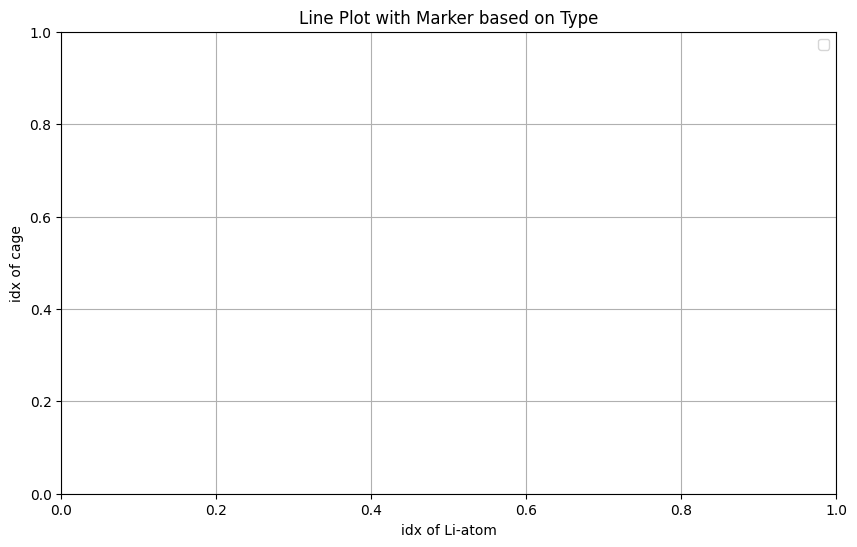

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


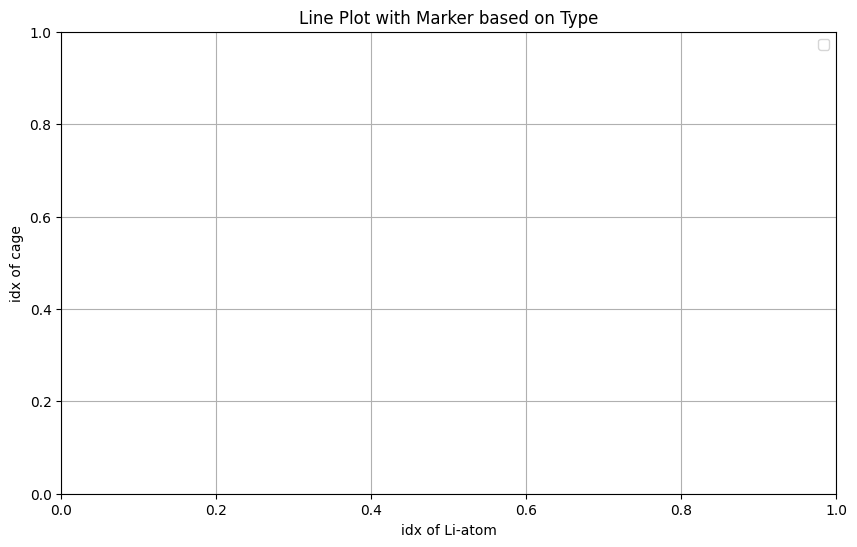

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


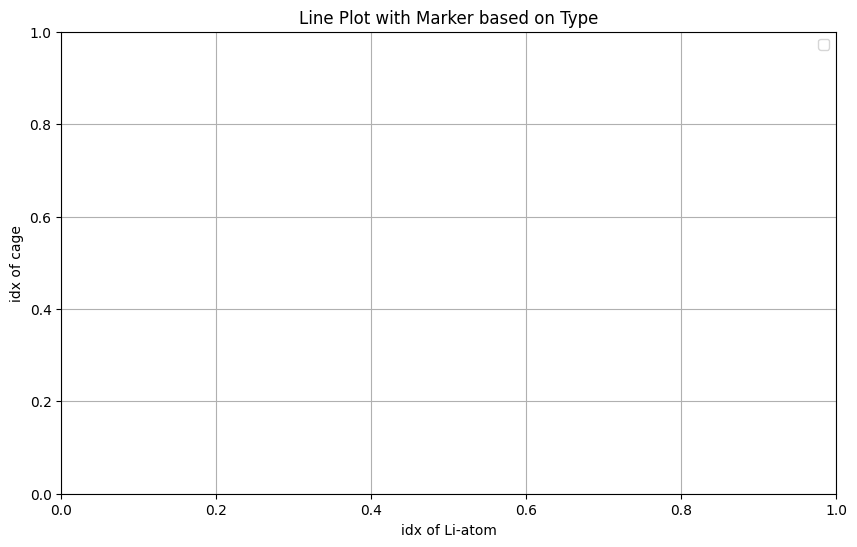

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


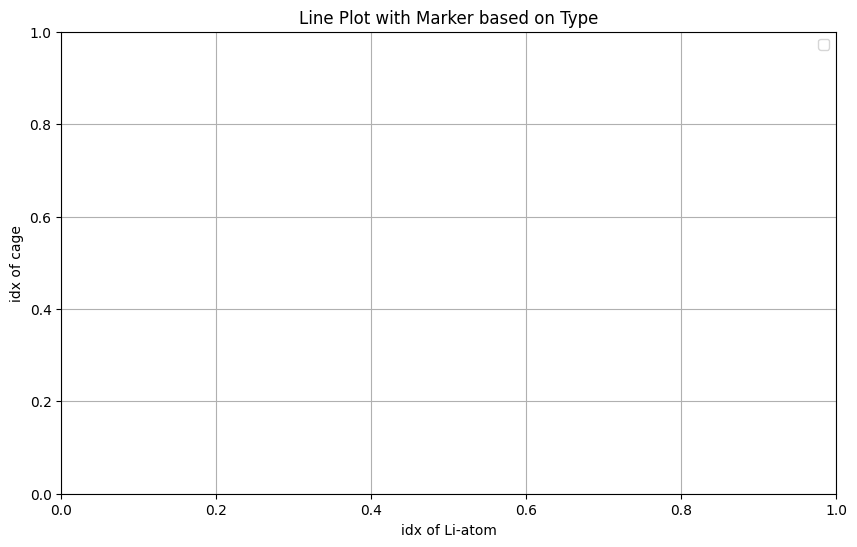

In [92]:
dataframe = file_loc_important_cols

# Define a dictionary to map 'type' values to marker styles
type_marker_mapping = {
    '48htype1': 'o',
    '48htype2': 's',
    '48htype3': '^',
    '48htype4': 'D',
    'weirdos': 'X',
    '24g': 'v'    
}

for idx in range(dataframe["geometry"].size):
    dict = file_loc_important_cols["idx_coor24li_tuple_cage_belongin_complete_closest"][idx]

    # Extract x and y values from the dictionary
    x_values = list(dict.keys())
    y_values = [entry['idx_cage'] for entry in dict.values()]
    types = [entry['type'] for entry in dict.values()]

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    # for x, y, type_val in zip(x_values, y_values, types):
    #     marker_style = type_marker_mapping.get(type_val, 'o')  # Get the marker style for the type
    #     plt.scatter(x, y, label=f"Type: {type_val}", marker=marker_style, s=100)
    # for i in range(len(x_values) - 1):
    #     x_start = x_values[i]
    #     x_end = x_values[i + 1]
    #     y_start = y_values[i]
    #     y_end = y_values[i + 1]
    #     type_val = types[i]
    #     marker_style = type_marker_mapping.get(type_val, 'o')  # Get the marker style for the type
    #     plt.plot([x_start, x_end], [y_start, y_end], marker=marker_style, label=f"Type: {type_val}")
    

    # Set labels and title
    plt.xlabel('idx of Li-atom')
    plt.ylabel('idx of cage')
    plt.title('Line Plot with Marker based on Type')

    # Add legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

In [93]:
file_loc_important_cols['idx_coor_limapped_weirdos_dict'][4]

{0: {'coor': (0.00875, 0.71083, 0.2891699999999999), 'label': '48htype4'},
 1: {'coor': (0.75, 0.25, 0.47111000000000003), 'label': '24g'},
 2: {'coor': (0.2891699999999999, 0.49125, 0.78917), 'label': '48htype4'},
 3: {'coor': (0.30709, 0.028, 0.69291), 'label': '48htype2'},
 4: {'coor': (0.2891699999999999, 0.99125, 0.28917000000000004),
  'label': '48htype4'},
 5: {'coor': (0.66882, 0.9714700000000001, 0.66882), 'label': '48htype3'},
 6: {'coor': (0.02853, 0.33118000000000003, 0.66882), 'label': '48htype3'},
 7: {'coor': (0.9714700000000001, 0.33118000000000003, 0.33118),
  'label': '48htype3'},
 8: {'coor': (0.33118, 0.5285299999999999, 0.16881999999999997),
  'label': '48htype3'},
 9: {'coor': (0.71083, 0.50875, 0.78917), 'label': '48htype4'},
 10: {'coor': (0.66882, 0.47147, 0.16881999999999997), 'label': '48htype3'},
 11: {'coor': (0.972, 0.80709, 0.80709), 'label': '48htype2'},
 12: {'coor': (0.28917000000000004, 0.21082999999999996, 0.50875),
  'label': '48htype4'},
 13: {'coo

In [94]:
# file_loc_important_cols['idx_coor24li_tuple_belongin_complete_closest_weight'][3]

In [95]:
# # # # dataframe = file_loc_important_cols


# # # # col_coor24li_tuple_belongin = "coor24li_tuple_belongin"
# # # # col_idx_coor_limapped_weirdos_dict = "idx_coor_limapped_weirdos_dict"

# # # # col_idx_coor24li_tuple_belongin = "idx_coor24li_tuple_belongin"
# # # # col_idx_coor24li_tuple_belongin_complete_closest = "idx_coor24li_tuple_belongin_complete_closest"
# # # # col_top_n_distance_coors = "top_n_distance_coors"

# # # # dataframe[col_idx_coor24li_tuple_belongin] = [{} for _ in range(len(dataframe.index))]
# # # # dataframe[col_idx_coor24li_tuple_belongin_complete_closest] = [{} for _ in range(len(dataframe.index))]
# # # # dataframe[col_top_n_distance_coors] = [{} for _ in range(len(dataframe.index))]

# # # # for idx in range(dataframe["geometry"].size):
# # # #     # for idx in [4]:
# # # #     idx_coor24li_tuple_belongin = defaultdict(list)

# # # #     idx_coor_limapped_weirdos_dict = dataframe[col_idx_coor_limapped_weirdos_dict][idx]
# # # #     coor24li_tuple_belongin = dataframe[col_coor24li_tuple_belongin][idx]

# # # #     for key_a, val_a in idx_coor_limapped_weirdos_dict.items():
# # # #         idx_li = key_a
# # # #         coor_li_mapped_a = val_a['coor']
# # # #         coor_li_mapped_a_rounded = tuple(round(coordinate, 5) for coordinate in coor_li_mapped_a)
# # # #         label_li_a = val_a['label']

# # # #         idx_coor24li_tuple_belongin[idx_li] = []
# # # #         for key_b, val_b in coor24li_tuple_belongin.items():
# # # #             idx_tuple = key_b
# # # #             for entry_b in val_b:
# # # #                 coor_li_mapped_b = entry_b['coor']
# # # #                 coor_li_mapped_b_rounded = tuple(round(coordinate, 5) for coordinate in coor_li_mapped_b)
# # # #                 label_li_b = entry_b['type']

# # # #                 if (coor_li_mapped_a_rounded == coor_li_mapped_b_rounded) and (label_li_a == label_li_b):
# # # #                     idx_coor24li_tuple_belongin_val = {'coor': coor_li_mapped_a, 'type':label_li_a, 'idx_tuple':idx_tuple}
# # # #                     idx_coor24li_tuple_belongin[idx_li].append(idx_coor24li_tuple_belongin_val)
# # # #     #                 count=count+1
# # # #     # print(count)
# # # #     dataframe.at[idx, col_idx_coor24li_tuple_belongin] = idx_coor24li_tuple_belongin
                    

In [96]:
# file_loc_important_cols['idx_coor24li_tuple_belongin'][4]

In [97]:
# # # # for idx in range(dataframe["geometry"].size):
# # # #     distance_coors_all = defaultdict(list)
# # # #     n = 3
# # # #     idx_coor_limapped_weirdos_dict = dataframe[col_idx_coor_limapped_weirdos_dict][idx]
# # # #     idx_coor24li_tuple_belongin = dataframe.at[idx, col_idx_coor24li_tuple_belongin]
# # # #     # idx_coor24li_tuple_belongin_complete_closest = idx_coor24li_tuple_belongin.copy()
# # # #     idx_coor24li_tuple_belongin_complete_closest = defaultdict(list)

# # # #     for key_c, val_c in idx_coor24li_tuple_belongin.items():
# # # #         idx_li = key_c
# # # #         idx_coor24li_tuple_belongin_complete_closest[idx_li] = []

# # # #         if val_c == []:
# # # #             coor_li_mapped_c = idx_coor_limapped_weirdos_dict[idx_li]['coor']
# # # #             label_li_c = idx_coor_limapped_weirdos_dict[idx_li]['label']

# # # #             distance_prev = float("inf")
# # # #             closest_idx_tuple = None
            
# # # #             for key_d, val_d in tuple_metainfo.items():
# # # #                 for entry_d in val_d: 
# # # #                     idx_tuple = key_d
# # # #                     coor_tuple_d = entry_d['coor']
# # # #                     label_li_d = entry_d['type']

# # # #                     distance = mic_eucledian_distance(coor_li_mapped_c, coor_tuple_d)

# # # #                     # distance_coors_all_val = {'coor_li_mapped': coor_li_mapped_c, 'coor_tuple': coor_tuple_d, 'dist': distance, 'label':label_li_d}

# # # #                     distance_coors_all_val = {'coor_tuple': coor_tuple_d, 'dist': distance, 'label':label_li_d, 'idx_tuple':idx_tuple}

# # # #                     distance_coors_all[idx_li].append(distance_coors_all_val)

# # # #                     if distance < distance_prev:
# # # #                         distance_prev = distance
# # # #                         closest_idx_tuple = idx_tuple

# # # #             idx_coor24li_tuple_belongin_complete_closest[idx_li] = {'coor': coor_li_mapped_c, 'type': label_li_c, 'idx_tuple': closest_idx_tuple}

# # # #         elif val_c != []:
# # # #             for entry_c in val_c: 
# # # #                 coor_li_mapped_c = entry_c['coor']
# # # #                 label_li_c = entry_c['type']
# # # #                 idx_tuple = entry_c['idx_tuple']

# # # #                 idx_coor24li_tuple_belongin_complete_closest[idx_li] = {'coor': coor_li_mapped_c, 'type': label_li_c, 'idx_tuple': idx_tuple}

# # # #     sorted_distance_coors_all = {key: sorted(value, key=lambda x: x['dist']) for key, value in distance_coors_all.items()}
# # # #     top_n_distance_coors = {k: v[0:n] for k, v in sorted_distance_coors_all.items()}
# # # #     # !!! assumed there's NO DUPLICATE with the SECOND distance

# # # #     dataframe.at[idx, col_idx_coor24li_tuple_belongin_complete_closest] = idx_coor24li_tuple_belongin_complete_closest
# # # #     dataframe.at[idx, col_top_n_distance_coors] = top_n_distance_coors

In [98]:
# file_loc_important_cols['idx_coor24li_tuple_belongin_complete_closest'][4]

In [99]:
file_loc_important_cols['top_n_distance_coors'][4]

{}

In [100]:
# sample_dict = file_loc_important_cols['idx_coor24li_tuple_belongin_complete_closest'][5]

# for key_a, val_a in sample_dict.items():
#     idx_li = key_a
#     print(val_a['coor'])
#     # for entry_a in val_a:
#     #     # print(idx_coor24li_tuple_belongin_complete_closest[idx_li]['coor'])
#     #     coor_li_mapped = entry_a['coor']

In [101]:
# # # # dataframe = file_loc_important_cols

# # # # col_idx_coor24li_tuple_belongin_complete_closest = "idx_coor24li_tuple_belongin_complete_closest"

# # # # df_weighted = pd.DataFrame()

# # # # multiplicator = litype + 2

# # # # # TO DO: to be refined with different litype
# # # # if litype == 4:
# # # #     weight_24g = 0
# # # #     weight_48htype4 = 1
# # # #     weight_48htype2 = 2
# # # #     weight_48htype3 = 3
# # # #     weight_48htype1 = 4
# # # #     weight_weirdos = 5 

# # # # for idx in range(dataframe["geometry"].size):
# # # #     # dict_weighted = defaultdict(list)

# # # #     idx_coor24li_tuple_belongin_complete_closest = dataframe[col_idx_coor24li_tuple_belongin_complete_closest][idx]

# # # #     idx_coor24li_tuple_belongin_complete_closest_weight = defaultdict(list)

# # # #     for key_a, val_a in idx_coor24li_tuple_belongin_complete_closest.items():
# # # #         idx_li = key_a
# # # #         # for entry_a in val_a:
# # # #             # print(idx_coor24li_tuple_belongin_complete_closest[idx_li]['coor'])
# # # #         coor_li_mapped = val_a['coor']
# # # #         type = val_a['type']
# # # #         idx_tuple = val_a['idx_tuple']

# # # #         if type == "24g":
# # # #             weighted_type = weight_24g
# # # #         elif type == "48htype4":
# # # #             weighted_type = weight_48htype4
# # # #         elif type == "48htype2":
# # # #             weighted_type = weight_48htype2
# # # #         elif type == "48htype3":
# # # #             weighted_type = weight_48htype3
# # # #         elif type == "48htype1":
# # # #             weighted_type = weight_48htype1
# # # #         elif type == "weirdos":
# # # #             weighted_type = weight_weirdos
# # # #         else:
# # # #             print("wrong type")
        
# # # #         weight = idx_tuple * multiplicator + weighted_type
    
# # # #         idx_coor24li_tuple_belongin_complete_closest_weight[idx_li] = {'coor': coor_li_mapped, 'type': type, 'idx_tuple': idx_tuple, 'weight':weight}

# # # #     for j in range(amount_Li):
# # # #         df_weighted.at[idx, f"{j}"] = None  

# # # #         # coor_Li_ref_mean = np.mean(coor_Li_ref, axis=0)
# # # #         # distance = mic_eucledian_distance(coor_Li_ref_mean, coor_Li[j])

# # # #         # dict_weighted[f"{j}"] = {f'dist: {distance}, coor_ref: {coor_Li_ref_mean}, coor_Li: {coor_Li[j]}'}
        
# # # #         for key_b, val_b in idx_coor24li_tuple_belongin_complete_closest_weight.items():
# # # #             # for entry_b in val_b: 
# # # #             df_weighted.at[idx, f"{j}"] = val_b['weight']

# # # #         # diameter_24g48h = max_mapping_radius * 2
# # # #         # # if distance < diameter_24g48h and index != idx_ref:
# # # #         # if distance > diameter_24g48h and idx != idx_ref:
# # # #         #     print(f"path: {idx}, Li: {j}, distance: {distance}")

In [102]:
# example_dict = file_loc_important_cols['idx_coor24li_tuple_belongin_complete_closest'][0]

In [103]:
# example_dict

In [104]:
# multiplicator = litype + 2

# # TO DO: to be refined with different litype
# weight_24g = 0
# weight_48htype4 = 1
# weight_48htype2 = 2
# weight_48htype3 = 3
# weight_48htype1 = 4
# weight_weirdos = 5 

# idx_coor24li_tuple_belongin_complete_closest_weight = defaultdict(list)

# for key, val in example_dict.items():
#     idx_li = key
#     for entry in val:
#         coor_li_mapped = entry['coor']
#         type = entry['type']
#         idx_tuple = entry['idx_tuple']

#         if type == "24g":
#             weighted_type = weight_24g
#         elif type == "48htype4":
#             weighted_type = weight_48htype4
#         elif type == "48htype2":
#             weighted_type = weight_48htype2
#         elif type == "48htype3":
#             weighted_type = weight_48htype3
#         elif type == "48htype1":
#             weighted_type = weight_48htype1
#         elif type == "weirdos":
#             weighted_type = weight_weirdos
#         else:
#             print("wrong type")
        
#         weight = idx_tuple * multiplicator + weighted_type
    
#         idx_coor24li_tuple_belongin_complete_closest_weight[idx_li] = {'coor': coor_li_mapped, 'type': type, 'idx_tuple': idx_tuple, 'weight':weight}
        

In [105]:
# idx_coor24li_tuple_belongin_complete_closest_weight

In [106]:
get_amount_type(file_loc_important_cols_sorted, litype, el = "Li")

el = "Li"
style = "bar"


category_labels = {
    '48htype1': '48htype2',
    '48htype2': '48htype1',
    '48htype3': '48htype3',
    '48htype4': '48htype4',
    '24g': '24g',
    'weirdo': 'weirdo'
    # ... add more as needed
}

df = plot_amount_type(file_loc_important_cols_sorted, litype, el, style, category_labels)

In [107]:
file_loc_important_cols_sorted.head(21)

,index,geometry,path,subdir_new_system,g+p,g+p+1,g+p-1,perfect_system,p_s_mask,toten [eV],...,len_coor_reduced120_Li,len_idx0_weirdos_Li,len_idx_without_weirdos,ndim_flag_coor,latticeconstant_structure_dict_CONTCAR,latticeconstant_structure_dict_CONTCAR_flag,atom_mapping_Li_w_dist_label,occupancy,coor24li_tuple_cage_belongin,amount_type_Li
0,6,0.0,2.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,2.0,3.0,1.0,NaN,0,-272.408983,...,24,0,24,False,"{'a': 9.641986918935988, 'b': 9.64198691893598...",True,"{(0.00875, 0.78917, 0.21082999999999996): {'cl...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 7, '48htype3': 9, ..."
1,0,0.0,8.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,8.0,0.0,7.0,NaN,0,-272.337269,...,24,0,24,False,"{'a': 9.660449953488865, 'b': 9.66044995348886...",True,"{(0.30709, 0.028, 0.69291): {'closest24': (0.3...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 6, '48htype3': 9, ..."
2,1,0.0,7.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,7.0,8.0,6.0,NaN,0,-272.309259,...,24,0,24,False,"{'a': 9.655174800759472, 'b': 9.65517480075947...",True,"{(0.97111, 0.75, 0.75): {'closest24': (0.98419...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 7, '48htype3': 8, ..."
3,5,0.0,3.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,3.0,4.0,2.0,NaN,0,-272.260001,...,24,0,24,False,"{'a': 9.644624495300684, 'b': 9.64462449530068...",True,"{(0.02889, 0.75, 0.25): {'closest24': (0.01647...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 7, '48htype3': 9, ..."
4,7,0.0,1.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,1.0,2.0,0.0,NaN,0,-272.258730,...,24,0,24,False,"{'a': 9.639349342571292, 'b': 9.63934934257129...",True,"{(0.75, 0.02889, 0.25): {'closest24': (0.74647...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.972 0.30709 0.30709], 'type...","{'48htype1': 0, '48htype2': 8, '48htype3': 8, ..."
5,8,0.0,0.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,0.0,1.0,0.0,0.0,1,-272.239606,...,24,0,24,False,"{'a': 9.636711766206595, 'b': 9.63671176620659...",True,"{(0.33118, 0.02853, 0.66882): {'closest24': (0...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.972 0.30709 0.30709], 'type...","{'48htype1': 0, '48htype2': 8, '48htype3': 8, ..."
6,2,0.0,6.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,6.0,7.0,5.0,NaN,0,-272.227022,...,24,0,24,False,"{'a': 9.652537224394775, 'b': 9.65253722439477...",True,"{(0.21082999999999996, 0.99125, 0.21083): {'cl...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 8, '48htype3': 8, ..."
7,4,0.0,4.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,4.0,5.0,3.0,NaN,0,-272.208118,...,24,0,24,False,"{'a': 9.64726207166538, 'b': 9.64726207166538,...",True,"{(0.00875, 0.71083, 0.2891699999999999): {'clo...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 7, '48htype3': 10,..."
8,3,0.0,5.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,5.0,6.0,4.0,NaN,0,-271.870564,...,24,0,24,False,"{'a': 9.649899648030079, 'b': 9.64989964803007...",True,"{(0.25, 0.97111, 0.25): {'closest24': (0.25674...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 9, '48htype3': 9, ..."


In [108]:
get_amount_type(file_loc_important_cols, litype, el = "Li")
df = plot_amount_type(file_loc_important_cols, litype, el, style, category_labels)

In [109]:
test = pd.concat([file_loc_important_cols_sorted[6:7], file_loc_important_cols_sorted[0:2]], ignore_index=False)

In [110]:
test

,index,geometry,path,subdir_new_system,g+p,g+p+1,g+p-1,perfect_system,p_s_mask,toten [eV],...,len_coor_reduced120_Li,len_idx0_weirdos_Li,len_idx_without_weirdos,ndim_flag_coor,latticeconstant_structure_dict_CONTCAR,latticeconstant_structure_dict_CONTCAR_flag,atom_mapping_Li_w_dist_label,occupancy,coor24li_tuple_cage_belongin,amount_type_Li
6,2,0.0,6.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,6.0,7.0,5.0,NaN,0,-272.227022,...,24,0,24,False,"{'a': 9.652537224394775, 'b': 9.65253722439477...",True,"{(0.21082999999999996, 0.99125, 0.21083): {'cl...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 8, '48htype3': 8, ..."
0,6,0.0,2.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,2.0,3.0,1.0,NaN,0,-272.408983,...,24,0,24,False,"{'a': 9.641986918935988, 'b': 9.64198691893598...",True,"{(0.00875, 0.78917, 0.21082999999999996): {'cl...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 7, '48htype3': 9, ..."
1,0,0.0,8.0,/home/azka/Documents/01_Masterthesis/XDATCAR-T...,8.0,0.0,7.0,NaN,0,-272.337269,...,24,0,24,False,"{'a': 9.660449953488865, 'b': 9.66044995348886...",True,"{(0.30709, 0.028, 0.69291): {'closest24': (0.3...","{'2': 0, '1': 24, '0': 0, '48htype1': 0, 'weir...","{0: [{'coor': [0.97147 0.33118 0.33118], 'type...","{'48htype1': 0, '48htype2': 6, '48htype3': 9, ..."


# Intra triad

In [111]:
from get_weirdos_ver3_new_cleaned import get_distance_litoli
var_filename = "CONTCAR_positive"



In [112]:
idx_ref = 0
idx_file_group = [0, 16]
mean_ref = False
df_distance, dataframe_group = get_distance_litoli(file_loc_important_cols_sorted, max_mapping_radius, direc_restructure_destination, idx_file_group, idx_ref, mean_ref, var_filename)
# plot_distance_wrtpath0(df_distance, max_mapping_radius, Li_idxs="all")

df_distance_average_rms = df_distance.copy()
column_averages = df_distance.mean()
df = df.append(column_averages, ignore_index=True)

df_distance.transpose().to_excel(f'06_distance_LitoLi_intratriad_litype{litype}_{var_filename}.xlsx', index=True)

coor_Li_ref: [array([0.97555738, 0.35325315, 0.28589864]), array([0.97249082, 0.84274984, 0.78766517]), array([0.0299127 , 0.31566231, 0.68657755]), array([0.01807955, 0.78619439, 0.2269263 ]), array([0.17570255, 0.17474942, 0.96024579]), array([0.20226231, 0.81510154, 0.02406078]), array([0.82297562, 0.18504686, 0.01747992]), array([0.78456065, 0.79100282, 0.98564122]), array([0.28772773, 0.98725858, 0.29588656]), array([0.32700066, 0.03114993, 0.6737916 ]), array([0.6781755 , 0.95911724, 0.65591543]), array([0.78367956, 0.01411495, 0.23241638]), array([0.18180519, 0.66210449, 0.46420556]), array([0.25192539, 0.26808932, 0.50777404]), array([0.83084618, 0.65766607, 0.54195728]), array([0.78362642, 0.26980102, 0.47926292]), array([0.28761365, 0.48732426, 0.78695265]), array([0.32910368, 0.54347673, 0.15799195]), array([0.66953714, 0.46257708, 0.16904229]), array([0.7111951 , 0.51543244, 0.80196463]), array([0.47881862, 0.28721523, 0.83140375]), array([0.47763247, 0.79271726, 0.34772821

/tmp/ipykernel_58634/1800845807.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



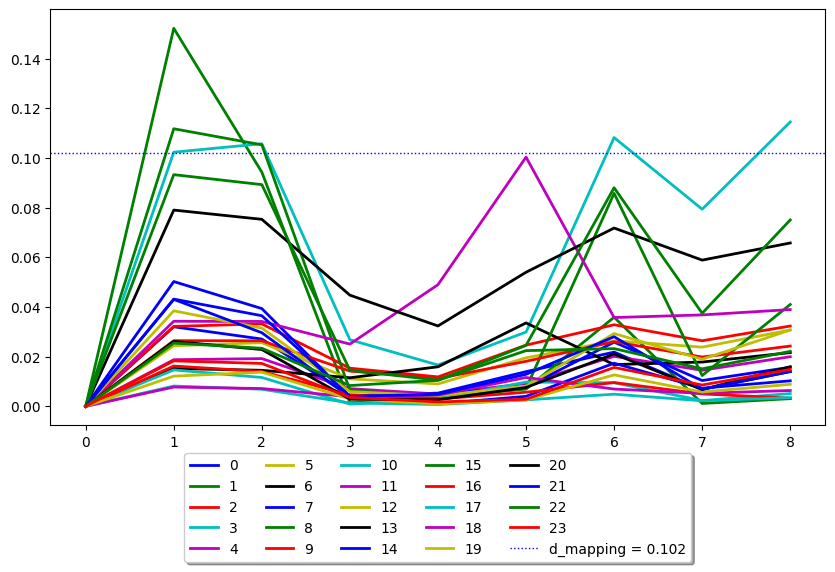

In [113]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs='all')

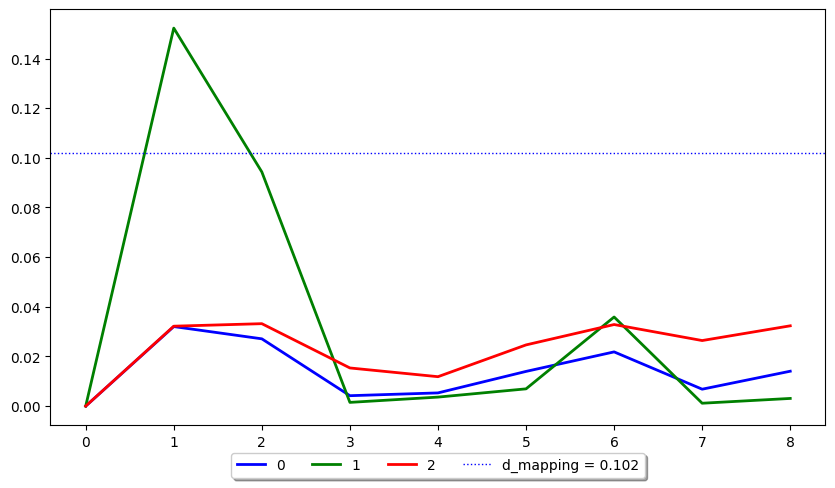

In [114]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs=range(3))

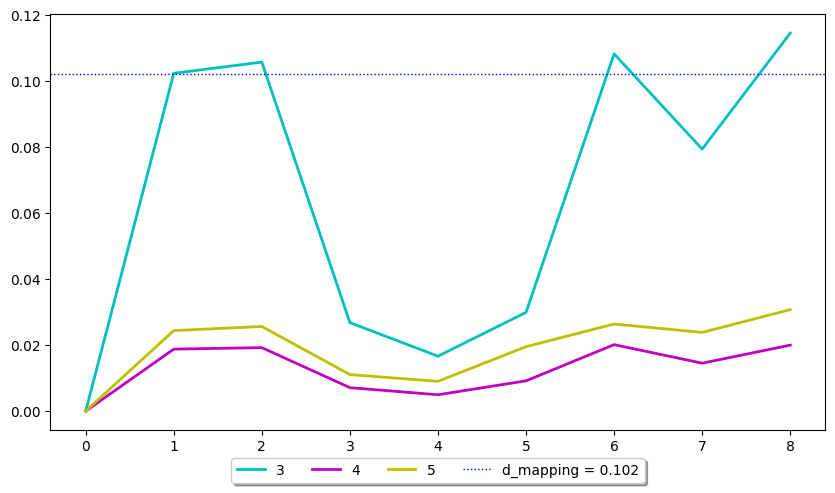

In [115]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs=range(3,6))

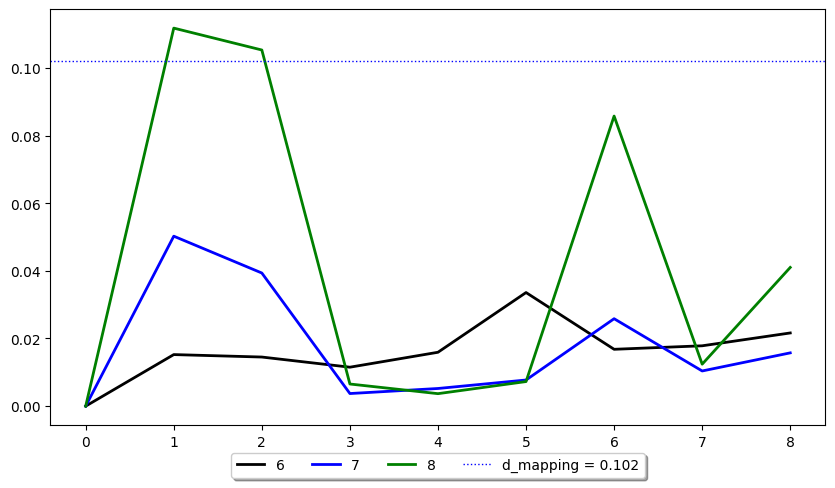

In [116]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs=range(6,9))

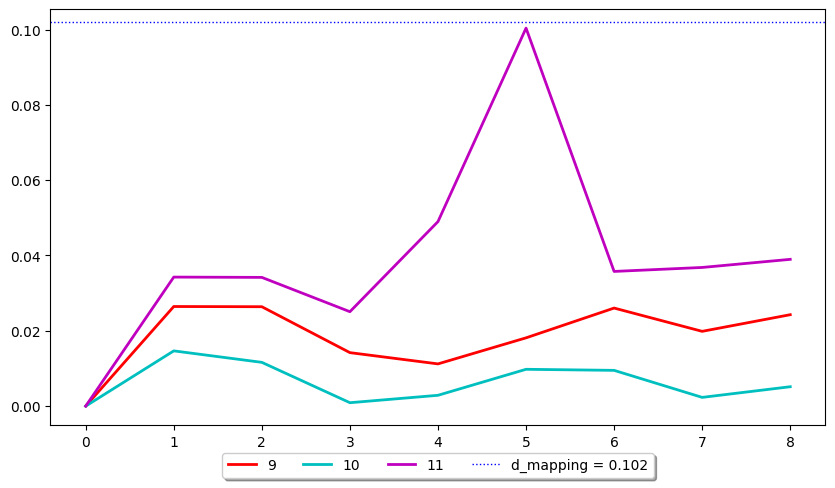

In [117]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs=range(9,12))

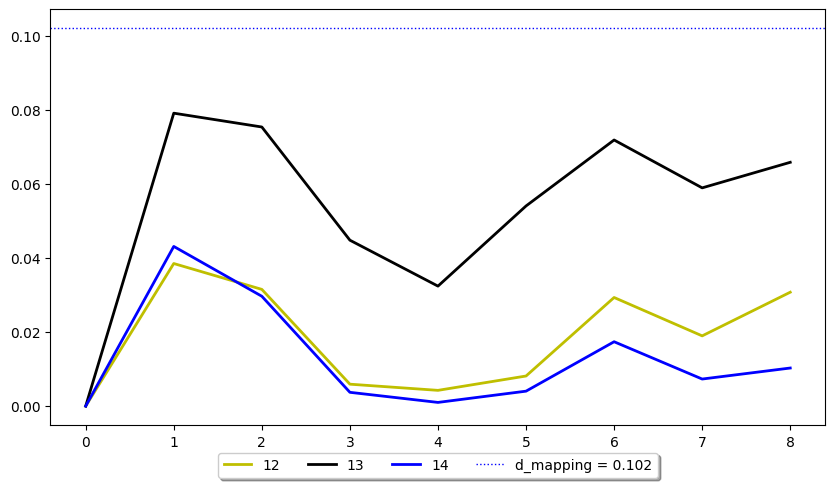

In [118]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs=range(12,15))

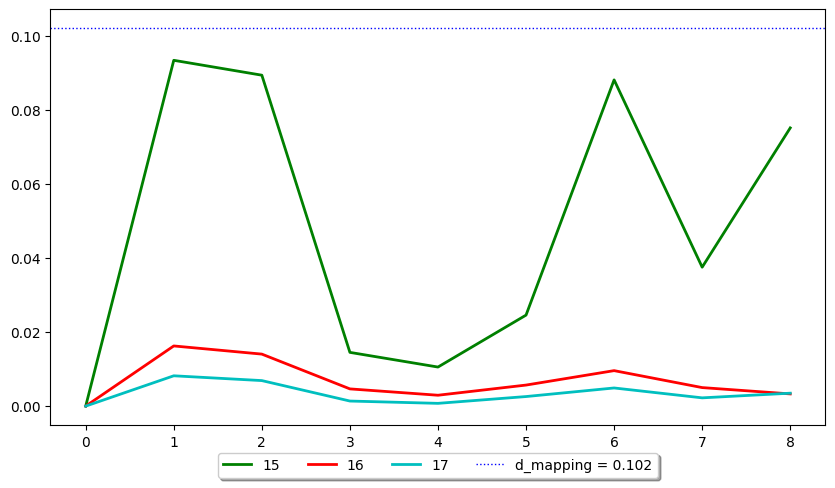

In [119]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs=range(15,18))

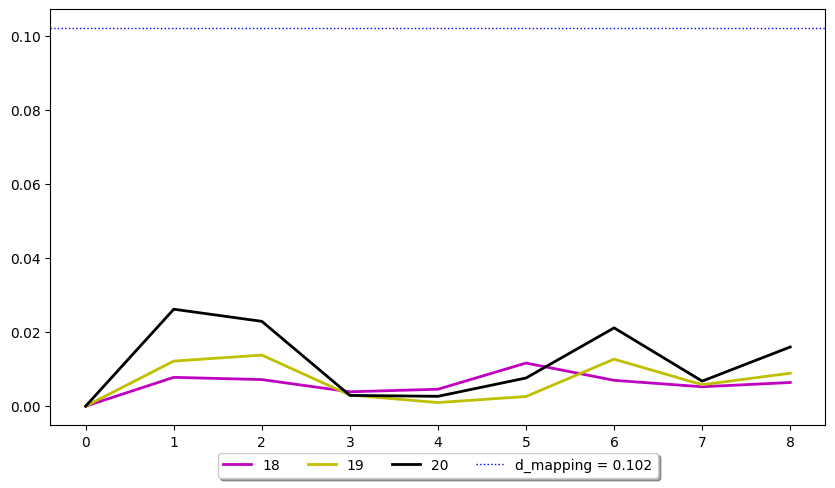

In [120]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs=range(18,21))

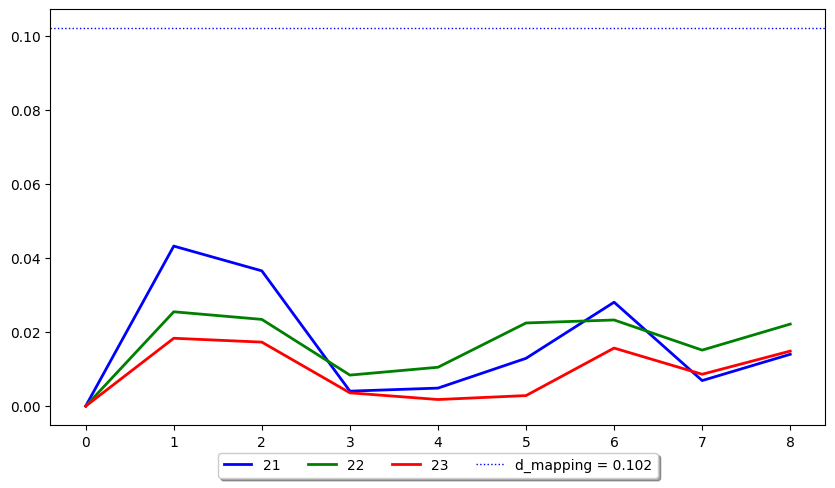

In [121]:
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs=range(21,24))

In [122]:
df_distance.iloc[:, :12]

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.032036,0.152243,0.032191,0.102359,0.018781,0.024408,0.015241,0.050257,0.111798,0.026448,0.014669,0.034261
2,0.027100,0.094312,0.033204,0.105753,0.019232,0.025642,0.014514,0.039366,0.105322,0.026394,0.011620,0.034183
3,0.004198,0.001501,0.015367,0.026813,0.007107,0.011071,0.011511,0.003718,0.006537,0.014200,0.000904,0.025072
4,0.005319,0.003630,0.011851,0.016640,0.004954,0.009019,0.015927,0.005213,0.003683,0.011211,0.002871,0.048994
5,0.013978,0.006952,0.024649,0.029918,0.009172,0.019532,0.033592,0.007723,0.007261,0.018128,0.009776,0.100374
6,0.021840,0.035888,0.032855,0.108253,0.020141,0.026388,0.016805,0.025851,0.085783,0.026037,0.009493,0.035763
7,0.006815,0.001163,0.026407,0.079391,0.014525,0.023845,0.017839,0.010393,0.012405,0.019855,0.002318,0.036820
8,0.014056,0.003093,0.032343,0.114535,0.019988,0.030748,0.021637,0.015748,0.041018,0.024276,0.005150,0.038973


In [123]:
df_distance.iloc[:, 12:24]

,12,13,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.038476,0.079048,0.043089,0.093314,0.016236,0.008183,0.007761,0.012154,0.026147,0.043182,0.025455,0.018313
2,0.031499,0.075316,0.029642,0.089297,0.014034,0.006887,0.007163,0.013763,0.022874,0.036497,0.023399,0.017268
3,0.005917,0.044773,0.003722,0.014501,0.004648,0.001369,0.003865,0.002978,0.002890,0.004039,0.008371,0.003585
4,0.004253,0.032379,0.000998,0.010540,0.002935,0.000745,0.004556,0.000960,0.002642,0.004860,0.010484,0.001779
5,0.008125,0.054010,0.004035,0.024558,0.005679,0.002582,0.011617,0.002594,0.007588,0.012898,0.022435,0.002844
6,0.029310,0.071811,0.017372,0.088032,0.009574,0.004897,0.006959,0.012671,0.021116,0.028040,0.023241,0.015661
7,0.018954,0.058891,0.007305,0.037490,0.004999,0.002231,0.005223,0.005766,0.006742,0.006894,0.015112,0.008598
8,0.030737,0.065791,0.010279,0.075075,0.003294,0.003487,0.006372,0.008878,0.015959,0.013984,0.022138,0.014852


coor_Li_ref: [array([0.97555738, 0.35325315, 0.28589864]), array([0.97249082, 0.84274984, 0.78766517]), array([0.0299127 , 0.31566231, 0.68657755]), array([0.01807955, 0.78619439, 0.2269263 ]), array([0.17570255, 0.17474942, 0.96024579]), array([0.20226231, 0.81510154, 0.02406078]), array([0.82297562, 0.18504686, 0.01747992]), array([0.78456065, 0.79100282, 0.98564122]), array([0.28772773, 0.98725858, 0.29588656]), array([0.32700066, 0.03114993, 0.6737916 ]), array([0.6781755 , 0.95911724, 0.65591543]), array([0.78367956, 0.01411495, 0.23241638]), array([0.18180519, 0.66210449, 0.46420556]), array([0.25192539, 0.26808932, 0.50777404]), array([0.83084618, 0.65766607, 0.54195728]), array([0.78362642, 0.26980102, 0.47926292]), array([0.28761365, 0.48732426, 0.78695265]), array([0.32910368, 0.54347673, 0.15799195]), array([0.66953714, 0.46257708, 0.16904229]), array([0.7111951 , 0.51543244, 0.80196463]), array([0.47881862, 0.28721523, 0.83140375]), array([0.47763247, 0.79271726, 0.34772821

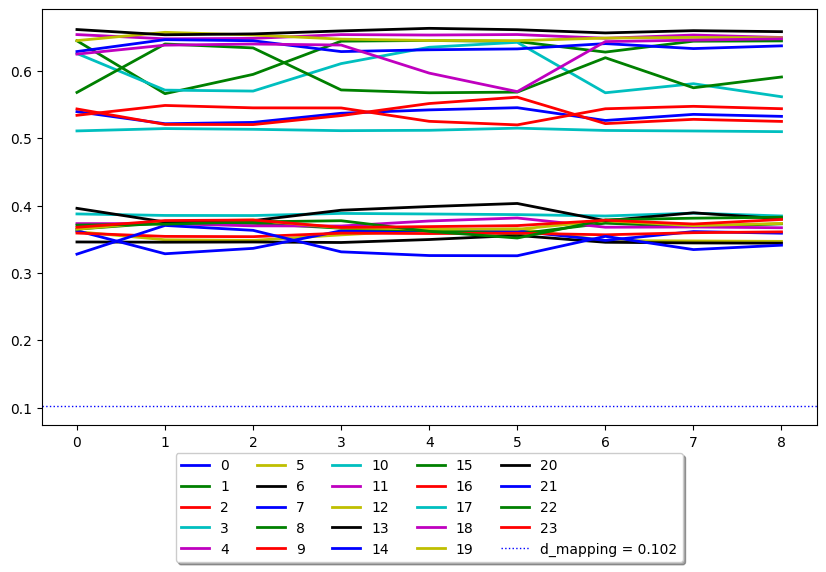

/tmp/ipykernel_58634/1578383789.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [124]:
idx_ref = 0
idx_file_group = [0, 16]
mean_ref = True
df_distance, dataframe_group = get_distance_litoli(file_loc_important_cols_sorted, max_mapping_radius, direc_restructure_destination, idx_file_group, idx_ref, mean_ref, var_filename)
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=True, Li_idxs="all")

df_distance_average_rms = df_distance.copy()
column_averages = df_distance.mean()
df = df.append(column_averages, ignore_index=True)

df_distance.transpose().to_excel(f'06_distance_LitoLi_intratriad_litype{litype}_{var_filename}_meanref.xlsx', index=True)

In [125]:
df_distance

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.539378,0.644552,0.543406,0.625734,0.653778,0.644851,0.661274,0.628617,0.567941,0.533988,...,0.362741,0.365057,0.359167,0.387581,0.373241,0.364938,0.395908,0.327916,0.371019,0.367747
1,0.521457,0.566081,0.520467,0.571355,0.647525,0.657152,0.653503,0.646278,0.639835,0.548596,...,0.328459,0.374456,0.354252,0.385342,0.373224,0.376524,0.375605,0.370498,0.372378,0.377760
2,0.523454,0.594722,0.520199,0.569944,0.648150,0.653182,0.654822,0.644613,0.633981,0.545043,...,0.336470,0.373587,0.353832,0.385200,0.369901,0.378577,0.377616,0.363219,0.375795,0.378586
3,0.537006,0.644003,0.533571,0.610714,0.653749,0.647049,0.659249,0.628553,0.571605,0.544884,...,0.362499,0.366392,0.359061,0.388354,0.369669,0.366877,0.393112,0.331324,0.377511,0.367519
4,0.542025,0.645074,0.551454,0.634968,0.653118,0.645056,0.663061,0.631242,0.567419,0.525039,...,0.362848,0.363058,0.358474,0.387491,0.377117,0.365217,0.398546,0.325813,0.361711,0.368775
5,0.545249,0.643550,0.560872,0.642319,0.653860,0.644832,0.661041,0.632541,0.568404,0.519751,...,0.362293,0.357825,0.358998,0.386588,0.381544,0.364782,0.403117,0.325504,0.351820,0.370239
6,0.526304,0.627801,0.521627,0.567431,0.648328,0.648638,0.656257,0.640387,0.619431,0.543669,...,0.348250,0.373859,0.356612,0.384530,0.367865,0.377442,0.377550,0.354317,0.378814,0.378198
7,0.535366,0.643982,0.527989,0.580858,0.653119,0.649539,0.659639,0.633023,0.574844,0.547292,...,0.361399,0.368606,0.359738,0.388768,0.368201,0.370188,0.389203,0.334669,0.381275,0.372621
8,0.532410,0.644412,0.524895,0.561539,0.649485,0.648932,0.658115,0.637056,0.590840,0.543760,...,0.358970,0.372899,0.360978,0.384552,0.367081,0.373458,0.380439,0.341192,0.382673,0.379355


In [126]:
# for i in range(amount_Li):
#     plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=False, Li_idxs=[i])

In [127]:
dataframe = file_loc_important_cols
idx_ref = 0
destination_directory = direc_restructure_destination
coor_Li_ref = []

if 'CONTCAR' in var_filename:
    file_ref = f"{int(dataframe['geometry'][idx_ref])}_{int(dataframe['path'][idx_ref])}_{var_filename}"
else:
    file_ref = f"{int(dataframe['geometry'][idx_ref])}_{int(dataframe['path'][idx_ref])}_{var_filename}.cif"
file_path_ref = os.path.join(destination_directory, file_ref)

structure_ref = Structure.from_file(file_path_ref)

for idx, coor in enumerate(structure_ref):
    if coor.species_string == "Li":
        coor_Li_ref.append(coor.frac_coords)

In [128]:
coor_Li_ref

[array([0.96525344, 0.34559825, 0.31525022]),
 array([0.98772423, 0.71235266, 0.71057802]),
 array([0.04481312, 0.31763191, 0.65811057]),
 array([0.01398082, 0.70302554, 0.28645397]),
 array([0.1676483 , 0.19144109, 0.95720653]),
 array([0.17790403, 0.81663076, 0.02433647]),
 array([0.81551866, 0.19806252, 0.01478466]),
 array([0.81430589, 0.82727927, 0.96761231]),
 array([0.19948492, 0.99559736, 0.22775158]),
 array([0.33096934, 0.02270827, 0.69853976]),
 array([0.68674158, 0.95565236, 0.66730824]),
 array([0.8144338 , 0.02256861, 0.21990514]),
 array([0.20845995, 0.68744854, 0.475503  ]),
 array([0.31228308, 0.2173594 , 0.51342789]),
 array([0.79131147, 0.66277681, 0.52560126]),
 array([0.72166757, 0.20007782, 0.47657409]),
 array([0.30210415, 0.48122286, 0.79100197]),
 array([0.32477814, 0.54792097, 0.16333003]),
 array([0.67248738, 0.46972358, 0.16971967]),
 array([0.71981898, 0.51298303, 0.81017164]),
 array([0.49253249, 0.2895741 , 0.80926693]),
 array([0.46734415, 0.83122375, 0.

In [129]:
coor_Li_ref_mean = np.mean(coor_Li_ref, axis=0)

In [130]:
coor_Li_ref_mean

array([0.50348468, 0.4964782 , 0.49657773])

# Intra cage

In [131]:
def get_distance_litoli_meanref(dataframe, max_mapping_radius, destination_directory, idx_file_group, idx_ref, var_filename):
    """
        idx_file_group = [idx_init, idx_end]
    """
    df_distance = pd.DataFrame()
    coor_Li_ref = []
    # df_dist_litoli = pd.DataFrame()

    # df_dist_litoli["dist"] = None

    file_ref = f"{int(dataframe['geometry'][idx_ref])}_{int(dataframe['path'][idx_ref])}_{var_filename}.cif"
    file_path_ref = os.path.join(destination_directory, file_ref)

    structure_ref = Structure.from_file(file_path_ref)

    for idx, coor in enumerate(structure_ref):
        if coor.species_string == "Li":
            coor_Li_ref.append(coor.frac_coords)

    # for i in path_geo:
    dataframe_group = dataframe[idx_file_group[0]:idx_file_group[1]]
    idx_range = list(range(dataframe_group["geometry"].size))
    if idx_ref > idx_file_group[1]:
         # dataframe_group = dataframe_group.append(dataframe[idx_ref-1:idx_ref], ignore_index=True)
        dataframe_group = pd.concat([dataframe[idx_ref:idx_ref+1], dataframe[idx_file_group[0]:idx_file_group[1]]], ignore_index=False)
        # idx_range = [idx_ref] + list(range(dataframe_group["geometry"].size - 1))
        idx_range = [idx_ref] + idx_range

    for index in idx_range:
        # for index in [1]:
        coor_Li = []
        dict_distance = defaultdict(list)

        file = f"{int(dataframe_group['geometry'][index])}_{int(dataframe_group['path'][index])}_{var_filename}.cif"
        file_path = os.path.join(destination_directory, file)

        structure = Structure.from_file(file_path)
        # frac_coor = structure.frac_coords

        for idx, coor in enumerate(structure):
            if coor.species_string == "Li":
                coor_Li.append(coor.frac_coords)        
            
        coors_Li_dist_structures = defaultdict(list)

        for j in range(len(coor_Li)):
            df_distance.at[index, f"{j}"] = None  

            distance = mic_eucledian_distance(coor_Li_ref[j], coor_Li[j])

            dict_distance[f"{j}"] = {f'dist: {distance}, coor_ref: {coor_Li_ref[j]}, coor_Li: {coor_Li[j]}'}
            df_distance.at[index, f"{j}"] = distance

            diameter_24g48h = max_mapping_radius * 2
            if distance < diameter_24g48h and index != idx_ref:
                print(f"path: {index}, Li: {j}, distance: {distance}")

    #         coors_Li_dist_structures_dict = {}
            
    #         for k in range(len(coor_Li)):

    #             distance_litoli = mic_eucledian_distance(coor_Li[j], coor_Li[k])

    #             coors_Li_dist_structures_dict['coors'] = (coor_Li[j], coor_Li[k])
    #             coors_Li_dist_structures_dict['dist'] = distance_litoli
    #             # coors_Li_dist_structures_dict['structures'] = (val_temp1['structure'], val_temp2['structure'])

    #             key = (j, k)
    #             if key in coors_Li_dist_structures:
    #                 coors_Li_dist_structures[key].append(coors_Li_dist_structures_dict)
    #             else:
    #                 coors_Li_dist_structures[key] = coors_Li_dist_structures_dict               

    #     sorted_coors_Li_dist_structures = dict(sorted(coors_Li_dist_structures.items(), key=lambda item: item[1]['dist']))
    #     dist_ascending = list({val['dist'] for idx, val in sorted_coors_Li_dist_structures.items()})

    #     df_dist_litoli.at[index, "dist"] = dist_ascending[1:6]

    #     # df_coor.at[i, col_xyz_coor] = coor_Li

    # #     # # for j in range(len(coor_Li)):
    # #     # #     # df_distance.at[i, f"{j}"] = None  

    # #     # #     distance = mic_eucledian_distance(coor_Li_ref[j], coor_Li[j])

    # #     # #     df_distance.at[i, f"{j}"] = distance

    # #     # #     diameter_24g48h = max_mapping_radius * 2
    # #     # #     if distance < diameter_24g48h and i != 0:
    # #     # #         print(f"path: {i}, Li: {j}, distance: {distance}")

    return df_distance, dataframe_group

coor_Li_ref: [array([0.97515587, 0.35539898, 0.2894843 ]), array([0.97133535, 0.84251237, 0.78859337]), array([0.03524159, 0.31684031, 0.67221203]), array([0.01647031, 0.76461817, 0.24276285]), array([0.17033951, 0.17937106, 0.9596234 ]), array([0.19446791, 0.82056653, 0.02971337]), array([0.81681934, 0.1925972 , 0.01134867]), array([0.7816284 , 0.79327557, 0.98589291]), array([0.28177649, 0.98773067, 0.29322321]), array([0.32340754, 0.02471433, 0.68592917]), array([0.67777279, 0.95942502, 0.65666348]), array([0.8045179 , 0.01679145, 0.21873491]), array([0.18574842, 0.66009052, 0.46813129]), array([0.28507763, 0.23800604, 0.50851978]), array([0.8290778 , 0.66091602, 0.5415542 ]), array([0.77514157, 0.25830202, 0.47679907]), array([0.28404856, 0.48670786, 0.78403529]), array([0.32923375, 0.5445711 , 0.15717973]), array([0.66665799, 0.46265575, 0.17161964]), array([0.71415312, 0.51530705, 0.80228268]), array([0.47850789, 0.28921148, 0.82933665]), array([0.4772535 , 0.79672488, 0.34806052

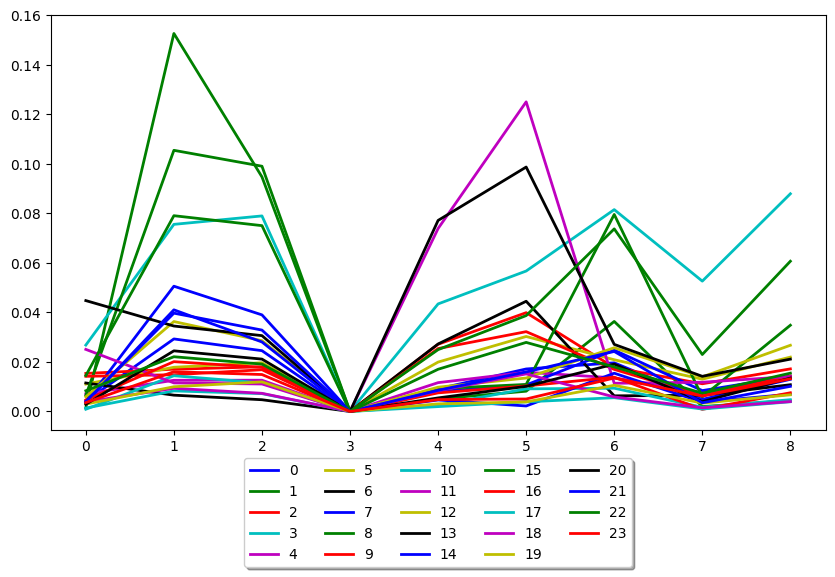

In [132]:
idx_ref = 3 # 20
idx_file_group = [0, 16]
mean_ref = False
df_distance, dataframe_group = get_distance_litoli(file_loc_important_cols_sorted, max_mapping_radius, direc_restructure_destination, idx_file_group, idx_ref, mean_ref, var_filename)
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=False, Li_idxs="all")

df_distance.transpose().to_excel(f'06_distance_LitoLi_intracage_litype{litype}_{var_filename}.xlsx', index=True)

In [133]:
df_distance

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.004198,0.001501,0.015367,0.026813,0.007107,0.011071,0.011511,0.003718,0.006537,0.014200,...,0.003722,0.014501,0.004648,0.001369,0.003865,0.002978,0.002890,0.004039,0.008371,0.003585
1,0.029292,0.152632,0.017061,0.075556,0.012600,0.017854,0.006585,0.050579,0.105453,0.014840,...,0.041040,0.079054,0.020115,0.008301,0.009357,0.009987,0.024487,0.039694,0.022100,0.016043
2,0.024549,0.094718,0.018036,0.078964,0.012626,0.019675,0.004744,0.039007,0.099030,0.016855,...,0.028059,0.075037,0.017814,0.007206,0.007332,0.011945,0.021147,0.032869,0.019126,0.014919
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.009153,0.005071,0.027142,0.043433,0.011640,0.019947,0.027251,0.008047,0.009249,0.025397,...,0.004640,0.024972,0.007514,0.001970,0.008390,0.003071,0.005477,0.008549,0.017043,0.004811
5,0.017163,0.008190,0.039894,0.056714,0.015842,0.030280,0.044501,0.010701,0.010914,0.032228,...,0.002221,0.038716,0.010300,0.003888,0.015169,0.003864,0.010143,0.015968,0.027892,0.005041
6,0.019643,0.036351,0.017716,0.081507,0.013569,0.020884,0.006313,0.024770,0.079554,0.016987,...,0.015445,0.073730,0.013834,0.005563,0.005865,0.010578,0.019115,0.024239,0.017991,0.013511
7,0.004883,0.001999,0.011189,0.052632,0.007590,0.013035,0.006546,0.008425,0.005882,0.006359,...,0.003777,0.023005,0.000854,0.000990,0.001479,0.003371,0.003968,0.003506,0.007354,0.006218
8,0.012980,0.004328,0.017199,0.087904,0.013300,0.021954,0.010802,0.014244,0.034827,0.014288,...,0.006978,0.060667,0.007552,0.003926,0.004001,0.006729,0.013488,0.010146,0.015472,0.013179


coor_Li_ref: [array([0.97515587, 0.35539898, 0.2894843 ]), array([0.97133535, 0.84251237, 0.78859337]), array([0.03524159, 0.31684031, 0.67221203]), array([0.01647031, 0.76461817, 0.24276285]), array([0.17033951, 0.17937106, 0.9596234 ]), array([0.19446791, 0.82056653, 0.02971337]), array([0.81681934, 0.1925972 , 0.01134867]), array([0.7816284 , 0.79327557, 0.98589291]), array([0.28177649, 0.98773067, 0.29322321]), array([0.32340754, 0.02471433, 0.68592917]), array([0.67777279, 0.95942502, 0.65666348]), array([0.8045179 , 0.01679145, 0.21873491]), array([0.18574842, 0.66009052, 0.46813129]), array([0.28507763, 0.23800604, 0.50851978]), array([0.8290778 , 0.66091602, 0.5415542 ]), array([0.77514157, 0.25830202, 0.47679907]), array([0.28404856, 0.48670786, 0.78403529]), array([0.32923375, 0.5445711 , 0.15717973]), array([0.66665799, 0.46265575, 0.17161964]), array([0.71415312, 0.51530705, 0.80228268]), array([0.47850789, 0.28921148, 0.82933665]), array([0.4772535 , 0.79672488, 0.34806052

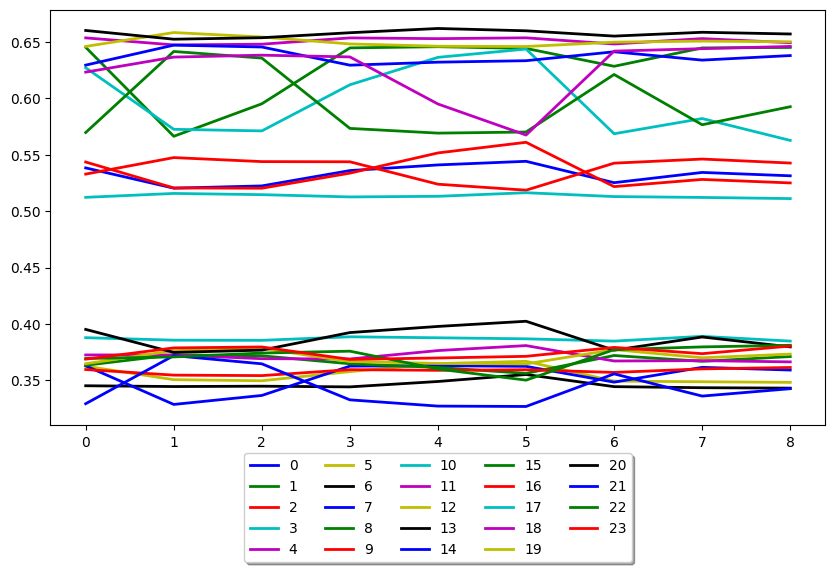

In [134]:
idx_ref = 3 # 20
idx_file_group = [0, 16]
mean_ref = True
df_distance, dataframe_group = get_distance_litoli(file_loc_important_cols_sorted, max_mapping_radius, direc_restructure_destination, idx_file_group, idx_ref, mean_ref, var_filename)
plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=False, Li_idxs="all")

df_distance.transpose().to_excel(f'06_distance_LitoLi_intracage_litype{litype}_{var_filename}_meanref.xlsx', index=True)

In [135]:
# for i in range(amount_Li):
#    plot_distance_wrtpath0(df_distance, max_mapping_radius, activate_diameter_line=False, Li_idxs=[i])

In [136]:
file_loc_important_cols.columns

Index(['geometry', 'path', 'subdir_new_system', 'g+p', 'g+p+1', 'g+p-1',
       'perfect_system', 'p_s_mask', 'toten [eV]', 'subdir_positive_CONTCAR',
       'coor_structure_init_dict', 'flag_Li', 'coor_weirdos_Li',
       'sum_weirdos_Li', 'duplicate_closest24_w_data_Li',
       'coor_reduced120_Li_closestduplicate', 'sum_mapped_Li_closestduplicate',
       'sum_sanitycheck_Li_closestduplicate',
       'atom_mapping_Li_closestduplicate',
       'atom_mapping_Li_w_dist_closestduplicate', 'idx0_weirdos_Li',
       'idx1_weirdos_Li', '#weirdos_Li', 'idx_coor_weirdos_Li',
       'idx_correcting_Li', 'coor_reduced120_sorted_Li', '#closest_24g_Li',
       '#closest_48htype1_Li', '#closest_48htype2_Li', '#closest_48htype3_Li',
       '#closest_48htype4_Li', 'top3_sorted_idxweirdo_dist_label_Li',
       'top3_sorted_idxweirdo_dist_Li', 'top3_sorted_idxweirdo_label_Li',
       'top1_sorted_idxweirdo_dist_label_Li', 'top1_sorted_idxweirdo_dist_Li',
       'top1_sorted_idxweirdo_label_Li', 'top1

In [137]:
dataframe = file_loc_important_cols_sorted
el = "Li"
idx = 0

In [138]:
col_top1_sorted_idxweirdo_label_el = f"top1_sorted_idxweirdo_label_{el}"

# for idx in range(dataframe["geometry"].size):
top1_sorted_idxweirdo_label_el = dataframe.at[idx, col_top1_sorted_idxweirdo_label_el]



In [139]:
data = dataframe[col_top1_sorted_idxweirdo_label_el]

In [140]:
data

0    {}
1    {}
2    {}
3    {}
4    {}
5    {}
6    {}
7    {}
8    {}
Name: top1_sorted_idxweirdo_label_Li, dtype: object

In [141]:
df = pd.DataFrame(data.items(), columns=['index', 'col_name'])

# Count empty dictionaries
empty_count = df['col_name'].apply(lambda x: len(x) == 0).sum()

# Count occurrences of certain types
type_count = df['col_name'].apply(lambda x: next(iter(x.values()))[0] if x else None).value_counts()

print(f"Number of empty dictionaries: {empty_count}")
print(f"Occurrences of certain types:\n{type_count}")

Number of empty dictionaries: 9
Occurrences of certain types:
Series([], Name: col_name, dtype: int64)


In [142]:
df

,index,col_name
0,0,{}
1,1,{}
2,2,{}
3,3,{}
4,4,{}
5,5,{}
6,6,{}
7,7,{}
8,8,{}


# K-means analysis

In [143]:
centroids_2, labels_2 = kmeans_cluster_weirdos(coor_weirdos_Li, amount_clusters = 2)
centroids_3, labels_3 = kmeans_cluster_weirdos(coor_weirdos_Li, amount_clusters = 3)
centroids_4, labels_4 = kmeans_cluster_weirdos(coor_weirdos_Li, amount_clusters = 4)
centroids_5, labels_5 = kmeans_cluster_weirdos(coor_weirdos_Li, amount_clusters = 5)

print(f"centroids: \n {centroids_2}")
print(f"centroids: \n {centroids_3}")
print(f"centroids: \n {centroids_4}")
print(f"centroids: \n {centroids_5}")

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
create_POSCAR_weirdos_centroids_appended(coor_weirdos_Li, centroids_2, direc_restructure_destination, lattice_constant, filename = "POSCAR_weirdos_centroids2")
create_POSCAR_weirdos_centroids_appended(coor_weirdos_Li, centroids_3, direc_restructure_destination, lattice_constant, filename = "POSCAR_weirdos_centroids3")
create_POSCAR_weirdos_centroids_appended(coor_weirdos_Li, centroids_4, direc_restructure_destination, lattice_constant, filename = "POSCAR_weirdos_centroids4")

plot_distweirdos(file_loc_important_cols)

# visualization of mapped atom

In [ ]:
from get_weirdos_ver3_new_cleaned import plot_mapped_label_vs_dist_and_histogram

In [ ]:
df = plot_mapped_label_vs_dist_and_histogram(file_loc_important_cols, litype, category_data = "mapping", el = "Li")

In [ ]:
# file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_weirdos_Li","sum_weirdos_48htype2_Li","dist_weirdos_atom"dist_weirdos_48htype2_atom72_Li","idx1_weirdos_Li","#weirdos_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
if activate_radius == 3:
    file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","sum_weirdos_Li","sum_mapped_48htype1_48htype2_Li_closestduplicate","sum_weirdos_48htype1_48htype2_Li","sum_mapped_48htype2_Li_closestduplicate","#weirdos_Li","sum_mapped_48htypesmerged_Li","sum_sanitycheck_48htypesmerged_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
    file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","sum_weirdos_Li","sum_mapped_48htype1_48htype2_Li_closestduplicate","sum_weirdos_48htype1_48htype2_Li","sum_mapped_48htype2_Li_closestduplicate","#weirdos_Li","sum_mapped_48htypesmerged_Li","sum_sanitycheck_48htypesmerged_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","toten [eV]"]]
    
    sum_weirdos_Li = float(file_loc_important_cols_sorted_toten["#weirdos_Li"].sum())

    var_excel_file = f"map2type2_{sum_weirdos_Li}_{max_mapping_radius}_{max_mapping_radius_48htype2}_{max_mapping_radius_48htype1_48htype2}_{file_perfect_poscar_48n24_wo_cif}"

elif activate_radius == 2:
    if litype == 2:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]]
    elif litype == 3:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]]
    elif litype == 4:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]]
    elif litype == 5:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]]
    elif litype == 6:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_24g_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_24g_Li","toten [eV]"]] 
    elif litype == 7:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_48htype7_Li","#closest_24g_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_48htype7_Li","#closest_24g_Li","toten [eV]"]] 
    elif litype == 8:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_48htype7_Li","#closest_48htype8_Li","#closest_24g_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_48htype7_Li","#closest_48htype8_Li","#closest_24g_Li","toten [eV]"]]   

    sum_weirdos_Li = float(file_loc_important_cols_sorted_toten["#weirdos_Li"].sum())

    var_excel_file = f"map2type2_{sum_weirdos_Li}_{max_mapping_radius}_{max_mapping_radius_48htype2}_{file_perfect_poscar_48n24_wo_cif}"

elif activate_radius == 1:
    if litype == 2:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]]
    elif litype == 3:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]]
    elif litype == 4:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]]
    elif litype == 5:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_24g_Li","atom_mapping_Li_w_dist_label","toten [eV]"]]
    elif litype == 6:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_24g_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_24g_Li","toten [eV]"]] 
    elif litype == 7:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_48htype7_Li","#closest_24g_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_48htype7_Li","#closest_24g_Li","toten [eV]"]] 
    elif litype == 8:
        file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_48htype7_Li","#closest_48htype8_Li","#closest_24g_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
        file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","sum_mapped_Li_closestduplicate","#weirdos_Li","idx0_weirdos_Li","top3_sorted_idxweirdo_dist_Li","top3_sorted_idxweirdo_label_Li","#closest_48htype1_Li","#closest_48htype2_Li","#closest_48htype3_Li","#closest_48htype4_Li","#closest_48htype5_Li","#closest_48htype6_Li","#closest_48htype7_Li","#closest_48htype8_Li","#closest_24g_Li","toten [eV]"]]   

    sum_weirdos_Li = float(file_loc_important_cols_sorted_toten["#weirdos_Li"].sum())

    var_excel_file = f"map2type2_{sum_weirdos_Li}_{max_mapping_radius}_{file_perfect_poscar_48n24_wo_cif}"

In [ ]:
df = plot_mapped_label_vs_dist_and_histogram(file_loc_important_cols_sorted, litype, category_data = "mapping", el = "Li")

df_48htype2 = df.loc[df['label'] == '48htype2']

fig = px.scatter(df_48htype2, 
                x = 'idx_nr', 
                y = 'dist',
                title = 'Distance of mapped 48htype2 vs its file index nr'
                )

fig.show(config={'scrollZoom': True})

# find radius that removes all weirdos in the first groups

## all weirdos

In [ ]:
df = plot_mapped_label_vs_dist_and_histogram(file_loc_important_cols, litype, category_data = "weirdo", el = "Li")

fig = px.scatter(df, 
                x = 'idx_nr', 
                y = 'dist',
                # mode = "markers"
                color = 'label',
                title = 'Distance of weirdos vs its file index nr (0: lowest energy)',
                hover_data = ['dist', 'label', 'idx_nr', 'coor']
                )

fig.show(config={'scrollZoom': True}) 

# weirdos of 0:17

In [ ]:
df = plot_mapped_label_vs_dist_and_histogram(file_loc_important_cols_sorted[:17], litype, category_data = "weirdo", el = "Li")

fig = px.scatter(df, 
                x = 'idx_nr', 
                y = 'dist',
                # mode = "markers"
                color = 'label',
                title = 'Distance of weirdos vs its file index nr'
                )

fig.show(config={'scrollZoom': True})

In [ ]:
file_loc_important_cols_sorted_toten.to_excel(f'04_important_outputs_{var_excel_file}_sorted.xlsx', index=False)
file_loc_important_cols_not_sorted_toten.to_excel(f'04_important_outputs_{var_excel_file}.xlsx', index=False)

In [ ]:
if activate_radius == 1:
    file_loc_important_cols.to_pickle(f'file_loc_important_cols_{max_mapping_radius}_{file_perfect_poscar_48n24_wo_cif}.pkl') 
elif activate_radius == 2:
    file_loc_important_cols.to_pickle(f'file_loc_important_cols_{max_mapping_radius}_{max_mapping_radius_48htype2}_{file_perfect_poscar_48n24_wo_cif}.pkl')
elif activate_radius == 3:
    file_loc_important_cols.to_pickle(f'file_loc_important_cols_{max_mapping_radius}_{max_mapping_radius_48htype2}_{max_mapping_radius_48htype1_48htype2}_{file_perfect_poscar_48n24_wo_cif}.pkl')

In [ ]:
xxxx - xx

# Optimize dx_dz of 48htype1, r_2 for files w/o weirdos

In [ ]:
df_wo_weirdos_selectedcol = file_loc_important_cols[['geometry','path','subdir_new_system', 'toten [eV]']].sort_values("toten [eV]", ascending=True)[0:17].reset_index().copy()

In [ ]:
df_wo_weirdos_selectedcol

In [ ]:
if activate_radius == 3:
    folder_name_destination_restructure_wo_weirdos = f"/restructure_{max_mapping_radius}_{max_mapping_radius_48htype2}_{max_mapping_radius_48htype1_48htype2}_{file_perfect_poscar_48n24_wo_cif}_wo_weirdos/"
elif activate_radius == 2:
    folder_name_destination_restructure_wo_weirdos = f"/restructure_{max_mapping_radius}_{max_mapping_radius_48htype2}_{file_perfect_poscar_48n24_wo_cif}_wo_weirdos/"
elif activate_radius == 1:
    folder_name_destination_restructure_wo_weirdos = f"/restructure_{max_mapping_radius}_{file_perfect_poscar_48n24_wo_cif}_wo_weirdos/"
else:
    print("activate_radius is not correct")

direc_restructure_destination_wo_weirdos = direc+str(folder_name_destination_restructure_wo_weirdos)

In [ ]:
# just refreshing folder
FileOperations.check_folder_existance(direc_restructure_destination_wo_weirdos, empty_folder=True)

# # # # # # just copy file
# # # # # FileOperations.copy_rename_single_file(direc_restructure_destination_wo_weirdos, direc_perfect_poscar, file_perfect_poscar_24, prefix=None)
# # # # # FileOperations.copy_rename_single_file(direc_restructure_destination_wo_weirdos, direc_perfect_poscar, file_perfect_poscar_48n24, prefix=None)

# # # # # FileOperations.copy_rename_files(df_wo_weirdos_selectedcol, direc_restructure_destination_wo_weirdos, file_restructure, prefix=None, savedir = True)

In [ ]:
coor_structure_init_dict = get_coor_dict_structure(ref_structure_48n24)

get_positive_lessthan1_poscarcontcar(df_wo_weirdos_selectedcol, direc_restructure_destination_wo_weirdos, poscar_line_nr_start, poscar_line_nr_end, contcar_columns_type2, file_type = "CONTCAR", var_name_in = None, var_name_out = "positive", n_decimal=16)
get_coor_structure24_dict_iterated(df_wo_weirdos_selectedcol, mapping = "False")

if activate_radius == 3:
    get_flag_map_weirdos_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "Li", max_mapping_radius)
    get_flag_map_weirdos_48htype1_48htype2_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "Li", max_mapping_radius_48htype1_48htype2)
    get_flag_map_weirdos_48htypesmerged_level1_el(df_wo_weirdos_selectedcol, "Li")
    get_flag_map_weirdos_48htype2_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "Li", max_mapping_radius_48htype2, activate_radius)
    get_flag_map_48htypesmerged_el(df_wo_weirdos_selectedcol, "Li", activate_radius)
elif activate_radius == 2:
    get_flag_map_weirdos_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "Li", max_mapping_radius)
    get_flag_map_weirdos_48htype2_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "Li", max_mapping_radius_48htype2, activate_radius)
    get_flag_map_48htypesmerged_el(df_wo_weirdos_selectedcol, "Li", activate_radius)
elif activate_radius == 1:
    get_flag_map_weirdos_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "Li", max_mapping_radius)

# get_flag_map_weirdos_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "P", max_mapping_radius)
# get_flag_map_weirdos_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "S", max_mapping_radius)
# get_flag_map_weirdos_el(df_wo_weirdos_selectedcol, coor_structure_init_dict, "Cl", max_mapping_radius)

In [ ]:
dataframe = file_loc_important_cols

col_top1_sorted_idxweirdo_dist_el = "top1_sorted_idxweirdo_dist_Li"
col_top1_sorted_idxweirdo_label_el = "top1_sorted_idxweirdo_label_Li"
col_top1_sorted_idxweirdo_coor_el = "top1_sorted_idxweirdo_coor_Li"
col_top1_sorted_idxweirdo_file_el = "top1_sorted_idxweirdo_file_Li"

val = 0.

dist_weirdos_el_appendend = []
y_appended = []
label_weirdos_el_appended = []
coor_weirdos_el_appended = []
file_weirdos_el_appended = []

for idx in range(dataframe["geometry"].size):
    dist_weirdos_el = dataframe.at[idx, col_top1_sorted_idxweirdo_dist_el].values()
    label_weirdos_el = dataframe.at[idx, col_top1_sorted_idxweirdo_label_el].values()
    coor_weirdos_el = dataframe.at[idx, col_top1_sorted_idxweirdo_coor_el].values()
    file_weirdos_el = dataframe.at[idx, col_top1_sorted_idxweirdo_file_el].values()

    for single_dist in dist_weirdos_el:
        dist_weirdos_el_appendend.append(single_dist[0])
        y_appended.append(np.zeros_like(single_dist[0]) + val)

    for single_label in label_weirdos_el:
        label_weirdos_el_appended.append(single_label[0])

    for single_coor in coor_weirdos_el:
        coor_weirdos_el_appended.append(single_coor[0])
    
    for single_file in file_weirdos_el:
        file_weirdos_el_appended.append(single_file[0])

df = pd.DataFrame({'dist': dist_weirdos_el_appendend, 'label': label_weirdos_el_appended, 'y': y_appended, 'coor': coor_weirdos_el_appended, 'file': file_weirdos_el_appended})

# fig = px.scatter(df, x = 'dist', y = 'y', color='label', color_discrete_map={'48htype1': 'red', '48htype2': 'blue', '24g': 'green'})
fig = px.scatter(df, 
                 x = 'dist', 
                 y = 'y', 
                 color ='label', 
                 hover_data = ['dist', 'label', 'coor', 'file'])


fig.show(config={'scrollZoom': True})

In [ ]:
0.04718813922672343

In [ ]:
# from sklearn.cluster import MeanShift, estimate_bandwidth

# x = [1,1,5,6,1,5,10,22,23,23,50,51,51,52,100,112,130,500,512,600,12000,12230]

# X = np.array(list(zip(x,np.zeros(len(x)))), dtype='int')
# bandwidth = estimate_bandwidth(X, quantile=0.1)
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(labels)
# n_clusters_ = len(labels_unique)

# for k in range(n_clusters_):
#     my_members = labels == k
#     print("cluster {0}: {1}".format(k, X[my_members, 0]))

In [ ]:
# DBSCAN
# source: https://stackoverflow.com/questions/11513484/1d-number-array-clustering

# points = [0.1, 0.31,  0.32, 0.45, 0.35, 0.40, 0.5 ]
points = dist_weirdos_el_appendend

clusters = []
# eps = 0.2
eps = 0.043
points_sorted = sorted(points)
curr_point = points_sorted[0]
curr_cluster = [curr_point]
for point in points_sorted[1:]:
    if point <= curr_point + eps:
        curr_cluster.append(point)
    else:
        clusters.append(curr_cluster)
        curr_cluster = [point]
    curr_point = point
clusters.append(curr_cluster)
print(clusters)

In [ ]:
for i in clusters:
    print(i)

In [ ]:
clusters[0][int(len(clusters[0])/2)]

In [ ]:
len(clusters[0])

In [ ]:
len(clusters)

## another idea: plot based on litype

In [ ]:
# from sklearn.datasets import make_swiss_roll

# X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
        # # source: https://plotly.com/python/v3/3d-point-clustering/
        # scatter = dict(
        #     mode = "markers",
        #     name = "y",
        #     type = "scatter3d",
        #     x = coordinates[0], y = coordinates[1], z = coordinates[2],
        #     # x = tuple(coordinates[0]), y = tuple(coordinates[1]), z = tuple(coordinates[2]),
        #     marker = dict( size=2, color="rgb(23, 190, 207)" )
        # )

        # clusters = dict(
        #     alphahull = 7,
        #     name = "y",
        #     opacity = 0.1,
        #     type = "mesh3d",
        #     x = coordinates[0], y = coordinates[1], z = coordinates[2]
        # )

        # layout = dict(
        #     title = '3d point clustering',
        #     scene = dict(
        #         xaxis = dict( zeroline=False ),
        #         yaxis = dict( zeroline=False ),
        #         zaxis = dict( zeroline=False ),
        #     )
        # )

        # fig = dict( data=[scatter, clusters], layout=layout )

        # # Use py.iplot() for IPython notebook
        # pyoff.iplot(fig, filename='3d point clustering')

        # scatter = go.Scatter3d(
        #     mode="markers",
        #     name="y",
        #     x=coordinates[0],
        #     y=coordinates[1],
        #     z=coordinates[2],
        #     marker=dict(size=2, color="rgb(23, 190, 207)")
        # )

        # clusters = go.Mesh3d(
        #     alphahull=7,
        #     name="y",
        #     opacity=0.1,
        #     x=coordinates[0],
        #     y=coordinates[1],
        #     z=coordinates[2]
        # )

        # layout = go.Layout(
        #     title='3d point clustering',
        #     scene=dict(
        #         xaxis=dict(zeroline=False),
        #         yaxis=dict(zeroline=False),
        #         zaxis=dict(zeroline=False),
        #     )
        # )

        # fig = go.Figure(data=[scatter, clusters], layout=layout)

        # # Use iplot() for offline plotting
        # # iplot(fig, filename='3d point clustering')
        # pyoff(fig, filename='3d point clustering')

In [ ]:
get_latticeconstant_structure_dict_iterated(file_loc_important_cols, direc_restructure_destination, var_filename = "trf_w_linalg_orientated_positive_lessthan1")
get_fractional_to_cartesian_matrix(file_loc_important_cols, var_filename = "trf_w_linalg_orientated_positive_lessthan1", angle_in_degrees=True)
get_fractional_to_cartesian_coor(file_loc_important_cols, direc_restructure_destination, var_filename = "trf_w_linalg_orientated_positive_lessthan1")

In [ ]:
max_neighbors_radius = 5
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "Li", var_filename = "trf_w_linalg_orientated_positive_lessthan1")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "P", var_filename = "trf_w_linalg_orientated_positive_lessthan1")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "S", var_filename = "trf_w_linalg_orientated_positive_lessthan1")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "Cl", var_filename = "trf_w_linalg_orientated_positive_lessthan1")

In [ ]:
# file_loc_important_cols["distance_cartesian_trf_w_linalg_orientated_positive_S"][45]

In [ ]:
# my_dict = file_loc_important_cols["distance_cartesian_trf_w_linalg_orientated_positive_Li"][45]

# max_length = max(len(lst) for lst in my_dict.values())

# # Fill in missing values with None to make all lists the same length
# for key in my_dict:
#     my_dict[key] += [None] * (max_length - len(my_dict[key]))

# # Create a DataFrame from the modified dictionary
# df_my_dict = pd.DataFrame(my_dict)

# df_my_dict.columns = ['_'.join(map(str, col)) for col in df_my_dict.columns]

# df_my_dict = df_my_dict.sort_index(axis=1)
# df_my_dict = df_my_dict.transpose()
# # Save the DataFrame to an Excel file without the index
# df_my_dict.to_excel('neighbors_Li_trf_w_linalg_orientated_positive_45.xlsx', index=True)

In [ ]:
get_latticeconstant_structure_dict_iterated(file_loc_important_cols, direc_restructure_destination, var_filename = "CONTCAR")
get_fractional_to_cartesian_matrix(file_loc_important_cols, var_filename = "CONTCAR", angle_in_degrees=True)
get_fractional_to_cartesian_coor(file_loc_important_cols, direc_restructure_destination, var_filename = "CONTCAR")

In [ ]:
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "Li", var_filename = "CONTCAR")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "P", var_filename = "CONTCAR")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "S", var_filename = "CONTCAR")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "Cl", var_filename = "CONTCAR")

In [ ]:
# # # file_loc_important_cols["distance_cartesian_CONTCAR_S"][45]

In [ ]:
# # # my_dict = file_loc_important_cols["distance_cartesian_CONTCAR_Li"][45]

# # # max_length = max(len(lst) for lst in my_dict.values())

# # # # Fill in missing values with None to make all lists the same length
# # # for key in my_dict:
# # #     my_dict[key] += [None] * (max_length - len(my_dict[key]))

# # # # Create a DataFrame from the modified dictionary
# # # df_my_dict = pd.DataFrame(my_dict)

# # # df_my_dict.columns = ['_'.join(map(str, col)) for col in df_my_dict.columns]

# # # df_my_dict = df_my_dict.sort_index(axis=1)
# # # df_my_dict = df_my_dict.transpose()
# # # # Save the DataFrame to an Excel file without the index
# # # df_my_dict.to_excel(f'neighbors_Li_CONTCAR_45_{max_mapping_radius}.xlsx', index=True)

In [ ]:
get_latticeconstant_structure_dict_iterated(file_loc_important_cols, direc_restructure_destination, var_filename = "trf_w_linalg_orientated")
get_fractional_to_cartesian_matrix(file_loc_important_cols, var_filename = "trf_w_linalg_orientated", angle_in_degrees=True)
get_fractional_to_cartesian_coor(file_loc_important_cols, direc_restructure_destination, var_filename = "trf_w_linalg_orientated")

In [ ]:
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "Li", var_filename = "trf_w_linalg_orientated")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "P", var_filename = "trf_w_linalg_orientated")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "S", var_filename = "trf_w_linalg_orientated")
get_closest_neighbors_el_cartesian_coor(file_loc_important_cols, max_neighbors_radius, el = "Cl", var_filename = "trf_w_linalg_orientated")

In [ ]:
# # # my_dict = file_loc_important_cols["distance_cartesian_trf_w_linalg_orientated_Li"][45]

# # # max_length = max(len(lst) for lst in my_dict.values())

# # # # Fill in missing values with None to make all lists the same length
# # # for key in my_dict:
# # #     my_dict[key] += [None] * (max_length - len(my_dict[key]))

# # # # Create a DataFrame from the modified dictionary
# # # df_my_dict = pd.DataFrame(my_dict)

# # # df_my_dict.columns = ['_'.join(map(str, col)) for col in df_my_dict.columns]

# # # df_my_dict = df_my_dict.sort_index(axis=1)
# # # df_my_dict = df_my_dict.transpose()
# # # # Save the DataFrame to an Excel file without the index
# # # df_my_dict.to_excel(f'neighbors_Li_trf_w_linalg_orientated_45_{max_mapping_radius}.xlsx', index=True)

In [ ]:
# file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","coor_weirdos_Li","dist_weirdos_Li","dist_weirdos_atom72_Li","idx1_weirdos_Li","#weirdos_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
file_loc_important_cols_sorted_toten = file_loc_important_cols[["geometry","path","coor_weirdos_Li","dist_weirdos_Li","idx0_weirdos_Li","sum_weirdos_Li","sum_mapped_Li_new","sum_sanitycheck_Li_new","duplicate_closest24_w_data_Li","toten [eV]"]].sort_values("toten [eV]", ascending=True)
file_loc_important_cols_not_sorted_toten = file_loc_important_cols[["geometry","path","coor_weirdos_Li","dist_weirdos_Li","idx0_weirdos_Li","sum_weirdos_Li","sum_mapped_Li_new","sum_sanitycheck_Li_new","duplicate_closest24_w_data_Li","toten [eV]"]]

file_loc_important_cols_sorted_toten.to_excel(f'04_important_outputs_{var_excel_file}_sorted.xlsx', index=False)
file_loc_important_cols_not_sorted_toten.to_excel(f'04_important_outputs_{var_excel_file}.xlsx', index=False)

In [ ]:
file_loc_important_cols['scaling'][48]

In [ ]:
file_loc_important_cols['translation'][48]

In [ ]:
lattice_constants_1_0 = [[10.0222501477270232, -0.0006786050655888, -0.0018947275007341], [-0.0006784775666570, 10.0236290992971000, 0.0006784775666570], [-0.0018947275007341, 0.0006786050655888, 10.0222501477270232]]

In [ ]:
np.dot(lattice_constants_1_0, file_loc_important_cols['scaling'][48].T)

In [ ]:
new_lattice_constant_1_0 = np.round(np.dot(lattice_constants_1_0, file_loc_important_cols['scaling'][48].T) + file_loc_important_cols['translation'][48], decimals=16)

In [ ]:
np.savetxt('new_constants_trial', new_lattice_constant_1_0)

In [ ]:
-0.11331824 + 1.89472750e-03

In [ ]:
1.00236291e+01 + 0.2500525

In [ ]:
-6.78477567e-04 + 0.38668173

In [ ]:
new_lattice_constant_1_0_precision = np.round(new_lattice_constant_1_0, decimals=16)

In [ ]:
new_lattice_constant_1_0_precision

In [ ]:
direc_restructure_destination

In [ ]:
Structure.from_file('/home/azka/01_Masterthesis/01_Precondition/01_En_calc_13thiter_analysis/restructure_0.09_selected/1_0_CONTCAR').lattice

In [ ]:
Structure.from_file('/home/azka/01_Masterthesis/01_Precondition/01_En_calc_13thiter_analysis/restructure_0.09_selected/1_0_CONTCAR_pymatgen.cif').lattice

In [ ]:
Structure.from_file('/home/azka/01_Masterthesis/01_Precondition/01_En_calc_13thiter_analysis/restructure_0.09_selected/1_0_trf_w_lib.cif').lattice

In [ ]:
Structure.from_file('/home/azka/01_Masterthesis/01_Precondition/01_En_calc_13thiter_analysis/restructure_0.09_selected/1_0_trf_w_linalg.cif').lattice

In [ ]:
new_lattice_constant_1_0_nottransposed = np.round(np.dot(lattice_constants_1_0, file_loc_important_cols['scaling'][48]) + file_loc_important_cols['translation'][48], decimals=16)

In [ ]:
np.savetxt('new_constants_trial_not_transposed', new_lattice_constant_1_0_nottransposed)

In [ ]:
Structure.from_file('/home/azka/01_Masterthesis/01_Precondition/01_En_calc_13thiter_analysis/restructure_0.09_selected/1_0_CONTCAR_edit').lattice

In [ ]:
Structure.from_file('/home/azka/01_Masterthesis/01_Precondition/01_En_calc_13thiter_analysis/restructure_0.09_selected/1_0_CONTCAR_edit_not_transposed').lattice